# DEEP EUTECTIC SOLVENTS. VISCOSITY. ML ALGORITHMS 

## 1. Preparation

In [1]:
#Installing the necessary libraries
!pip install pandas
!pip install openpyxl
!pip install sklearn
!pip install matplotlib
!pip install scikit-optimize
!pip install numpy
!pip install shap
!pip install catboost
!pip install xgboost
!pip install shap

In [2]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVR
from skopt import BayesSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from skopt.space import Integer, Real, Categorical 
from sklearn import utils
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBRegressor
import math
import shap

from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.model_selection import GroupShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
import shap
plt.style.use('seaborn')

c:\Users\lera-\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import re
import pubchempy as pcp
from sklearn import svm
from sklearn.svm import SVR
from skopt import BayesSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from skopt.space import Integer, Real, Categorical 
from sklearn import utils
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBRegressor

import shap

from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.model_selection import GroupShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import Descriptors3D
from rdkit.Chem import rdchem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.rdchem import PeriodicTable, GetPeriodicTable
from rdkit.Chem import Fragments
from rdkit.Chem.rdchem import EditableMol
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
from rdkit.Chem import PyMol
from mol2vec.features import mol2alt_sentence, mol2sentence, MolSentence, DfVec, sentences2vec
from gensim.models import word2vec

### 1.1. Working with the table
First you need to edit the table a little and see its main characteristics for further machine learning

In [4]:
#We move the predicted column to the end for convenience
db_final1 = pd.read_excel('viscosity_df_ML.xlsx')
db_final = db_final1.drop(columns=['Viscosity, cP'])
db_final.insert(0, 'Viscosity, cP', db_final1['Viscosity, cP'])

In [5]:
colors = ['#a5678e','#e8b7d4', '#beb7d9', '#7eabd4', '#31539d'] # Palette of colors

In [6]:
#Removing unnecessary columns
db_final = db_final.drop(['Unnamed: 0', 'isomer_smiles#1', 'isomer_smiles#2', 'isomer_smiles#3'], axis = 1)
#Table Information
db_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Viscosity, cP         4042 non-null   float64
 1   Component#1           4042 non-null   object 
 2   Component#2           4042 non-null   object 
 3   Component#3           4042 non-null   object 
 4   X#1 (molar fraction)  4042 non-null   float64
 5   X#2 (molar fraction)  4042 non-null   float64
 6   X#3 (molar fraction)  4042 non-null   float64
 7   I                     4042 non-null   int64  
 8   II                    4042 non-null   int64  
 9   III                   4042 non-null   int64  
 10  IV                    4042 non-null   int64  
 11  V                     4042 non-null   int64  
 12  Temperature, K        4042 non-null   float64
 13  VdWVolume, A^3#1      4042 non-null   float64
 14  VdWVolume, A^3#2      4042 non-null   float64
 15  VdWVolume, A^3#3     

In [7]:
db_final

Viscosity, cP       Component#1                    Component#2  \
0          7.153834   FERRIC CHLORIDE  Tetrabutylphosphonium bromide   
1          6.716595   FERRIC CHLORIDE  Tetrabutylphosphonium bromide   
2          6.008813   FERRIC CHLORIDE  Tetrabutylphosphonium bromide   
3          5.497168   FERRIC CHLORIDE  Tetrabutylphosphonium bromide   
4          4.852030   FERRIC CHLORIDE  Tetrabutylphosphonium bromide   
...             ...               ...                            ...   
4037       0.025863  CHOLINE CHLORIDE                       glycerol   
4038      -0.261105  CHOLINE CHLORIDE                       glycerol   
4039      -0.486946  CHOLINE CHLORIDE                       glycerol   
4040      -0.764858  CHOLINE CHLORIDE                       glycerol   
4041      -0.951400  CHOLINE CHLORIDE                       glycerol   

     Component#3  X#1 (molar fraction)  X#2 (molar fraction)  \
0              0                 0.333                 0.667   
1              0                 0.333                 0.667   
2              0                 0.333                 0.667   
3              0                 0.333                 0.667   
4              0                 0.333                 0.667   
...          ...                   ...                   ...   
4037       water                 0.048                 0.095   
4038       water                 0.033                 0.066   
4039       water                 0.022                 0.044   
4040       water                 0.013                 0.027   
4041       water                 0.006                 0.012   

      X#3 (molar fraction)  I  II  III  ...    S     Cl    K   Cr     Fe   Co  \
0                    0.000  1   0    0  ...  0.0  0.999  0.0  0.0  0.333  0.0   
1                    0.000  1   0    0  ...  0.0  0.999  0.0  0.0  0.333  0.0   
2                    0.000  1   0    0  ...  0.0  0.999  0.0  0.0  0.333  0.0   
3                    0.000  1   0    0  ...  0.0  0.999  0.0  0.0  0.333  0.0   
4                    0.000  1   0    0  ...  0.0  0.999  0.0  0.0  0.333  0.0   
...                    ... ..  ..  ...  ...  ...    ...  ...  ...    ...  ...   
4037                 0.857  0   0    1  ...  0.0  0.048  0.0  0.0  0.000  0.0   
4038                 0.901  0   0    1  ...  0.0  0.033  0.0  0.0  0.000  0.0   
4039                 0.934  0   0    1  ...  0.0  0.022  0.0  0.0  0.000  0.0   
4040                 0.960  0   0    1  ...  0.0  0.013  0.0  0.0  0.000  0.0   
4041                 0.982  0   0    1  ...  0.0  0.006  0.0  0.0  0.000  0.0   

       Cu   Zn     Br  ind_syst  
0     0.0  0.0  0.667       177  
1     0.0  0.0  0.667       177  
2     0.0  0.0  0.667       177  
3     0.0  0.0  0.667       177  
4     0.0  0.0  0.667       177  
...   ...  ...    ...       ...  
4037  0.0  0.0  0.000        96  
4038  0.0  0.0  0.000        96  
4039  0.0  0.0  0.000        96  
4040  0.0  0.0  0.000        96  
4041  0.0  0.0  0.000        96  

[4042 rows x 39 columns]

In [8]:
#Information on the final table
db_final.describe()

Viscosity, cP  X#1 (molar fraction)  X#2 (molar fraction)  \
count    4042.000000           4042.000000           4042.000000   
mean        3.291466              0.339112              0.567477   
std         1.646106              0.203017              0.233521   
min        -5.521461              0.006000              0.008000   
25%         2.333138              0.167000              0.400000   
50%         3.218676              0.332000              0.643000   
75%         4.276666              0.500000              0.750000   
max         7.200425              0.917000              0.950000   

       X#3 (molar fraction)            I      II          III           IV  \
count           4042.000000  4042.000000  4042.0  4042.000000  4042.000000   
mean               0.093424     0.005443     0.0     0.578674     0.060119   
std                0.222437     0.073584     0.0     0.493833     0.237736   
min                0.000000     0.000000     0.0     0.000000     0.000000   
25%                0.000000     0.000000     0.0     0.000000     0.000000   
50%                0.000000     0.000000     0.0     1.000000     0.000000   
75%                0.000000     0.000000     0.0     1.000000     0.000000   
max                0.982000     1.000000     0.0     1.000000     1.000000   

                 V  Temperature, K  ...            S           Cl  \
count  4042.000000     4042.000000  ...  4042.000000  4042.000000   
mean      0.521771      319.097437  ...     0.018406     0.198942   
std       0.499588       19.902628  ...     0.095434     0.325576   
min       0.000000      278.150000  ...     0.000000     0.000000   
25%       0.000000      303.150000  ...     0.000000     0.000000   
50%       1.000000      313.200000  ...     0.000000     0.111000   
75%       1.000000      333.150000  ...     0.000000     0.289000   
max       1.000000      373.150000  ...     0.770000     3.001000   

                 K           Cr           Fe           Co           Cu  \
count  4042.000000  4042.000000  4042.000000  4042.000000  4042.000000   
mean      0.000223     0.000489     0.000973     0.000239     0.000165   
std       0.008395     0.008289     0.019449     0.006387     0.010491   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.400000     0.142000     0.667000     0.200000     0.667000   

                Zn           Br     ind_syst  
count  4042.000000  4042.000000  4042.000000  
mean      0.000791     0.013858   185.633845  
std       0.017059     0.064419   118.354755  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000    85.000000  
50%       0.000000     0.000000   127.500000  
75%       0.000000     0.000000   305.000000  
max       0.667000     0.999000   394.000000  

[8 rows x 36 columns]

### 1.2. Splitting data into test and train

In [9]:
# A function for splitting data so that different systems appear in the test and train sample
def custom_cv(x,y,groups,n_splits,test_size):
    custom_cv = []
    kfold = GroupShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42) #randomized test/train indexes to split data according to a third-party group provided
    for train_idx, test_idx in kfold.split(x, y, groups): 
        custom_cv.append((train_idx, test_idx)) #Returning data as a tuple
    return custom_cv

In [10]:
# We split the sample so that there are different systems in the test and training
y = db_final.loc[:,'Viscosity, cP']
x = db_final.loc[:,'X#1 (molar fraction)':]
cv = custom_cv(x, y, db_final['ind_syst'], 1, 0.2) #Separation using the function
for train_idx, val_idx in cv:
    x_train, x_test = x.iloc[train_idx], x.iloc[val_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[val_idx]

### 1.3. Functions for plotting and calculating metrics

In [11]:
#Let's introduce a function for plotting graphs
def regr_plot(y_train, y_test, y_pred, y1_pred):
    f, ax = plt.subplots(figsize=(15, 10)) #Initialization - creating an empty graph
    plt.scatter(y_train, y1_pred, color=colors[4], s=70, label='Train') #Prediction for the training sample
    plt.scatter(y_test, y_pred, color=colors[1],s=70, label='Test') #Prediction for the test sample
    plt.plot(y_train, y_train, color=colors[0]) #Building a straight line
    plt.xlabel('Test data', fontsize=35) #Signatures
    plt.ylabel('Predicted data', fontsize=35)
    plt.legend(fontsize = 30, frameon=False) #Creating a legend
    plt.xlim(-6, 11) #Intervals of x and y
    plt.ylim(-6, 11)
    plt.tick_params(axis='both', which='major', labelsize=30)
    x = x = np.linspace(-6, 11, 100)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    plt.fill_between(x, x-RMSE, x+RMSE, interpolate=True, color=colors[2], alpha=0.2)

In [12]:
#Let's introduce a function for calculating metrics
def regr_metrics(regr, x_train, y_train, y_test, y_pred, y1_pred):
    #Calculation of metrics
    R2 = metrics.r2_score(y_test, y_pred)
    R2_train = metrics.r2_score(y_train, y1_pred)
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y1_pred))
    
    #Metrics output
    print('r2_test:', R2)
    print('MAE_test:', MAE)
    print('MSE_test:', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE_test:', RMSE)
    print('r2_train:', metrics.r2_score(y_train, y1_pred))
    print('MAE_train:', metrics.mean_absolute_error(y_train, y1_pred))
    print('MSE_train:', metrics.mean_squared_error(y_train, y1_pred))
    print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
    return [R2_train, R2, RMSE_train, RMSE]

In [13]:
#Function for finding metrics by different classes
def metrics_class(df, Name_method):
    df_error = pd.DataFrame(columns = ['Algorithm MO', 'Num_comp', 'Type', 'R2_train', 'R2_test', 'RMSE_train', 'RMSE_test']) 
    for num_fold in range(5):
        for type_DES in ['I','III','IV','V']:
            condition = (df['X#3 (molar fraction)'] == 0) & (df[type_DES] == 1) #Selection of binary systems of a certain class
            df_train = df[condition]
            df_test = df[condition]
            df_train = df_train.dropna(subset=['Viscosity_train'+ str(num_fold)])
            df_test = df_test.dropna(subset=['Viscosity_test'+ str(num_fold)])
            try:
                #Finding metrics
                R2_train = metrics.r2_score(df_train['Viscosity_lit'], df_train['Viscosity_train' + str(num_fold)])
                RMSE_train = np.sqrt(metrics.mean_squared_error(df_train['Viscosity_lit'], df_train['Viscosity_train' + str(num_fold)]))
            except:
                #If it is impossible, None is returned
                R2_train = None
                RMSE_train = None
            try:
                R2_test = metrics.r2_score(df_test['Viscosity_lit'], df_test['Viscosity_test' + str(num_fold)])
                RMSE_test = np.sqrt(metrics.mean_squared_error(df_test['Viscosity_lit'], df_test['Viscosity_test' + str(num_fold)]))
            except:
                R2_test = None
                RMSE_test = None
            df_error.loc[ len(df_error.index )] = [Name_method + str(num_fold), 2, type_DES, R2_train, R2_test, RMSE_train, RMSE_test]
        #For ternary systems
        condition = (df['X#3 (molar fraction)'] != 0)
        df_train = df[condition]
        df_test = df[condition]
        df_train = df_train.dropna(subset=['Viscosity_train' + str(num_fold)])
        df_test = df_test.dropna(subset=['Viscosity_test' + str(num_fold)])
        R2_train = metrics.r2_score(df_train['Viscosity_lit'], df_train['Viscosity_train'+ str(num_fold)])
        RMSE_train = np.sqrt(metrics.mean_squared_error(df_train['Viscosity_lit'], df_train['Viscosity_train'+ str(num_fold)]))
        R2_test = metrics.r2_score(df_test['Viscosity_lit'], df_test['Viscosity_test'+ str(num_fold)])
        RMSE_test = np.sqrt(metrics.mean_squared_error(df_test['Viscosity_lit'], df_test['Viscosity_test'+ str(num_fold)]))
        df_error.loc[len(df_error.index)] = [Name_method + str(num_fold), 3, None, R2_train, R2_test, RMSE_train, RMSE_test]
      #The function returns a table
    return df_error

In [14]:
#Let's introduce the Feature importance function
list_columns = db_final.loc[:, 'X#1 (molar fraction)' : 'Br'].columns
def regr_feature(regr, x_test, list_columns):
    explainer = shap.TreeExplainer(regr)
    shap_values = explainer.shap_values(x_test)
    f, ax = plt.subplots(figsize=(15, 13))
    shap.summary_plot(shap_values, x_test, plot_type='bar', color=colors[4], title='Feature importance', feature_names=list_columns, max_display = 10)

## 2. Linear Regression
Linear regression is the simplest machine learning method that finds a linear equation that best describes the correlation of dependent variables with independent ones


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



r2_test: 0.5137310319660173
MAE_test: 0.8083837486787178
MSE_test: 1.141178438675497
RMSE_test: 1.0682595371329464
r2_train: 0.4699346830754467
MAE_train: 0.8719724861054541
MSE_train: 1.4956683900321917
RMSE_train: 1.2229752205307316



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.07367809216329035
MAE_test: 0.8953782159855563
MSE_test: 1.3851531833615756
RMSE_test: 1.1769253091685876
r2_train: 0.5391012469727483
MAE_train: 0.8399295033604475
MSE_train: 1.4056969238529093
RMSE_train: 1.1856209022503397



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.41583040025726414
MAE_test: 0.9076282849829037
MSE_test: 1.650286059531752
RMSE_test: 1.2846346015625423
r2_train: 0.4906416946631925
MAE_train: 0.8543210604161953
MSE_train: 1.355910405187999
RMSE_train: 1.1644356595312595



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.45647774986190226
MAE_test: 0.7300764700059971
MSE_test: 1.133453325623034
RMSE_test: 1.0646376499180525
r2_train: 0.49070450284630196
MAE_train: 0.887315655216262
MSE_train: 1.4469727585471666
RMSE_train: 1.2029018075251057
r2_test: 0.3007396118304346
MAE_test: 0.9961901665915445
MSE_test: 1.7745904274520568
RMSE_test: 1.3321375407412166
r2_train: 0.5195205222601033
MAE_train: 0.8123699665559302
MSE_train: 1.3029573150543856
RMSE_train: 1.1414715568310871



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.469935            0.539101            0.490642   
1            0.513731            0.073678            0.415830   
2            1.222975            1.185621            1.164436   
3            1.068260            1.176925            1.284635   

   Linear Regression3  Linear Regression4  
0            0.490705            0.519521  
1            0.456478            0.300740  
2            1.202902            1.141472  
3            1.064638            1.332138

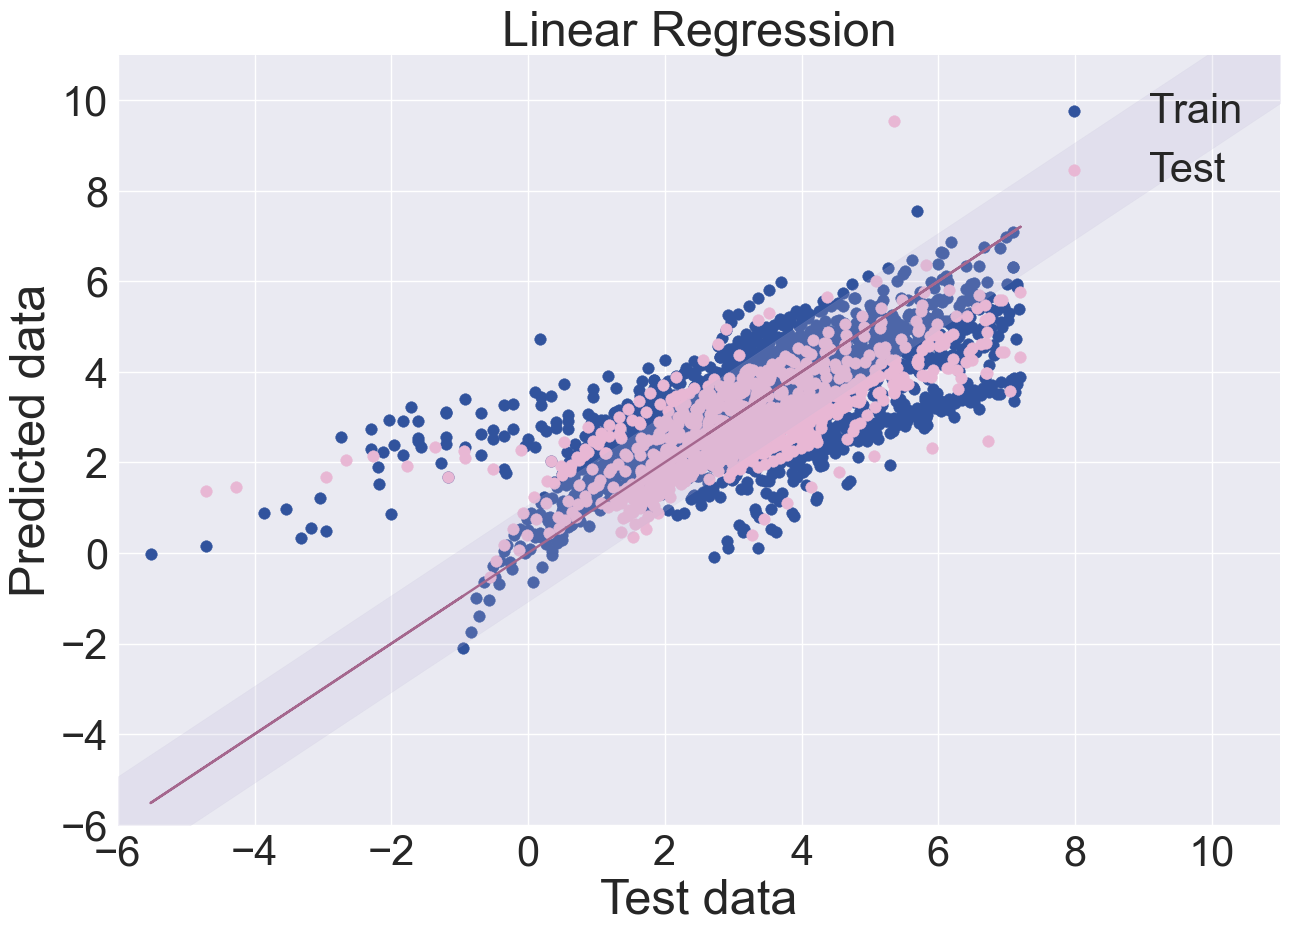

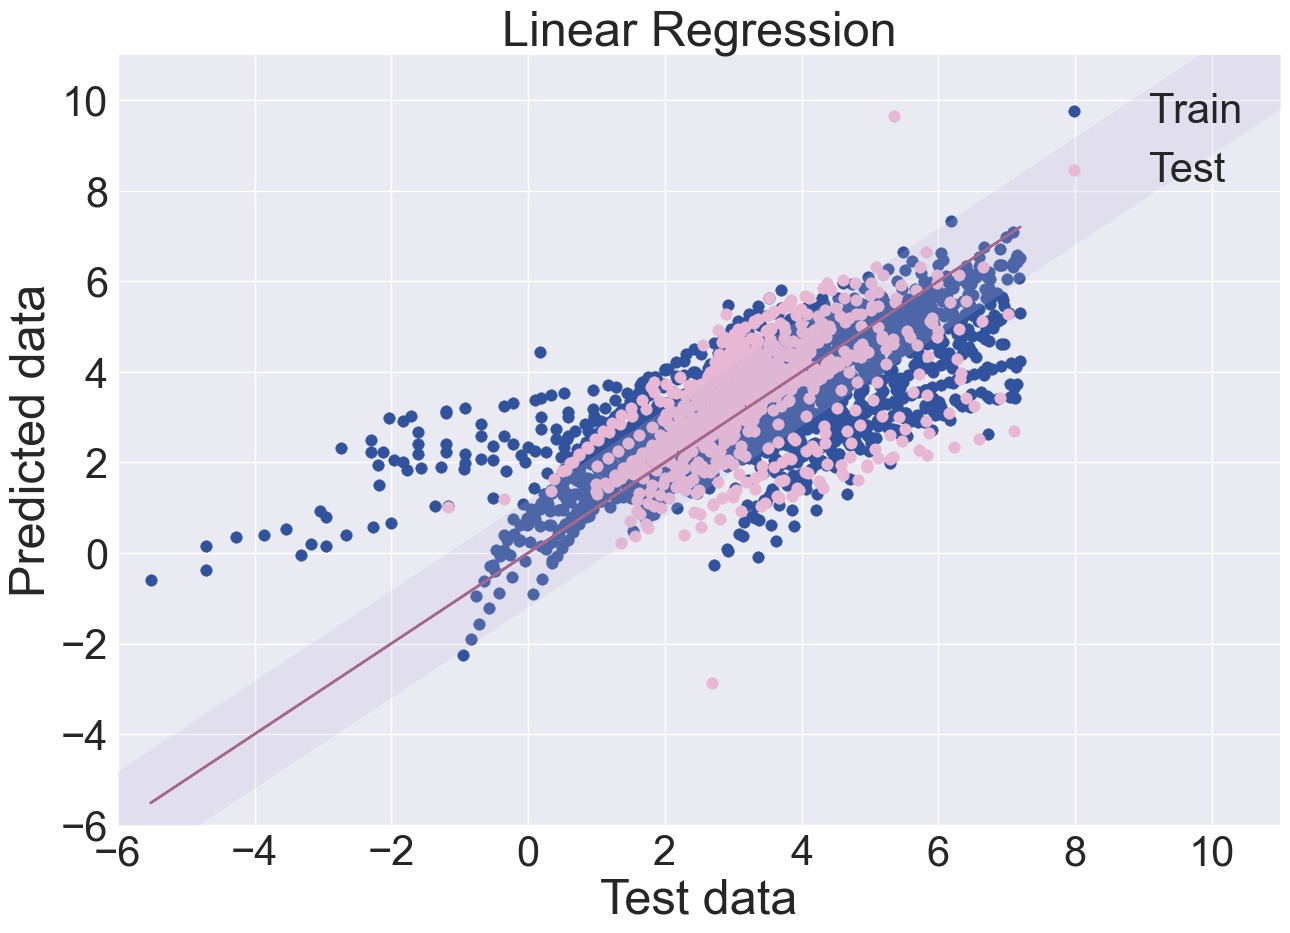

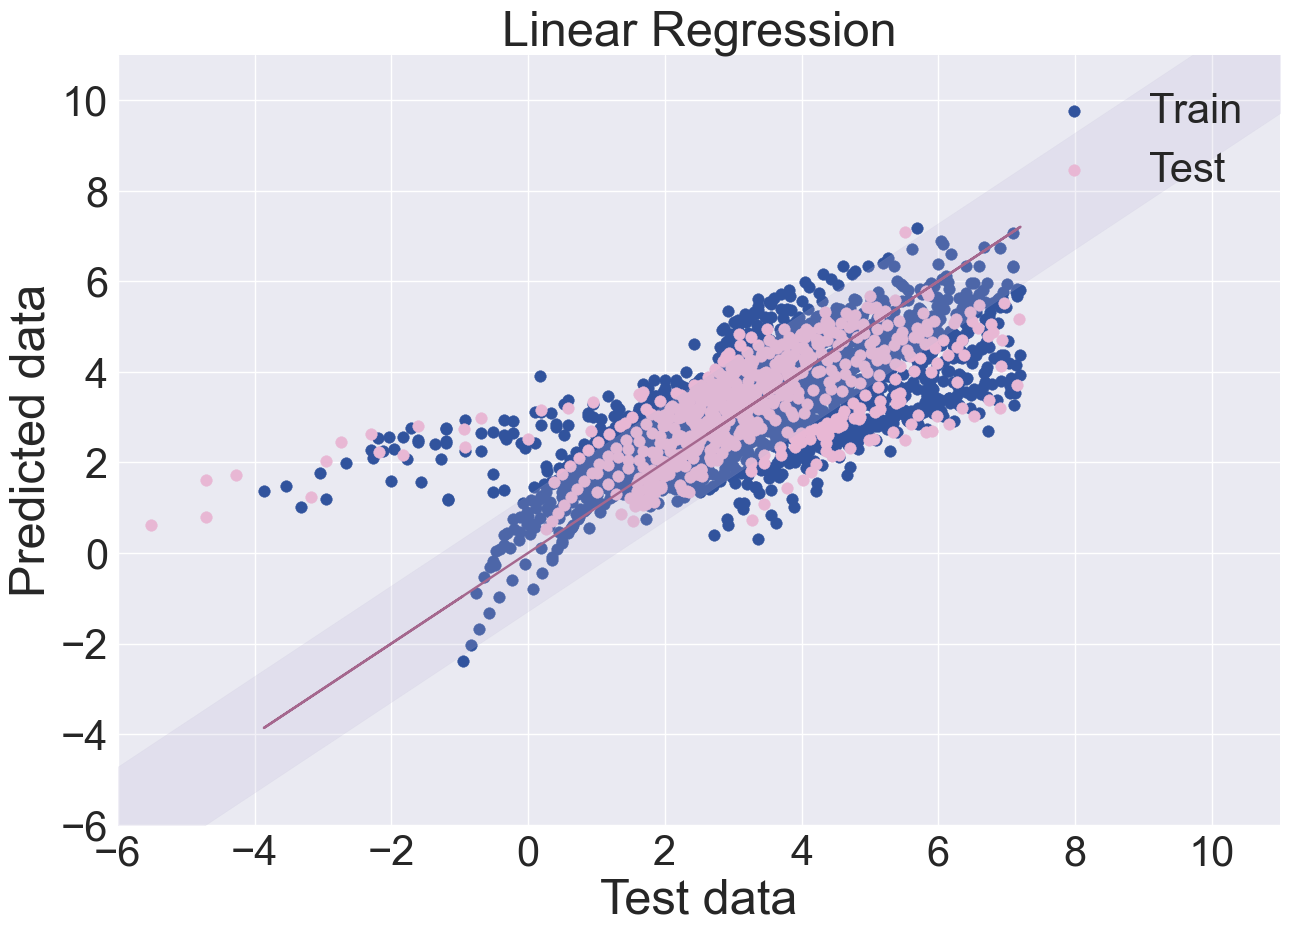

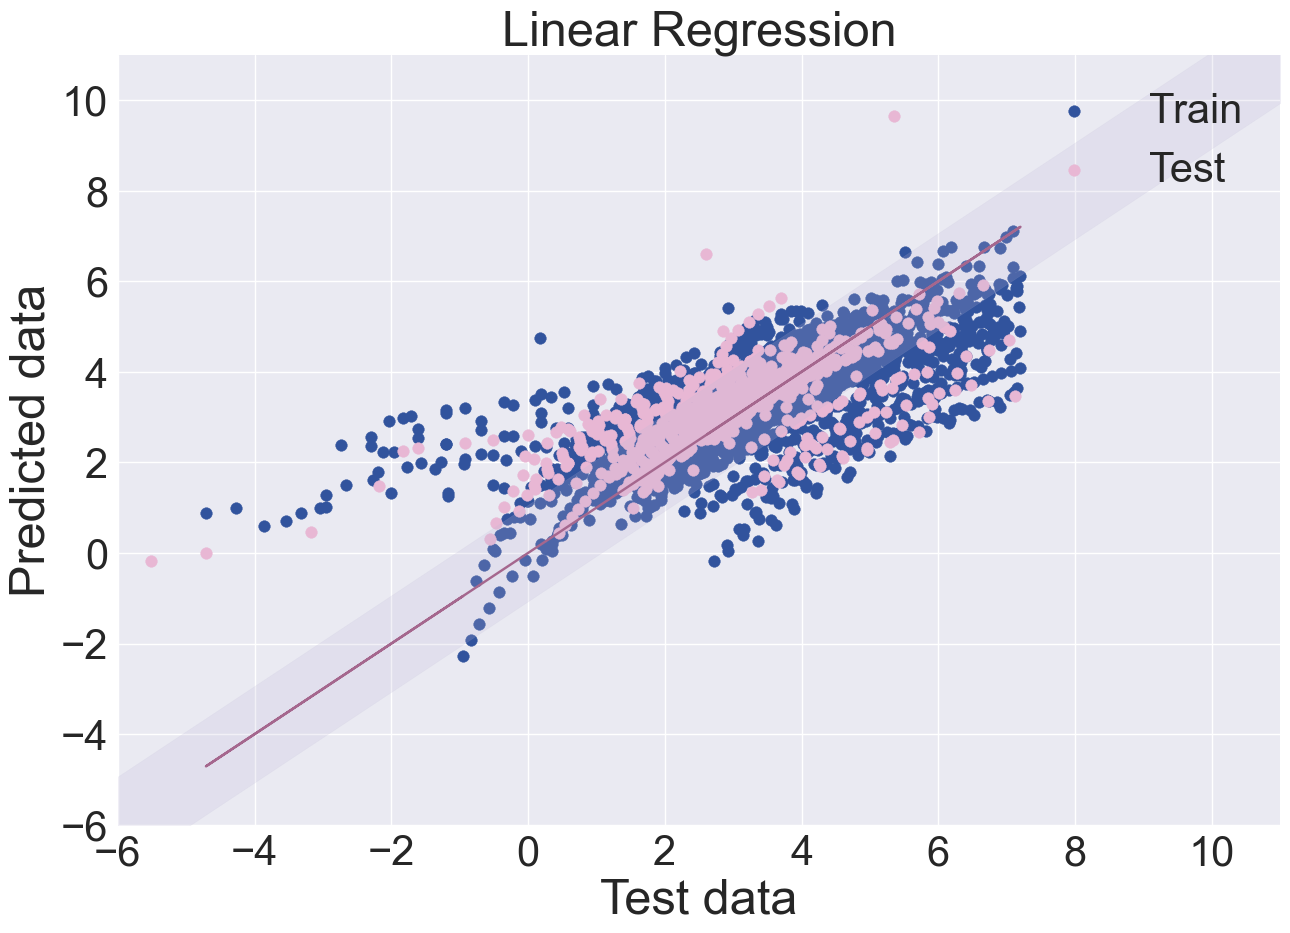

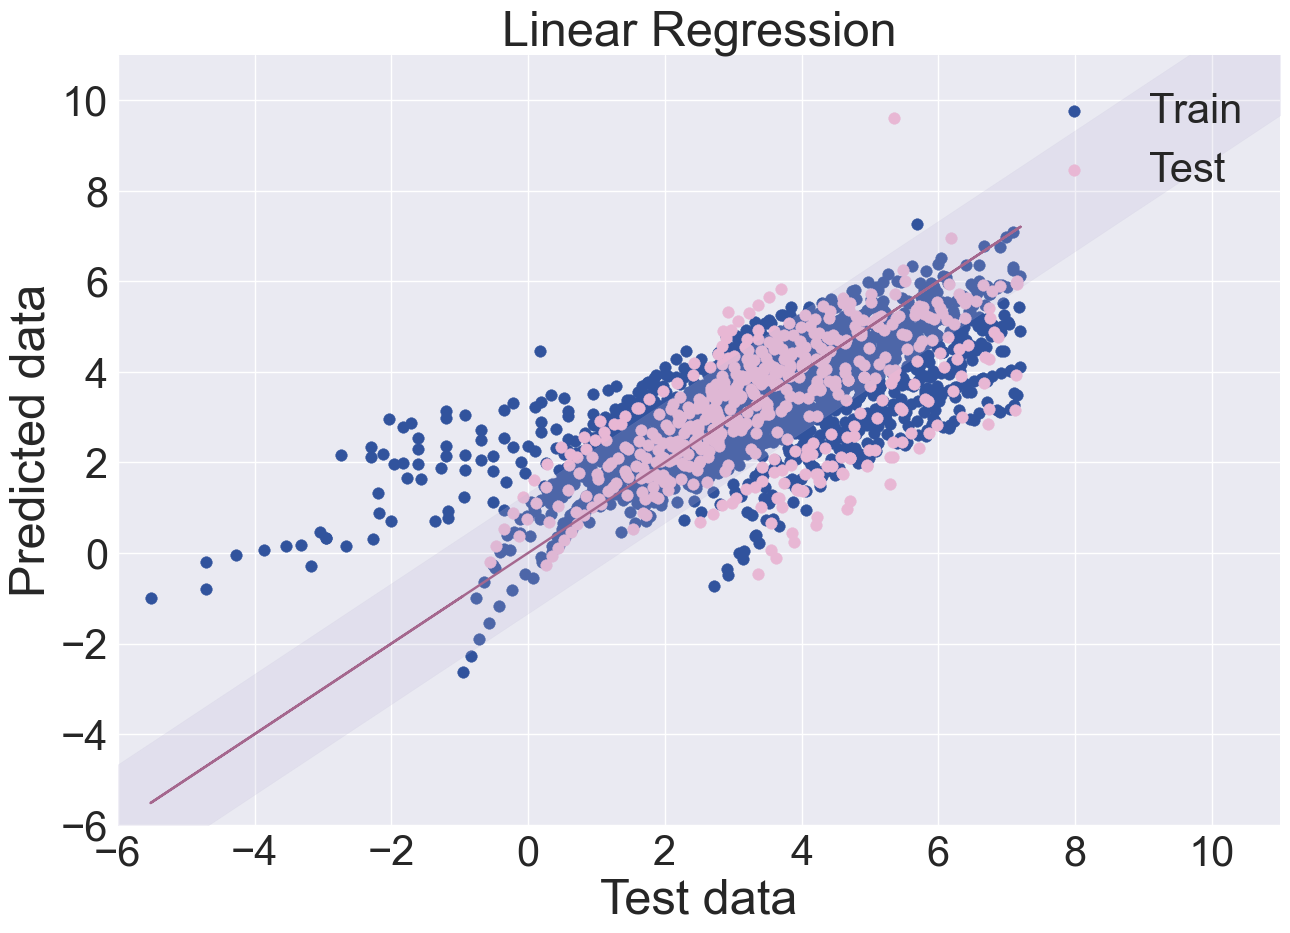

In [15]:
#LR for training dataset
# We split the sample so that there are different systems in the test and training
df_error_train = pd.DataFrame()
x_model = x_train.copy().drop(['ind_syst'],axis=1)
y_model = y_train.copy()
cv = custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2)
count = 0    
#Creating a table to check accuracy on different DES classes
LR_df = x_model[:]
LR_df['Viscosity_lit'] = y_model

   #Scaling the data
for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    name = 'x_test' + str(count) + '.xlsx'
    name1 = 'x_train' + str(count) + '.xlsx'
    db_final.iloc[x_test_mod.index].to_excel(name)
    db_final.iloc[x_train_mod.index].to_excel(name1)
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #Linear regression
    regr_LR = LinearRegression()
    regr_LR.fit(x_train_mod, y_train_mod, sample_weight=sample_w)
    y_pred = regr_LR.predict(x_test_mod)
    y1_pred = regr_LR.predict(x_train_mod)

    #Filling in the table in accordance with the metrics
    LR_df['Viscosity_train' + str(count)] = None
    LR_df['Viscosity_test' + str(count)] = None
    LR_df['Viscosity_train' + str(count)].iloc[train_idx] = y1_pred
    LR_df['Viscosity_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['Linear Regression' + str(count)] = regr_metrics(regr_LR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Linear Regression', fontsize=35)
df_error_train

In [16]:
df_error_LR = metrics_class(LR_df, 'Linear Regression')
df_error_LR

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train       R2_test  RMSE_train  \
0   Linear Regression0         2     I  0.366730           NaN    0.030385   
1   Linear Regression0         2   III  0.506098      0.474728    0.831174   
2   Linear Regression0         2    IV  0.910225     -0.080242    0.280660   
3   Linear Regression0         2     V  0.132055      0.413809    1.649332   
4   Linear Regression0         3  None  0.728846      0.574381    0.964973   
5   Linear Regression1         2     I  0.672796 -12936.246848    0.022404   
6   Linear Regression1         2   III  0.619100      0.386414    0.772894   
7   Linear Regression1         2    IV  0.864477      -1.69451    0.303690   
8   Linear Regression1         2     V  0.210277     -0.187736    1.679747   
9   Linear Regression1         3  None  0.738068     -0.214256    0.949322   
10  Linear Regression2         2     I -0.017245           NaN    0.033272   
11  Linear Regression2         2   III  0.517410       0.41428    0.854978   
12  Linear Regression2         2    IV  0.832225     -0.025296    0.396614   
13  Linear Regression2         2     V  0.175605      0.273856    1.569828   
14  Linear Regression2         3  None  0.684906      0.060585    1.042906   
15  Linear Regression3         2     I -0.487360           NaN    0.036936   
16  Linear Regression3         2   III  0.508621      0.815487    0.840064   
17  Linear Regression3         2    IV  0.839873     -0.345602    0.332066   
18  Linear Regression3         2     V  0.178051      0.294107    1.558198   
19  Linear Regression3         3  None  0.714073      0.325415    1.046152   
20  Linear Regression4         2     I  0.770603          None    0.018288   
21  Linear Regression4         2   III  0.593081      0.470842    0.769267   
22  Linear Regression4         2    IV  0.804740     -0.496991    0.366690   
23  Linear Regression4         2     V  0.258486     -0.535695    1.555049   
24  Linear Regression4         3  None  0.707823      0.541535    0.991304   

   RMSE_test  
0        NaN  
1   0.935245  
2   0.673192  
3   1.303263  
4   1.135548  
5   3.978616  
6   0.844875  
7   1.057297  
8   1.412316  
9   1.454133  
10  0.600581  
11  0.942785  
12  0.456989  
13  1.546484  
14  1.229901  
15  3.989279  
16  0.468324  
17  0.778368  
18  1.636077  
19  1.200845  
20      None  
21  0.916377  
22  0.820987  
23  1.736312  
24  1.259118

**Output:** Linear regression has low accuracy characteristics, but can be used to compare other methods with it

## 3. Decision trees
A decision tree is a logical classification algorithm that solves classification and regression problems. It is a combination of logical conditions into a tree structure.other methods with it

### 3.1. Decision Tree Regressor
A decision tree is a decision-making tool that uses a tree-like structure similar to a flowchart, or is a model of decisions and all their possible outcomes, including outcomes, input costs and utility.

In [17]:
#We optimize for DTR
regr_DTR = DecisionTreeRegressor()

search_space = {"max_depth": Integer(1, 13),
                "criterion": Categorical(['squared_error', 'absolute_error']), 
                "min_samples_split": Real(0.01, 0.5), 
                "min_samples_leaf": Real(0.01, 0.2), 
                "max_features": Categorical(['auto', 'sqrt', 'log2'])}

#Scaling the data 
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sample_weight=compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))
opt_DTR = BayesSearchCV(estimator = regr_DTR, search_spaces=search_space, cv=custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_DTR.fit(x_train01, y_model, sample_weight=sample_weight)


criterion = opt_DTR.best_estimator_.criterion
max_depth = opt_DTR.best_estimator_.max_depth
min_samples_split = opt_DTR.best_estimator_.min_samples_split
min_samples_leaf = opt_DTR.best_estimator_.min_samples_leaf
max_features = opt_DTR.best_estimator_.max_features


print('criterion:', criterion,'max_depth:', max_depth, 'min_samples_split:', min_samples_split,'min_samples_leaf:', min_samples_leaf,'max_features:', max_features)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
criterion: squared_error max_depth: 13 min_samples_split: 0.01 min_samples_leaf: 0.01 max_features: auto


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame


r2_test: 0.3660480822038673
MAE_test: 0.9246511599174861
MSE_test: 1.4877615215112177
RMSE_test: 1.2197383004198965
r2_train: 0.7524203472021962
MAE_train: 0.5496241146175308
MSE_train: 0.6985876058695731
RMSE_train: 0.8358155333981135
r2_test: -0.2777023601992461
MAE_test: 0.9774276689823634
MSE_test: 1.910581490781889
RMSE_test: 1.3822378560804536
r2_train: 0.7625122325568816
MAE_train: 0.5569602361619838
MSE_train: 0.7243148781696699
RMSE_train: 0.8510669058127391


r2_test: 0.24653918390952057
MAE_test: 0.9614581662515784
MSE_test: 2.128535756987579
RMSE_test: 1.458950224300877
r2_train: 0.747004066181566
MAE_train: 0.5254408441786987
MSE_train: 0.6734744786537596
RMSE_train: 0.8206549083833957
r2_test: 0.10503909823058988
MAE_test: 0.9301824913756591
MSE_test: 1.8663383332612242
RMSE_test: 1.3661399391208882
r2_train: 0.8068152202607697
MAE_train: 0.5053564638988334
MSE_train: 0.5488623308292119
RMSE_train: 0.7408524352590142
r2_test: 0.22941748209316648
MAE_test: 1.051218039497347
MSE_test: 1.955592484537776
RMSE_test: 1.3984250013989938
r2_train: 0.6389354459705912
MAE_train: 0.6538196999568646
MSE_train: 0.9791296479350206
RMSE_train: 0.9895098018387795


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.469935            0.539101            0.490642   
1            0.513731            0.073678            0.415830   
2            1.222975            1.185621            1.164436   
3            1.068260            1.176925            1.284635   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.490705            0.519521                   0.752420   
1            0.456478            0.300740                   0.366048   
2            1.202902            1.141472                   0.835816   
3            1.064638            1.332138                   1.219738   

   Decision Tree Regression1  Decision Tree Regression2  \
0                   0.762512                   0.747004   
1                  -0.277702                   0.246539   
2                   0.851067                   0.820655   
3                   1.382238                   1.458950   

   Decision Tree Regression3  Decision Tree Regression4  
0                   0.806815                   0.638935  
1                   0.105039                   0.229417  
2                   0.740852                   0.989510  
3                   1.366140                   1.398425

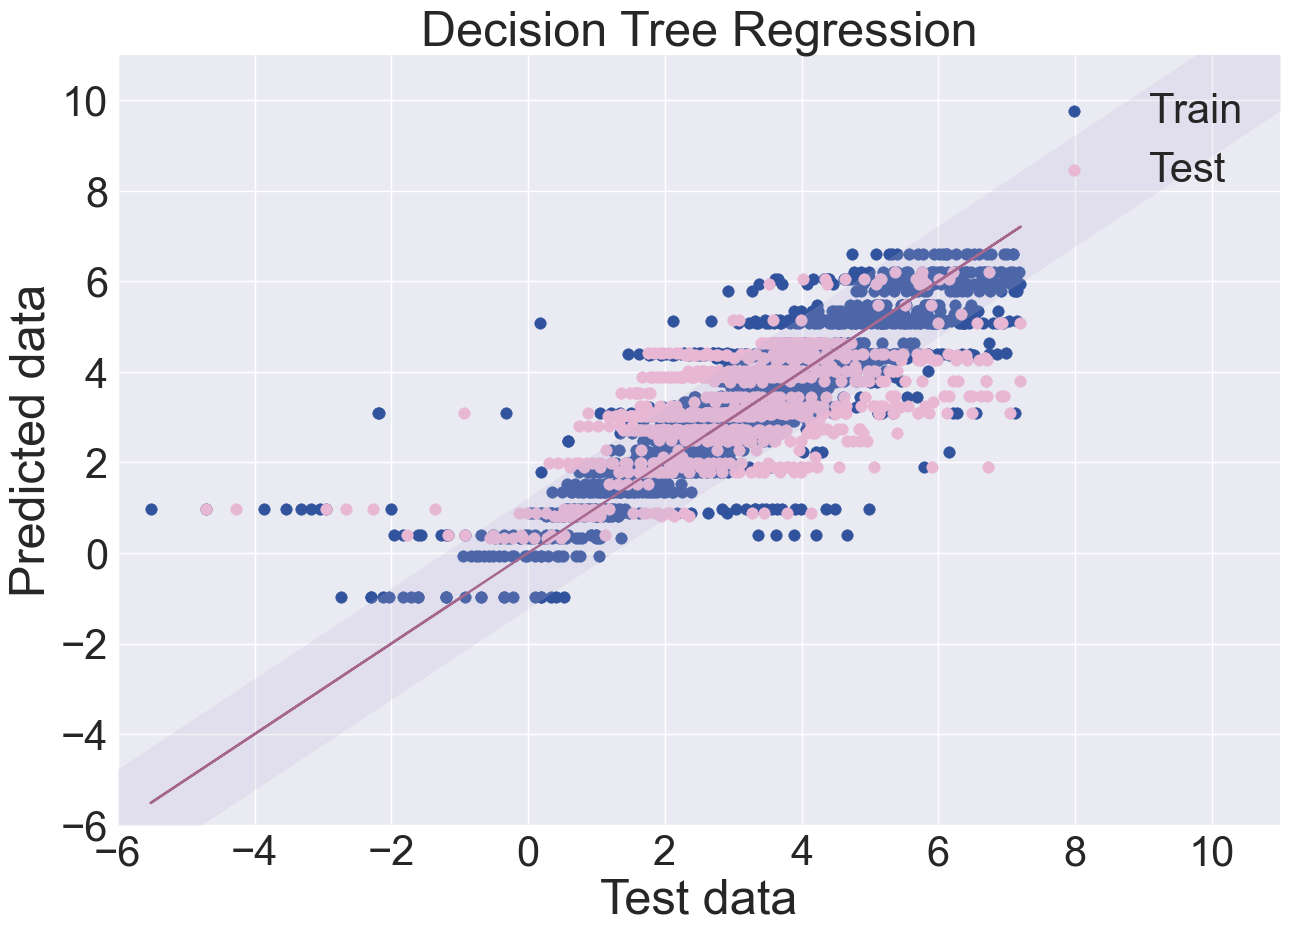

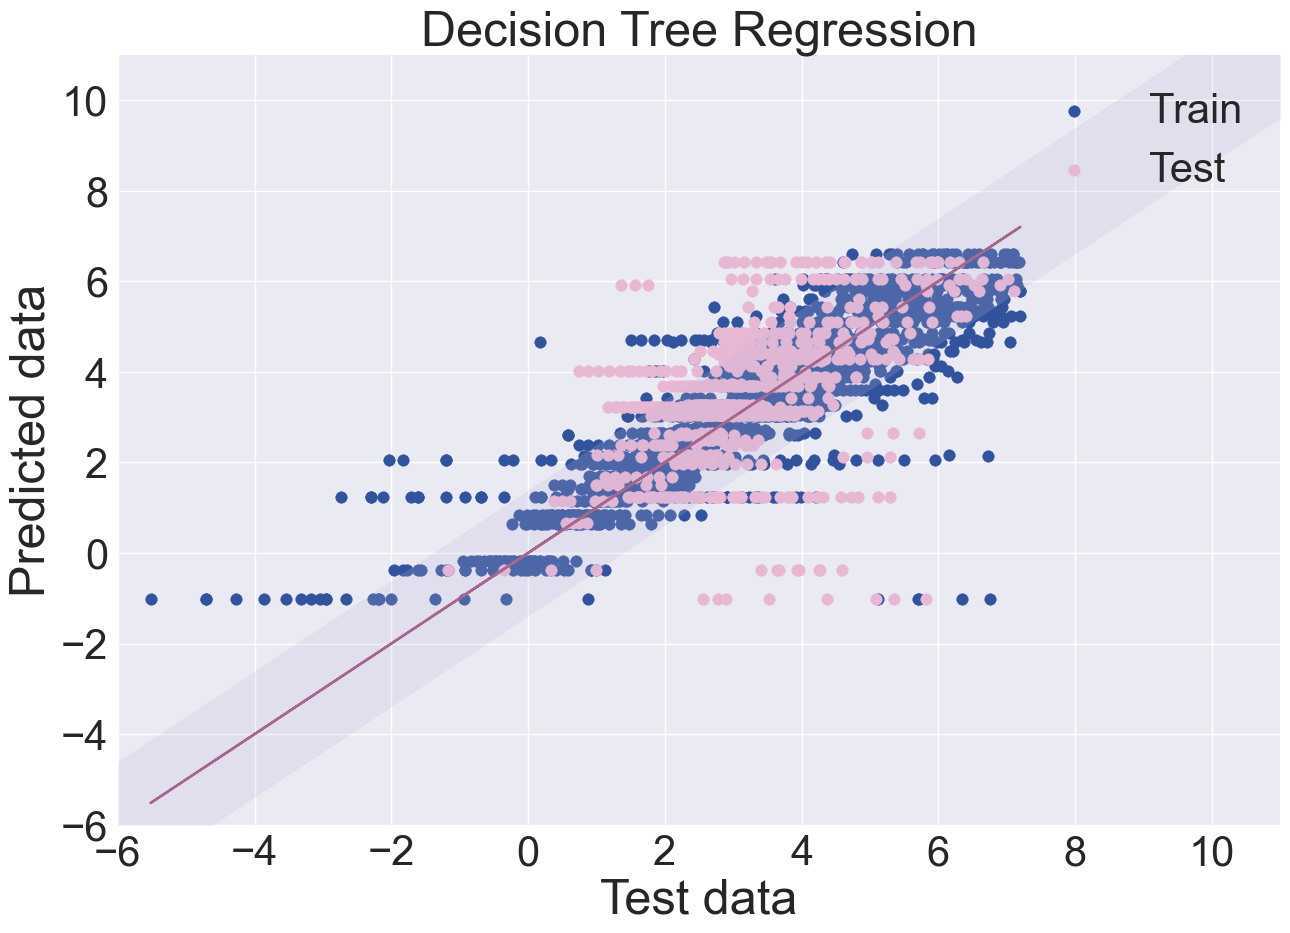

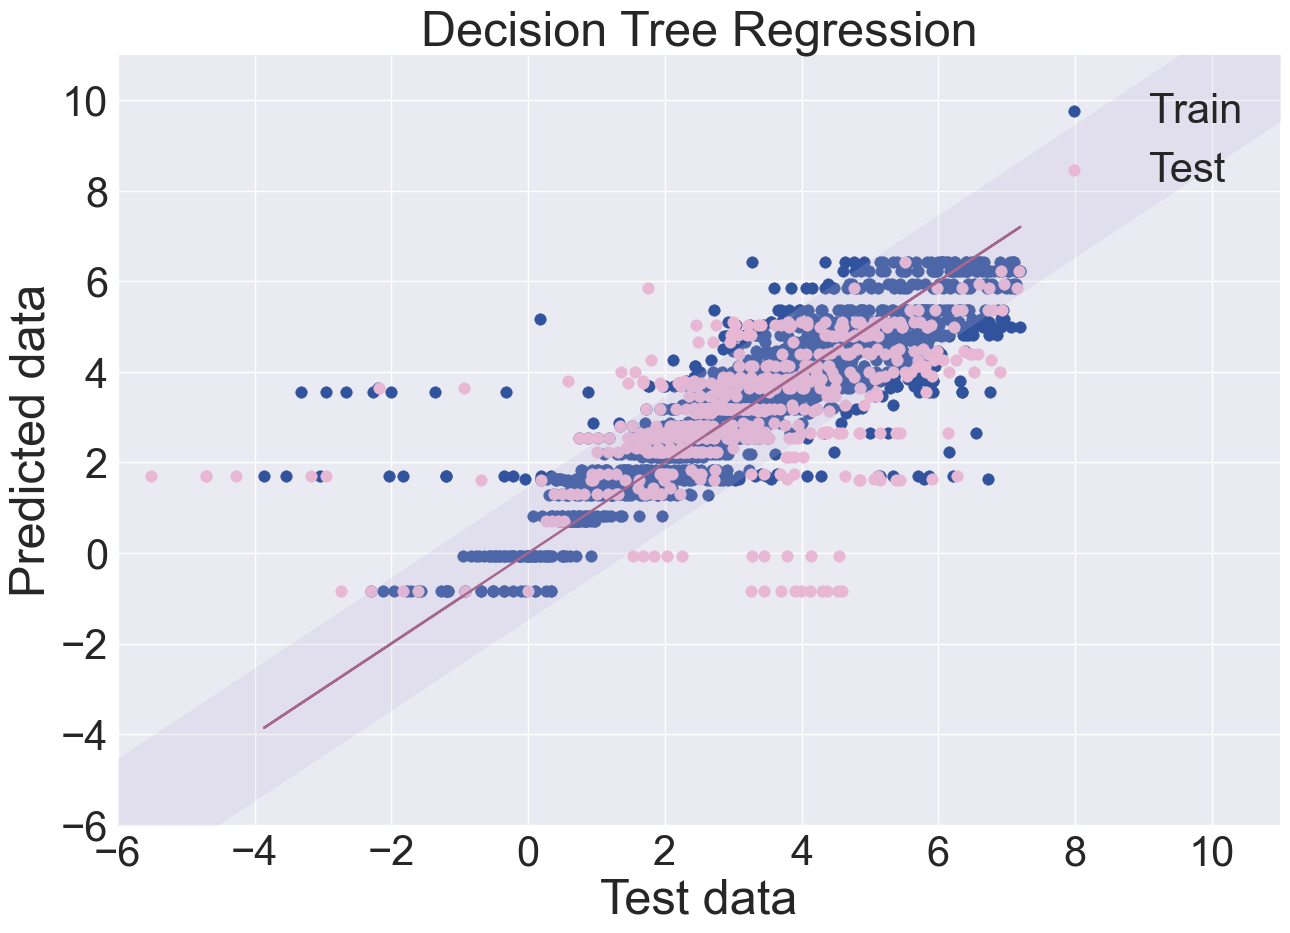

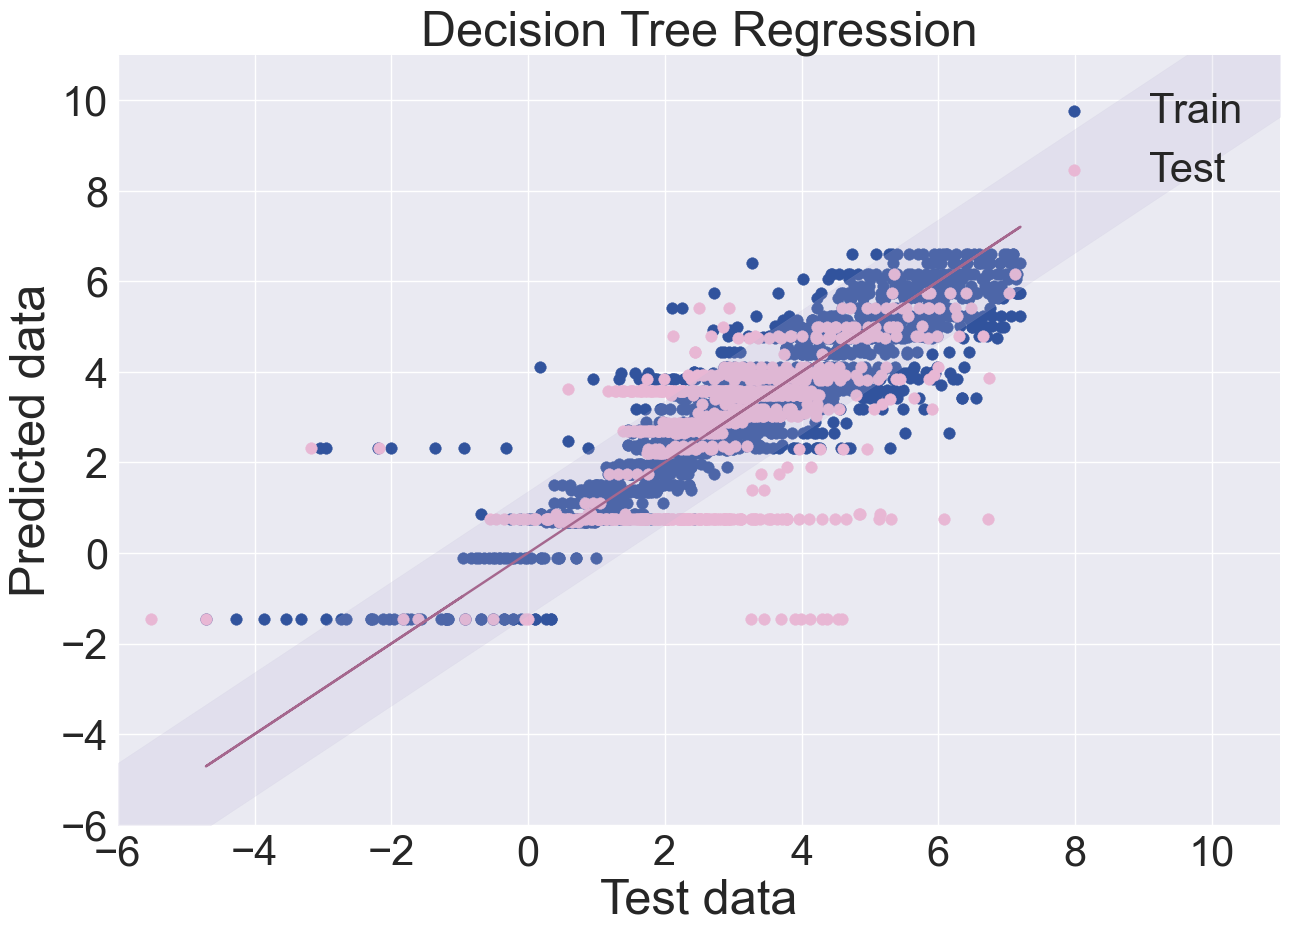

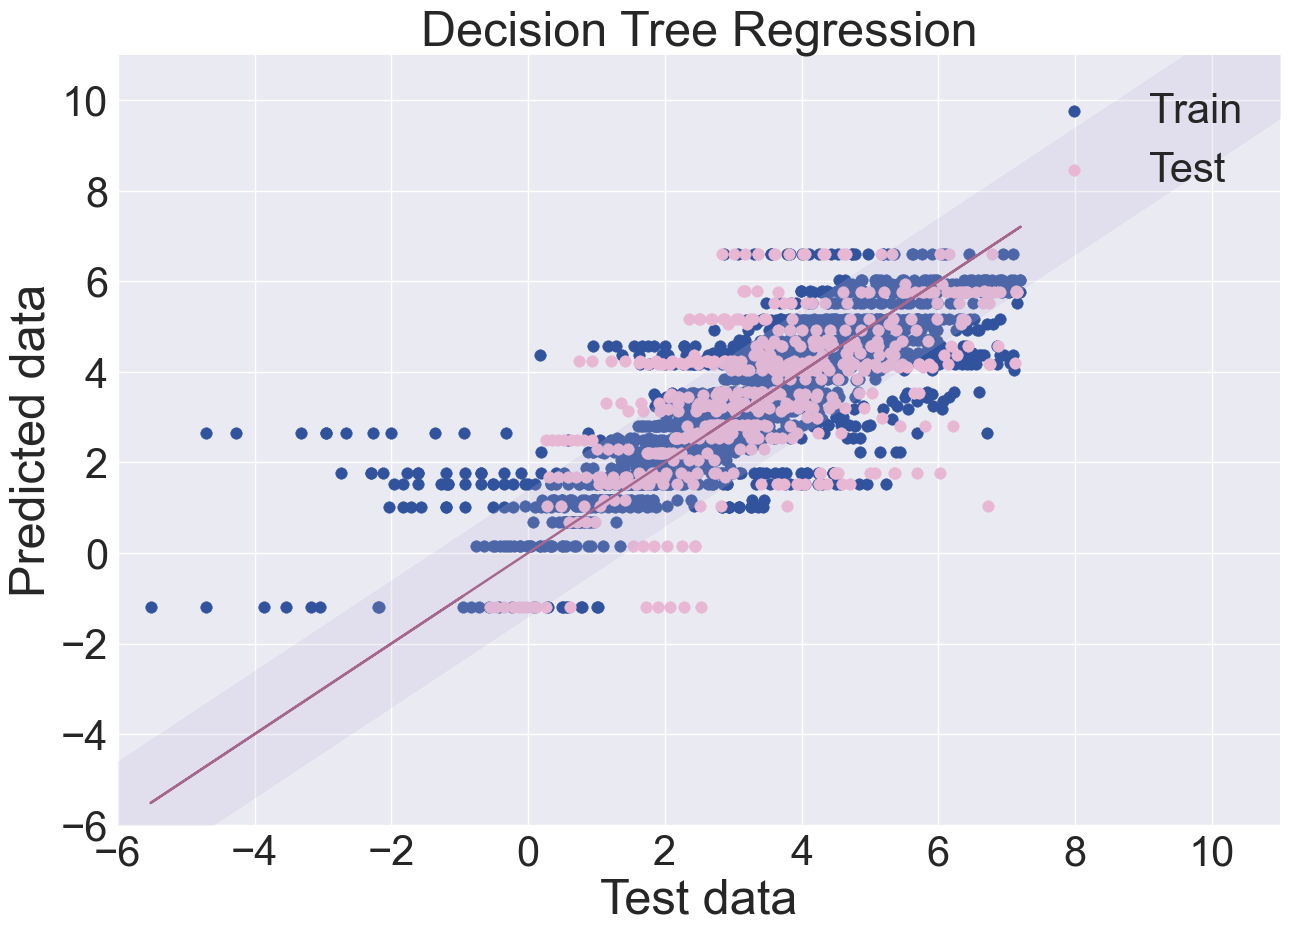

In [18]:
count = 0
#Creating a table to check accuracy on different DES classes
DTR_df = x_model[:]
DTR_df['Viscosity_lit'] = y_model
for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    
    #Scaling the data 
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #DTR
    regr_DTR = DecisionTreeRegressor(criterion = criterion, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf, max_features = max_features)
    regr_DTR.fit(x_train_mod, y_train_mod,sample_weight=sample_w)
    y_pred = regr_DTR.predict(x_test_mod)
    y1_pred = regr_DTR.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    DTR_df['Viscosity_train' + str(count)] = None
    DTR_df['Viscosity_test' + str(count)] = None
    DTR_df['Viscosity_train' + str(count)].iloc[train_idx] = y1_pred
    DTR_df['Viscosity_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['Decision Tree Regression' + str(count)] = regr_metrics(regr_DTR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Decision Tree Regression', fontsize=35)
df_error_train

In [19]:
df_error_DTR = metrics_class(DTR_df, 'Decision Tree Regressor')
df_error_DTR

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train   R2_test  RMSE_train  \
0   Decision Tree Regressor0         2     I -0.000744       NaN    0.038197   
1   Decision Tree Regressor0         2   III  0.676653  0.179025    0.672521   
2   Decision Tree Regressor0         2    IV  0.741902 -0.257667    0.475876   
3   Decision Tree Regressor0         2     V  0.641326   0.36684    1.060259   
4   Decision Tree Regressor0         3  None  0.867249  0.435519    0.675191   
5   Decision Tree Regressor1         2     I -0.002988  -0.20021    0.039224   
6   Decision Tree Regressor1         2   III  0.744904  0.075068    0.632509   
7   Decision Tree Regressor1         2    IV  0.791376 -4.329631    0.376795   
8   Decision Tree Regressor1         2     V  0.636924 -0.643262    1.138951   
9   Decision Tree Regressor1         3  None  0.847427 -0.614987    0.724532   
10  Decision Tree Regressor2         2     I -0.016400       NaN    0.033259   
11  Decision Tree Regressor2         2   III  0.746417  0.277732    0.619763   
12  Decision Tree Regressor2         2    IV  0.717209  0.330659    0.514918   
13  Decision Tree Regressor2         2     V  0.614747   0.03764    1.073143   
14  Decision Tree Regressor2         3  None  0.831642 -0.149343    0.762327   
15  Decision Tree Regressor3         2     I -0.021604       NaN    0.030611   
16  Decision Tree Regressor3         2   III  0.718391  0.237313    0.635957   
17  Decision Tree Regressor3         2    IV  0.806968  0.642065    0.364592   
18  Decision Tree Regressor3         2     V  0.748485  0.096568    0.861951   
19  Decision Tree Regressor3         3  None  0.867992 -0.163817    0.710833   
20  Decision Tree Regressor4         2     I -0.034544      None    0.038836   
21  Decision Tree Regressor4         2   III  0.508786 -0.407986    0.845198   
22  Decision Tree Regressor4         2    IV  0.831756 -2.583549    0.340379   
23  Decision Tree Regressor4         2     V  0.556353  0.320124    1.202827   
24  Decision Tree Regressor4         3  None  0.749023  0.221997    0.918757   

   RMSE_test  
0        NaN  
1   1.169226  
2   0.726376  
3   1.354469  
4   1.307734  
5   0.038321  
6   1.037313  
7   1.486981  
8   1.661213  
9   1.677002  
10  0.492976  
11  1.046928  
12  0.369236  
13   1.78034  
14  1.360398  
15  0.059631  
16  0.952153  
17  0.401447  
18  1.850897  
19  1.577289  
20      None  
21  1.494792  
22  1.270233  
23  1.155288  
24  1.640227

### 3.2. Random Forest Regression
Random forest or random decision forests is a collective learning method for classification, regression, and other tasks that works by building multiple decision trees during training. For regression tasks, the average value or the averaged forecast of individual trees is returned.

In [20]:
#We optimize for RFR
regr_RFR = RandomForestRegressor()

search_space = {"n_estimators": Integer(50,400),
    "criterion": Categorical(['squared_error', 'absolute_error']),
    "min_samples_split": Real(0.01, 0.6),
    "min_samples_leaf": Real(0.01, 0.5),
    "max_depth": Integer(1, 12),
    "max_features": Integer(3, 24)}

#Scaling the data 
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sample_weight=compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))
opt_RFR = BayesSearchCV(estimator = regr_RFR, search_spaces=search_space, cv = custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_RFR.fit(x_train01, y_model, sample_weight=sample_weight)

n_esti = opt_RFR.best_estimator_.n_estimators
criterion = opt_RFR.best_estimator_.criterion
min_leaf = opt_RFR.best_estimator_.min_samples_leaf
min_split = opt_RFR.best_estimator_.min_samples_split
depth = opt_RFR.best_estimator_.max_depth
max_feat = opt_RFR.best_estimator_.max_features

print('n_esti:', n_esti,'depth:', depth, 'criterion:', criterion, 'min_leaf:', min_leaf,'min_split:', min_split,'max_feat:', max_feat)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



r2_test: 0.5232333410666611
MAE_test: 0.7431420278226084
MSE_test: 1.1188783723004476
RMSE_test: 1.057770472409042
r2_train: 0.7481185566046791
MAE_train: 0.5572006722235601
MSE_train: 0.7107258311256123
RMSE_train: 0.8430455688310166



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.5153546165184052
MAE_test: 0.6599557712007295
MSE_test: 0.7247028166469314
RMSE_test: 0.8512947883353518
r2_train: 0.7561373792463396
MAE_train: 0.5660782137558789
MSE_train: 0.7437575684129923
RMSE_train: 0.862413803468493



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.4492783048526644
MAE_test: 0.8613034949754528
MSE_test: 1.5557953316701068
RMSE_test: 1.2473152495139739
r2_train: 0.7620736785052629
MAE_train: 0.5384365461619407
MSE_train: 0.633359212174815
RMSE_train: 0.7958386847689769



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.40857411529938503
MAE_test: 0.8270100461114211
MSE_test: 1.2333508622749745
RMSE_test: 1.1105633085398483
r2_train: 0.762729048757069
MAE_train: 0.5451057785765547
MSE_train: 0.6741167058452976
RMSE_train: 0.8210461045795769
r2_test: 0.5747564457151106
MAE_test: 0.8291238465169335
MSE_test: 1.0791876009808536
RMSE_test: 1.0388395453489694
r2_train: 0.7355106159154149
MAE_train: 0.5524940598416325
MSE_train: 0.7172384955300738
RMSE_train: 0.8468993420295435



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.469935            0.539101            0.490642   
1            0.513731            0.073678            0.415830   
2            1.222975            1.185621            1.164436   
3            1.068260            1.176925            1.284635   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.490705            0.519521                   0.752420   
1            0.456478            0.300740                   0.366048   
2            1.202902            1.141472                   0.835816   
3            1.064638            1.332138                   1.219738   

   Decision Tree Regression1  Decision Tree Regression2  \
0                   0.762512                   0.747004   
1                  -0.277702                   0.246539   
2                   0.851067                   0.820655   
3                   1.382238                   1.458950   

   Decision Tree Regression3  Decision Tree Regression4  \
0                   0.806815                   0.638935   
1                   0.105039                   0.229417   
2                   0.740852                   0.989510   
3                   1.366140                   1.398425   

   Random Forest Regression0  Random Forest Regression1  \
0                   0.748119                   0.756137   
1                   0.523233                   0.515355   
2                   0.843046                   0.862414   
3                   1.057770                   0.851295   

   Random Forest Regression2  Random Forest Regression3  \
0                   0.762074                   0.762729   
1                   0.449278                   0.408574   
2                   0.795839                   0.821046   
3                   1.247315                   1.110563   

   Random Forest Regression4  
0                   0.735511  
1                   0.574756  
2                   0.846899  
3                   1.038840

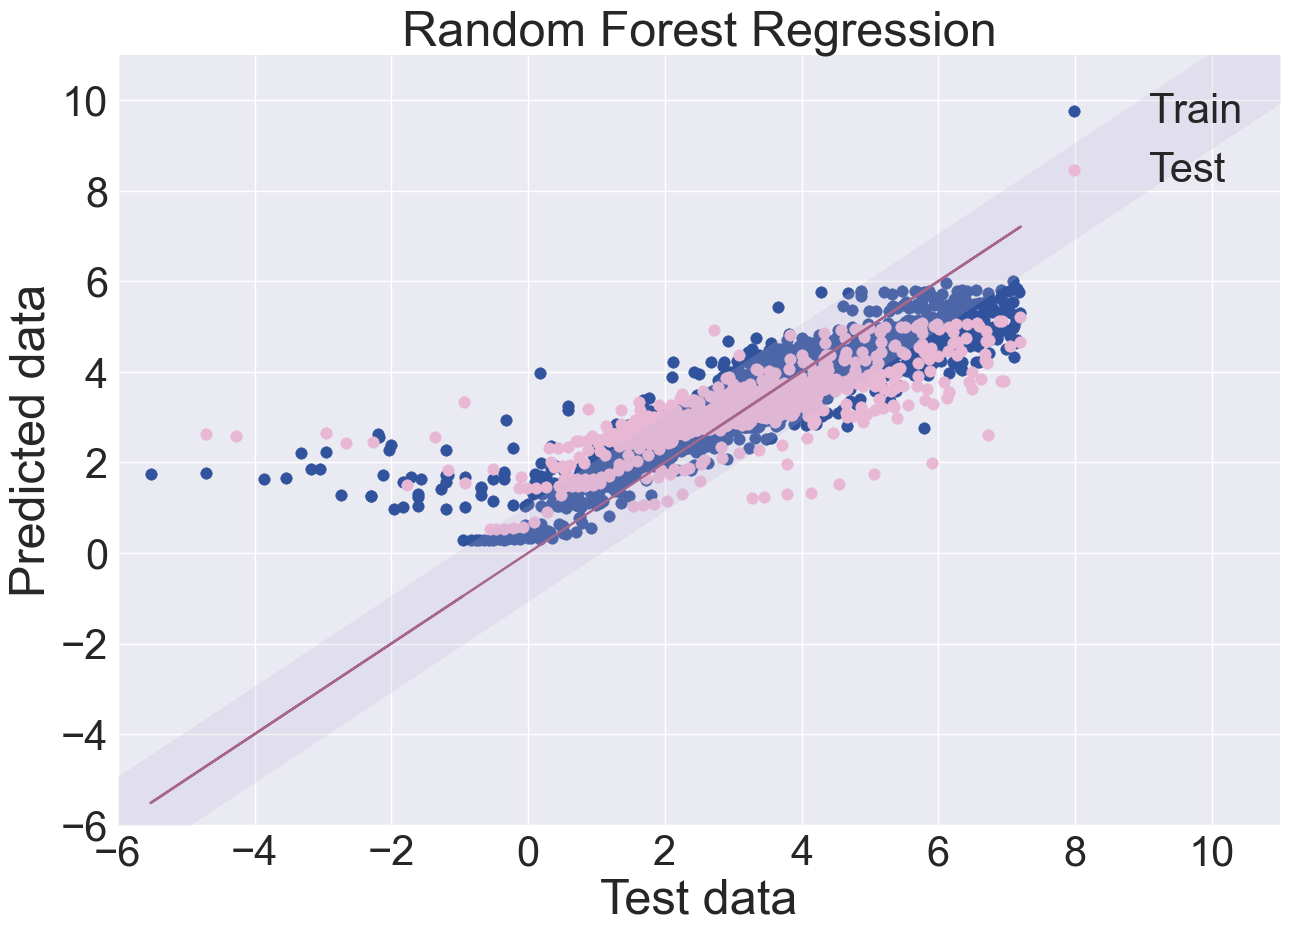

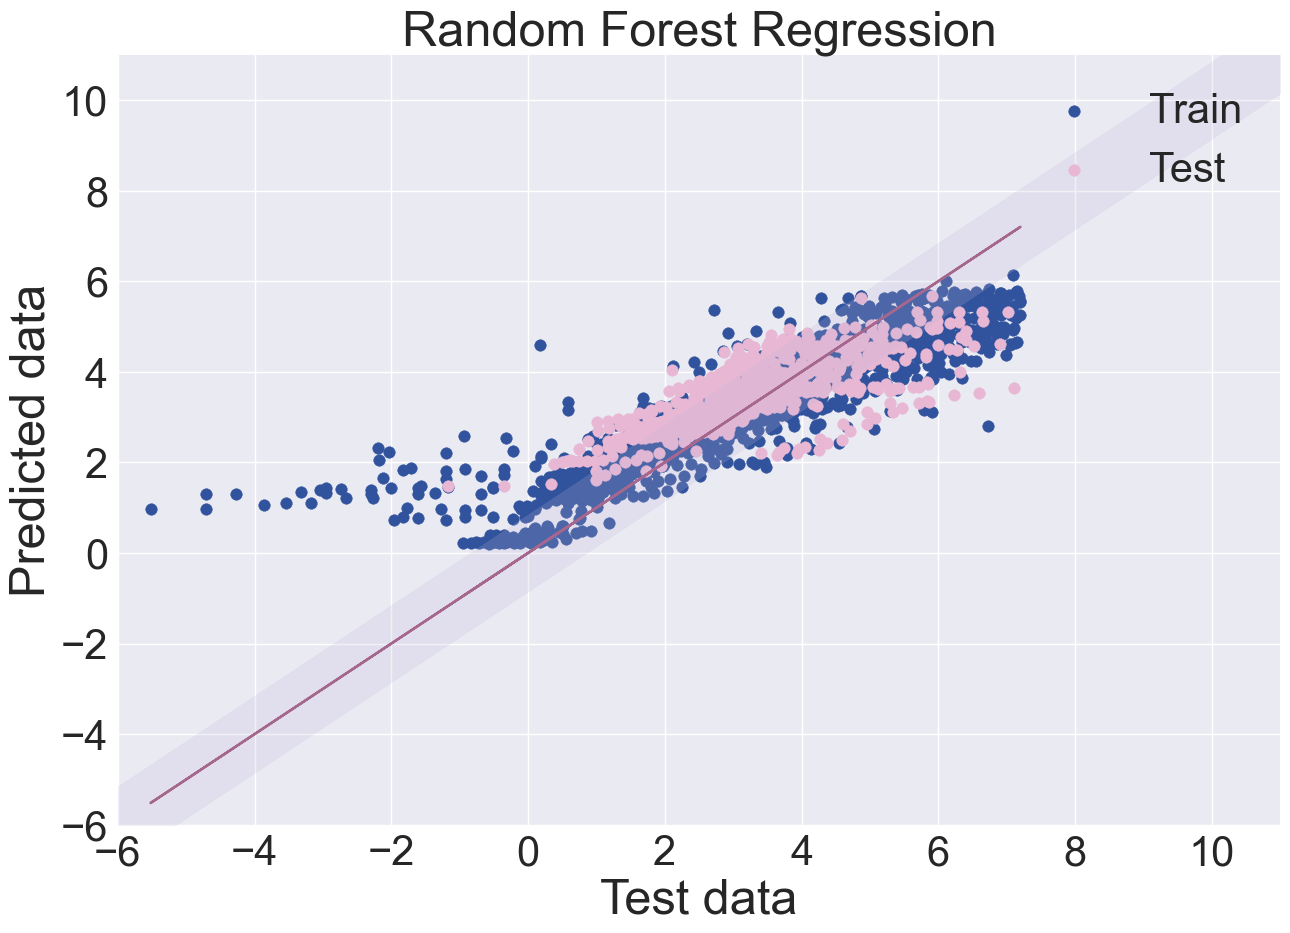

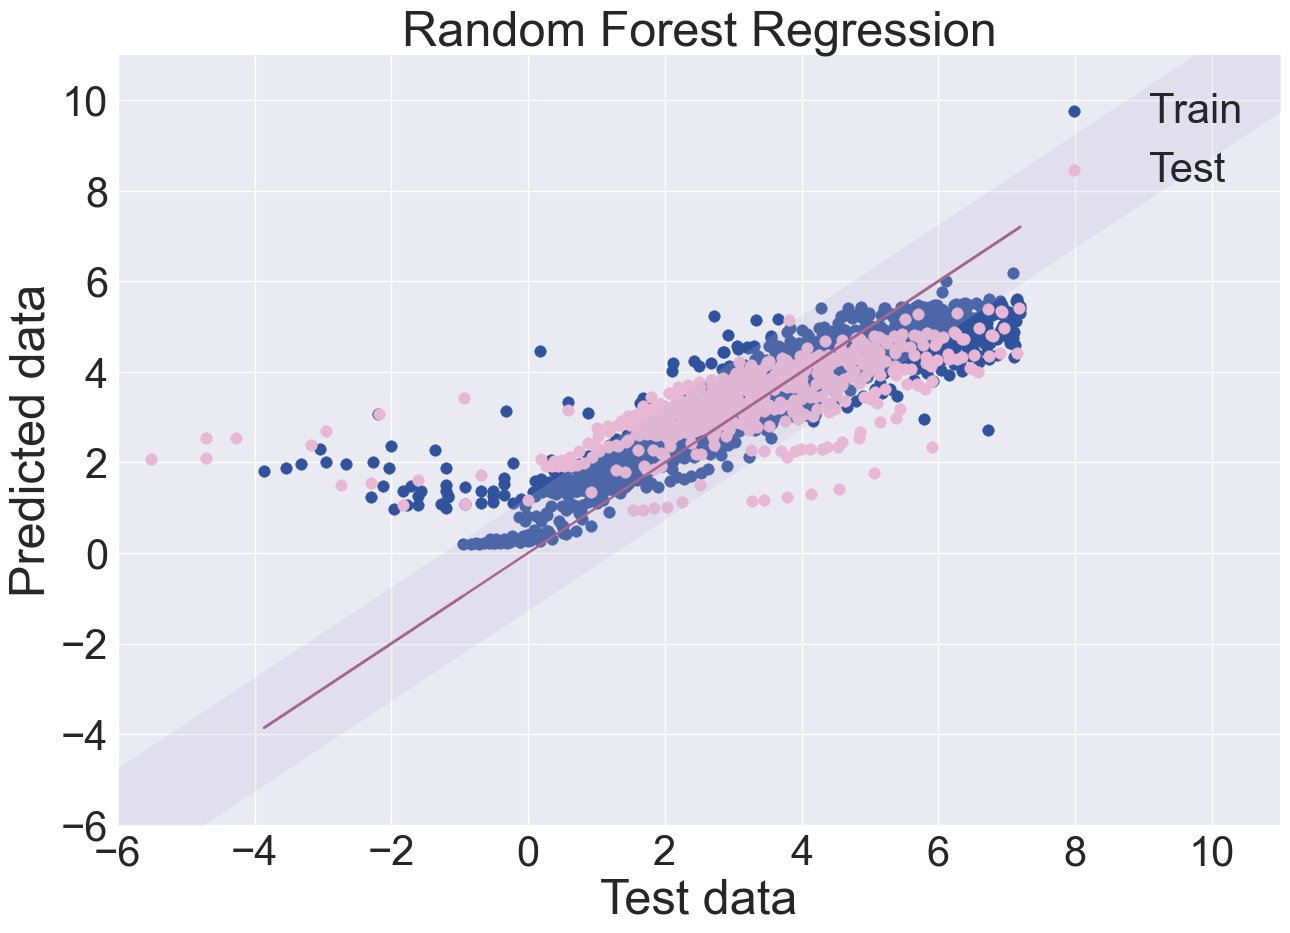

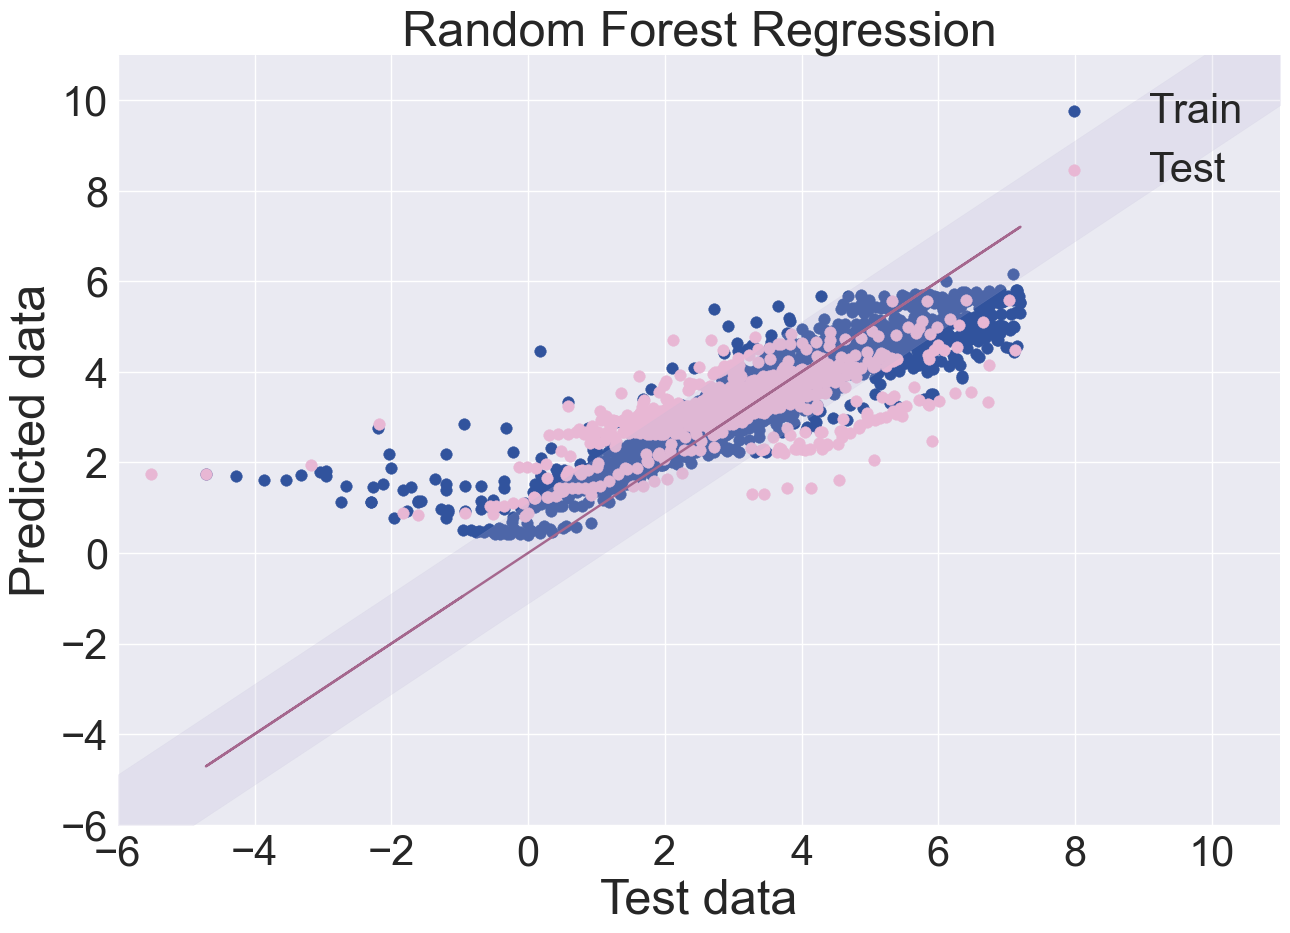

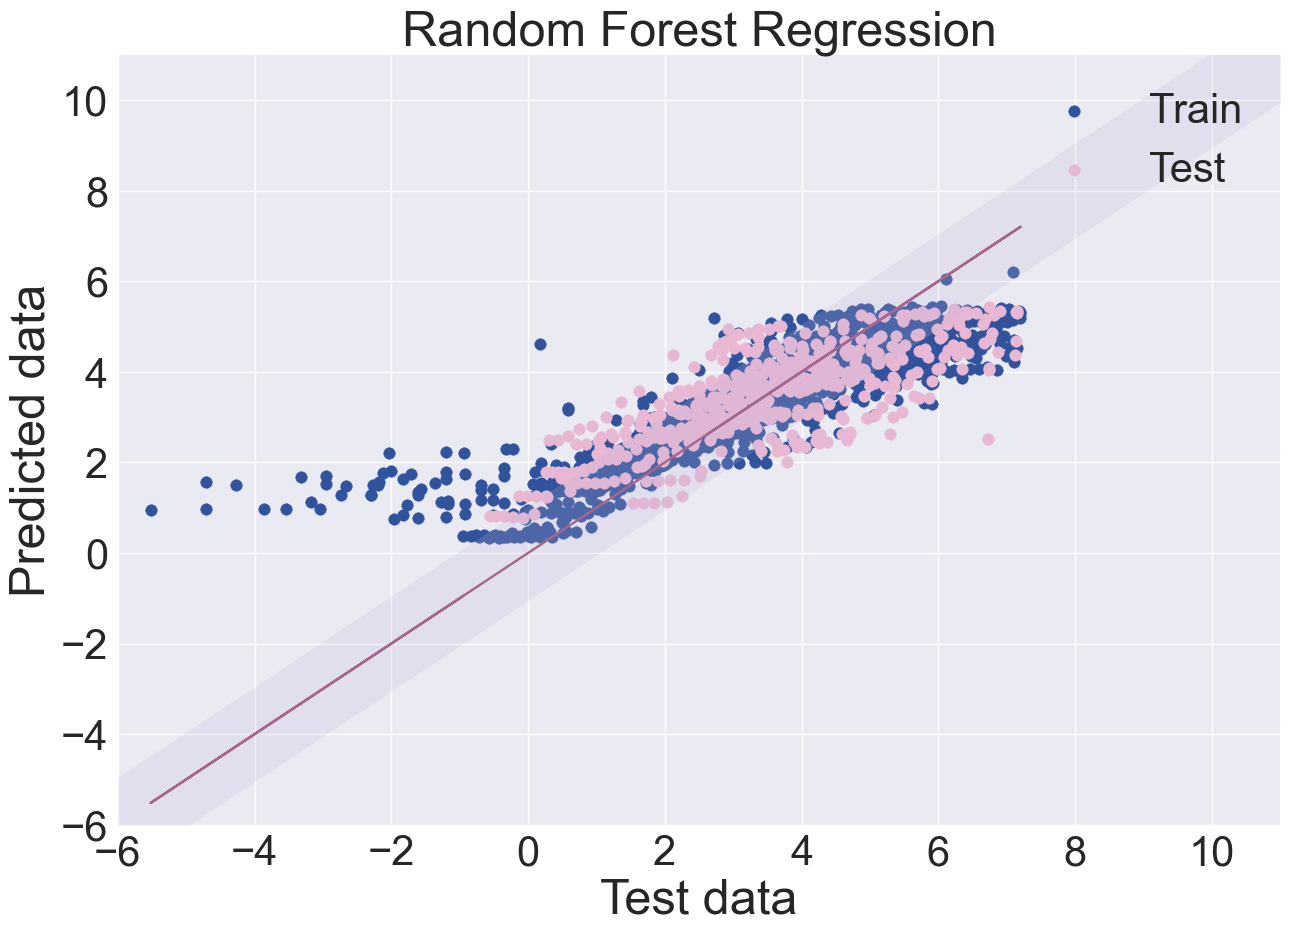

In [21]:
count = 0
#Creating a table to check accuracy on different DES classes
RFR_df = x_model[:]
RFR_df['Viscosity_lit'] = y_model

for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    
    #Scaling the data
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #Random Forest Regression
    regr_RFR = RandomForestRegressor(n_estimators=n_esti, max_depth=depth, min_samples_leaf=min_leaf, 
                                 min_samples_split=min_split, criterion=criterion, max_features=max_feat)
    regr_RFR.fit(x_train_mod, y_train_mod,sample_weight=sample_w)
    y_pred = regr_RFR.predict(x_test_mod)
    y1_pred = regr_RFR.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    RFR_df['Viscosity_train' + str(count)] = None
    RFR_df['Viscosity_test' + str(count)] = None
    RFR_df['Viscosity_train' + str(count)].iloc[train_idx] = y1_pred
    RFR_df['Viscosity_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['Random Forest Regression' + str(count)] = regr_metrics(regr_RFR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Random Forest Regression', fontsize=35)
df_error_train

In [22]:
df_error_RFR = metrics_class(RFR_df, 'Random Forest Regression')
df_error_RFR

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type    R2_train     R2_test  \
0   Random Forest Regression0         2     I   -7.676239         NaN   
1   Random Forest Regression0         2   III    0.688074     0.54608   
2   Random Forest Regression0         2    IV    0.697530    0.428577   
3   Random Forest Regression0         2     V    0.628209     0.41462   
4   Random Forest Regression0         3  None    0.865841    0.436048   
5   Random Forest Regression1         2     I -165.343348 -227.042707   
6   Random Forest Regression1         2   III    0.725821    0.559785   
7   Random Forest Regression1         2    IV    0.720247    0.564813   
8   Random Forest Regression1         2     V    0.627676    0.443622   
9   Random Forest Regression1         3  None    0.852578    0.277502   
10  Random Forest Regression2         2     I  -42.654116         NaN   
11  Random Forest Regression2         2   III    0.737485    0.345024   
12  Random Forest Regression2         2    IV    0.725287    0.134046   
13  Random Forest Regression2         2     V    0.657436    0.314606   
14  Random Forest Regression2         3  None    0.837287    0.283553   
15  Random Forest Regression3         2     I  -69.057975         NaN   
16  Random Forest Regression3         2   III    0.695351     0.51815   
17  Random Forest Regression3         2    IV    0.686274    0.125228   
18  Random Forest Regression3         2     V    0.665530    0.327347   
19  Random Forest Regression3         3  None    0.851888    0.324026   
20  Random Forest Regression4         2     I  -21.286793        None   
21  Random Forest Regression4         2   III    0.722676    0.407178   
22  Random Forest Regression4         2    IV    0.646216    0.391189   
23  Random Forest Regression4         2     V    0.628689    0.464448   
24  Random Forest Regression4         3  None    0.831082    0.523251   

    RMSE_train RMSE_test  
0     0.112468       NaN  
1     0.660537  0.869407  
2     0.515161  0.489618  
3     1.079472   1.30236  
4     0.678762  1.307121  
5     0.505139  0.528225  
6     0.655740  0.715628  
7     0.436325  0.424908  
8     1.153366  0.966623  
9     0.712197  1.121676  
10    0.217964  0.179827  
11    0.630584  0.996966  
12    0.507510   0.41998  
13    1.011941  1.502465  
14    0.749437  1.074071  
15    0.253493  0.292011  
16    0.661461  0.756814  
17    0.464802  0.627587  
18    0.993982  1.597092  
19    0.752943  1.202081  
20    0.180255      None  
21    0.635063  0.969938  
22    0.493585  0.523562  
23    1.100407  1.025359  
24    0.753740  1.283979

**Conclusion:** Decision trees work better than linear regression, but also with low accuracy


## 4. Boosting
Boosting is a procedure for sequentially constructing the composition of machine learning algorithms, when each subsequent algorithm seeks to compensate for the shortcomings of the composition of all previous algorithms.

### 4.1. Gradient Boosting Regression
Gradient Boosting builds a prediction in the form of an ensemble of weak predictive models, which are mainly decision trees. Out of several weak models, one is eventually assembled, but already effective. The general idea of the algorithm is the consistent application of a predictor (predictor) in such a way that each subsequent model reduces the error of the previous one to a minimum.

In [23]:
#We optimize for GBR
regr_GBR = GradientBoostingRegressor()

search_space = {"learning_rate": Real(0.05, 0.15),
    "n_estimators": Integer(50, 400),
    "max_depth": Integer(1, 6),
    "min_samples_leaf": Real(0.05, 0.5),
    "min_samples_split": Real(0.02, 0.6)}

#Scaling the data
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)

sample_w = compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))

opt_GBR = BayesSearchCV(estimator = regr_GBR, search_spaces=search_space, cv=custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_GBR.fit(x_train01, y_model, sample_weight=sample_w)

learning_rate = opt_GBR.best_estimator_.learning_rate
n_estimators = opt_GBR.best_estimator_.n_estimators
max_depth = opt_GBR.best_estimator_.max_depth
min_samples_leaf = opt_GBR.best_estimator_.min_samples_leaf
min_samples_split = opt_GBR.best_estimator_.min_samples_split

print('learning_rate:', learning_rate,'n_estimators:', n_estimators, 'max_depth:', max_depth, 'min_samples_leaf:', min_samples_leaf,'min_samples_split:', min_samples_split)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
learning_rate: 0.05 n_estimators: 400 max_depth: 5 min_samples_leaf: 0.05 min_samples_split: 0.02



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



r2_test: 0.6650475261112577
MAE_test: 0.5978688329700842
MSE_test: 0.7860681357650142
RMSE_test: 0.8866048363081572
r2_train: 0.9129679086500992
MAE_train: 0.3174270901512506
MSE_train: 0.2455756749105856
RMSE_train: 0.4955559251089483



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.6142163235058885
MAE_test: 0.6025277834776525
MSE_test: 0.5768723410986718
RMSE_test: 0.7595211261700834
r2_train: 0.9037024969469267
MAE_train: 0.3497266879363943
MSE_train: 0.29369813419394836
RMSE_train: 0.5419392347800152



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.5661254887274909
MAE_test: 0.7830172563492461
MSE_test: 1.2257006490144344
RMSE_test: 1.1071136567735196
r2_train: 0.8945339368401671
MAE_train: 0.3470922975789684
MSE_train: 0.2807503695028065
RMSE_train: 0.5298588203501066



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.5144741155268935
MAE_test: 0.6937226709567085
MSE_test: 1.0125085556153082
RMSE_test: 1.0062348411853508
r2_train: 0.9130990157782009
MAE_train: 0.31527872921249084
MSE_train: 0.24689665933161198
RMSE_train: 0.49688696836565555
r2_test: 0.6226339658080782
MAE_test: 0.7714838914997476
MSE_test: 0.9576835228369036
RMSE_test: 0.9786130608350287
r2_train: 0.8989676141100743
MAE_train: 0.3454746848238366
MSE_train: 0.2739781662931684
RMSE_train: 0.5234292371401968



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.469935            0.539101            0.490642   
1            0.513731            0.073678            0.415830   
2            1.222975            1.185621            1.164436   
3            1.068260            1.176925            1.284635   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.490705            0.519521                   0.752420   
1            0.456478            0.300740                   0.366048   
2            1.202902            1.141472                   0.835816   
3            1.064638            1.332138                   1.219738   

   Decision Tree Regression1  Decision Tree Regression2  \
0                   0.762512                   0.747004   
1                  -0.277702                   0.246539   
2                   0.851067                   0.820655   
3                   1.382238                   1.458950   

   Decision Tree Regression3  Decision Tree Regression4  \
0                   0.806815                   0.638935   
1                   0.105039                   0.229417   
2                   0.740852                   0.989510   
3                   1.366140                   1.398425   

   Random Forest Regression0  Random Forest Regression1  \
0                   0.748119                   0.756137   
1                   0.523233                   0.515355   
2                   0.843046                   0.862414   
3                   1.057770                   0.851295   

   Random Forest Regression2  Random Forest Regression3  \
0                   0.762074                   0.762729   
1                   0.449278                   0.408574   
2                   0.795839                   0.821046   
3                   1.247315                   1.110563   

   Random Forest Regression4  Gradient Boosting Regression0  \
0                   0.735511                       0.912968   
1                   0.574756                       0.665048   
2                   0.846899                       0.495556   
3                   1.038840                       0.886605   

   Gradient Boosting Regression1  Gradient Boosting Regression2  \
0                       0.903702                       0.894534   
1                       0.614216                       0.566125   
2                       0.541939                       0.529859   
3                       0.759521                       1.107114   

   Gradient Boosting Regression3  Gradient Boosting Regression4  
0                       0.913099                       0.898968  
1                       0.514474                       0.622634  
2                       0.496887                       0.523429  
3                       1.006235                       0.978613

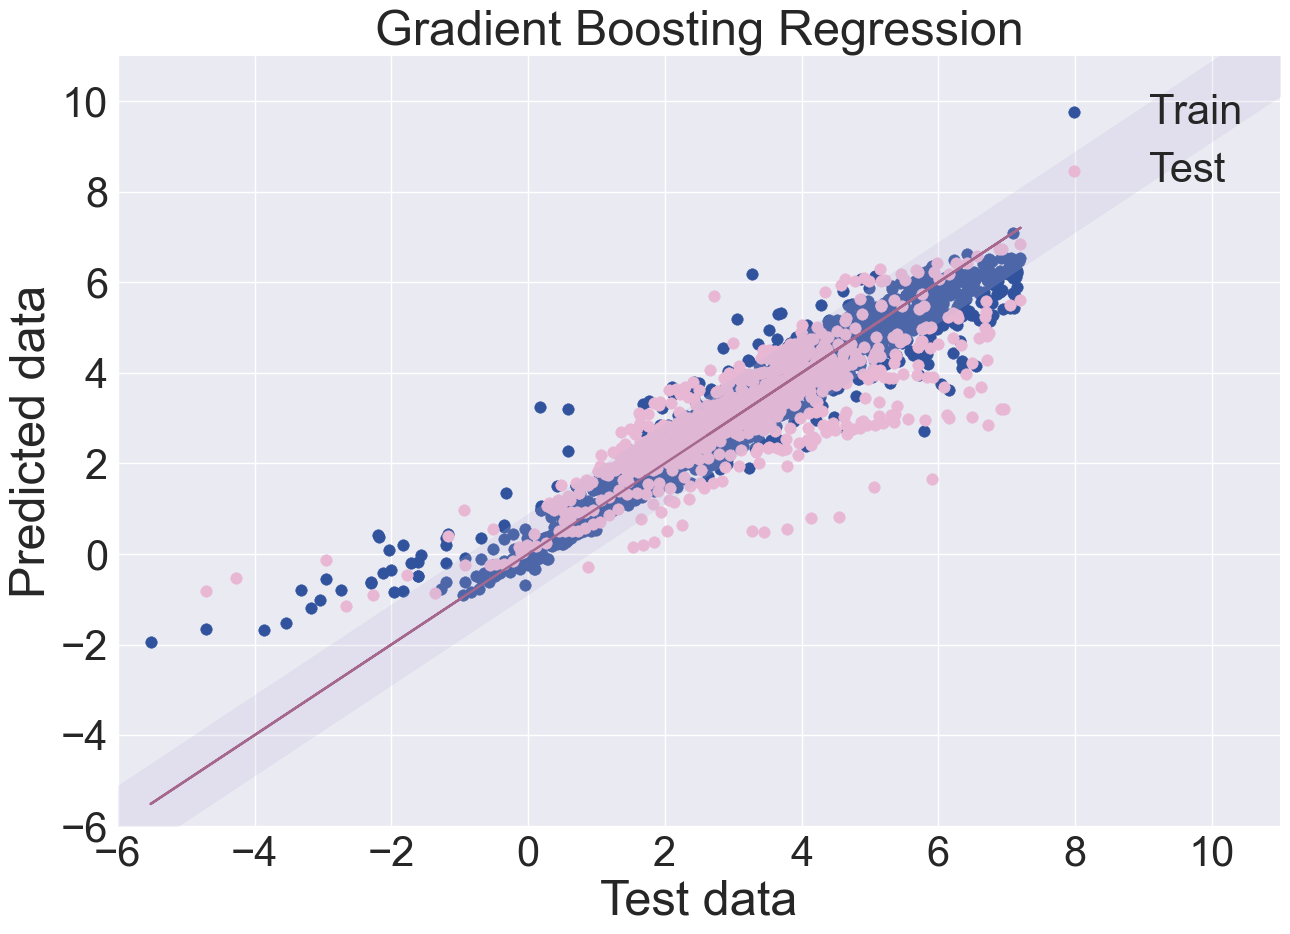

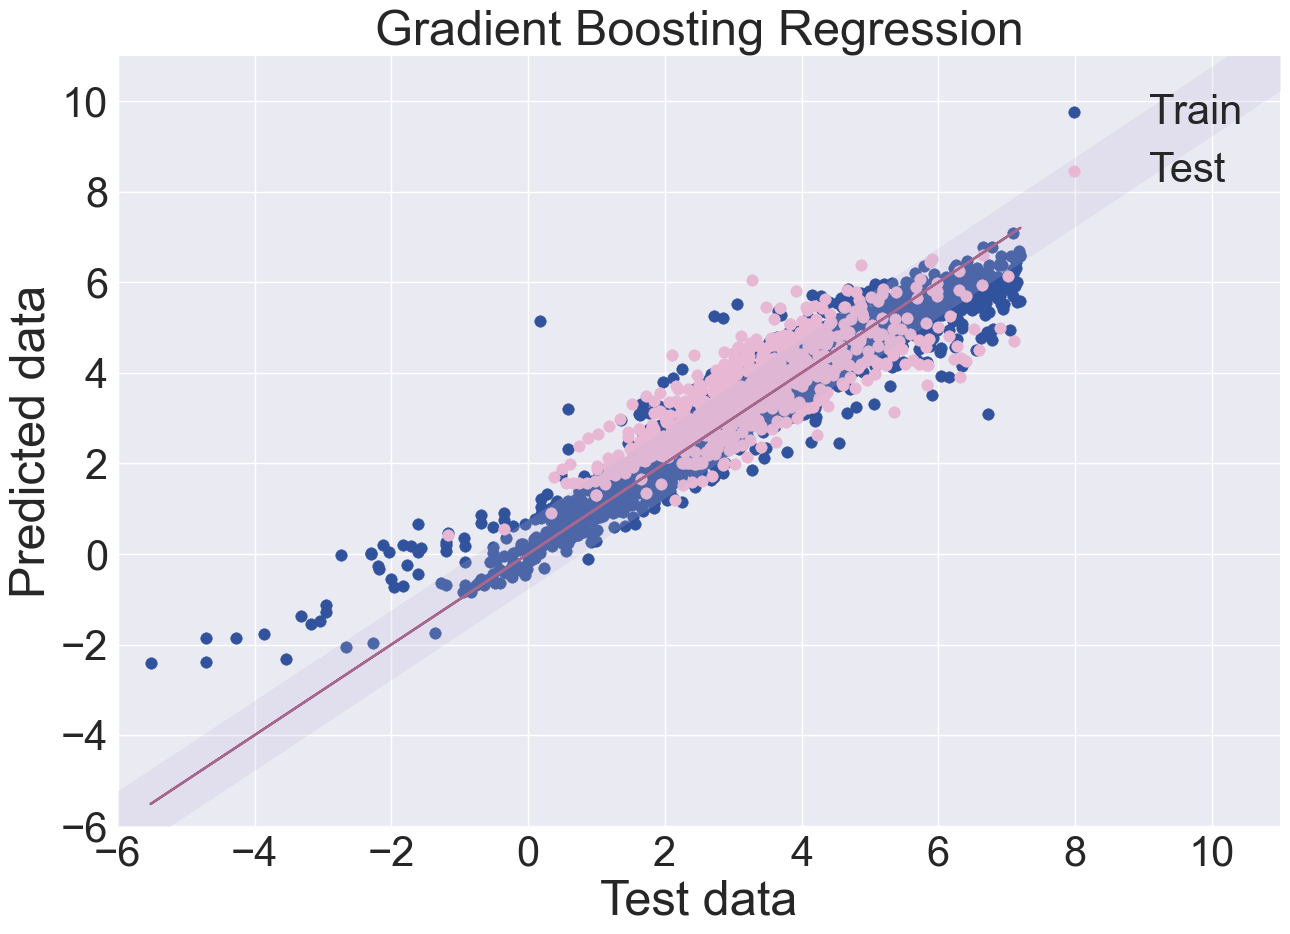

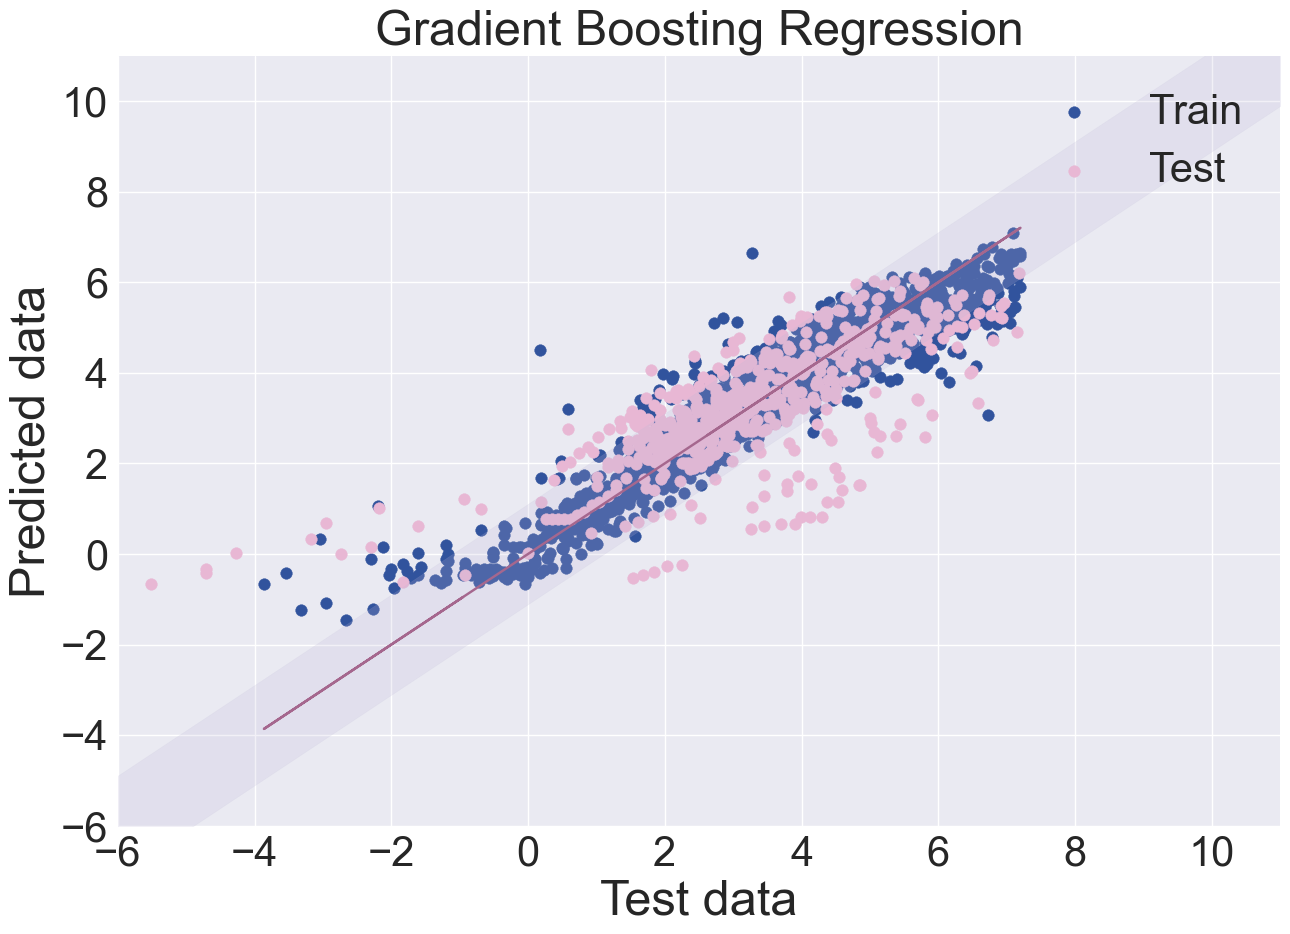

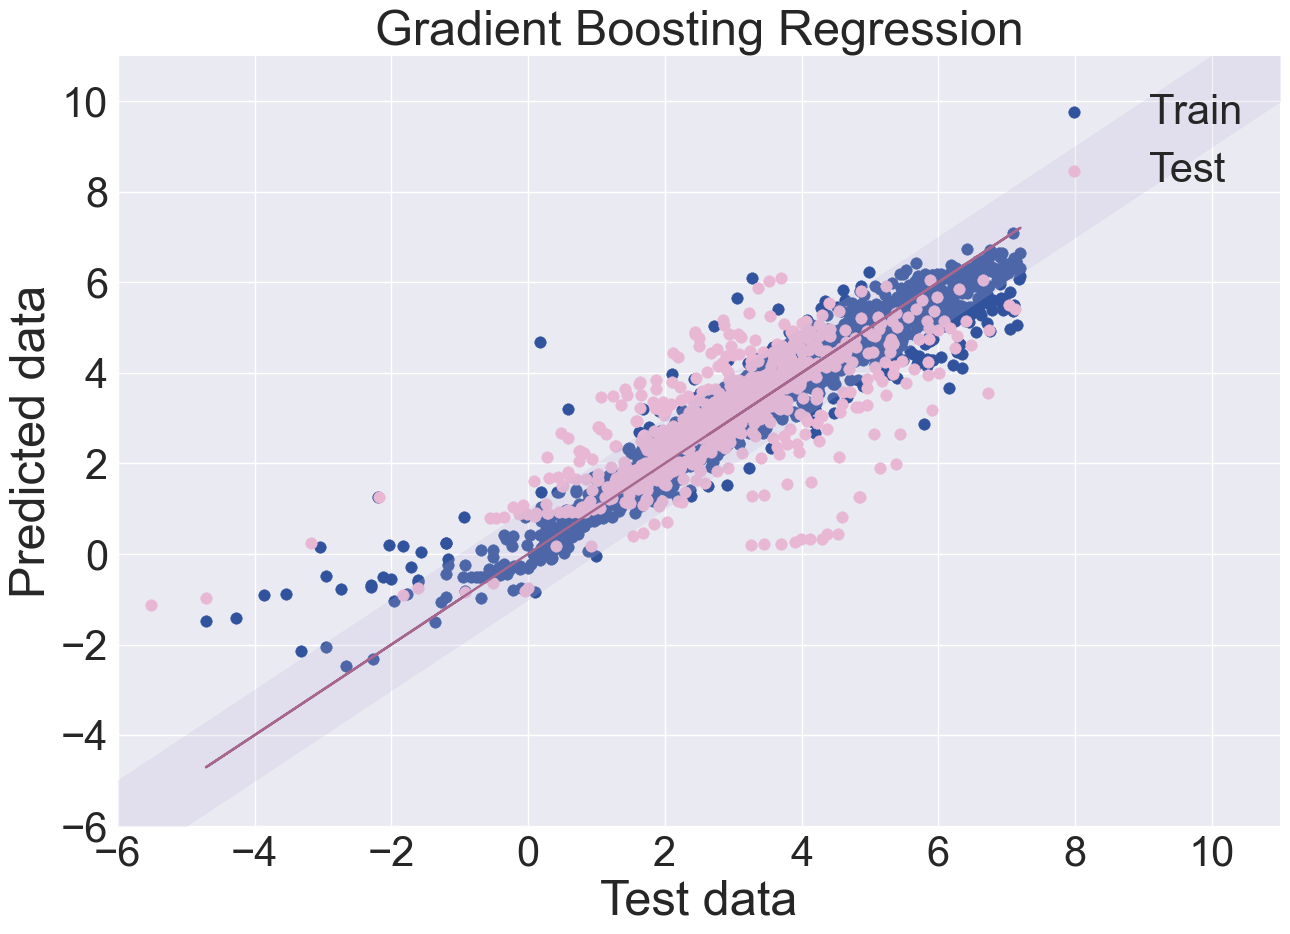

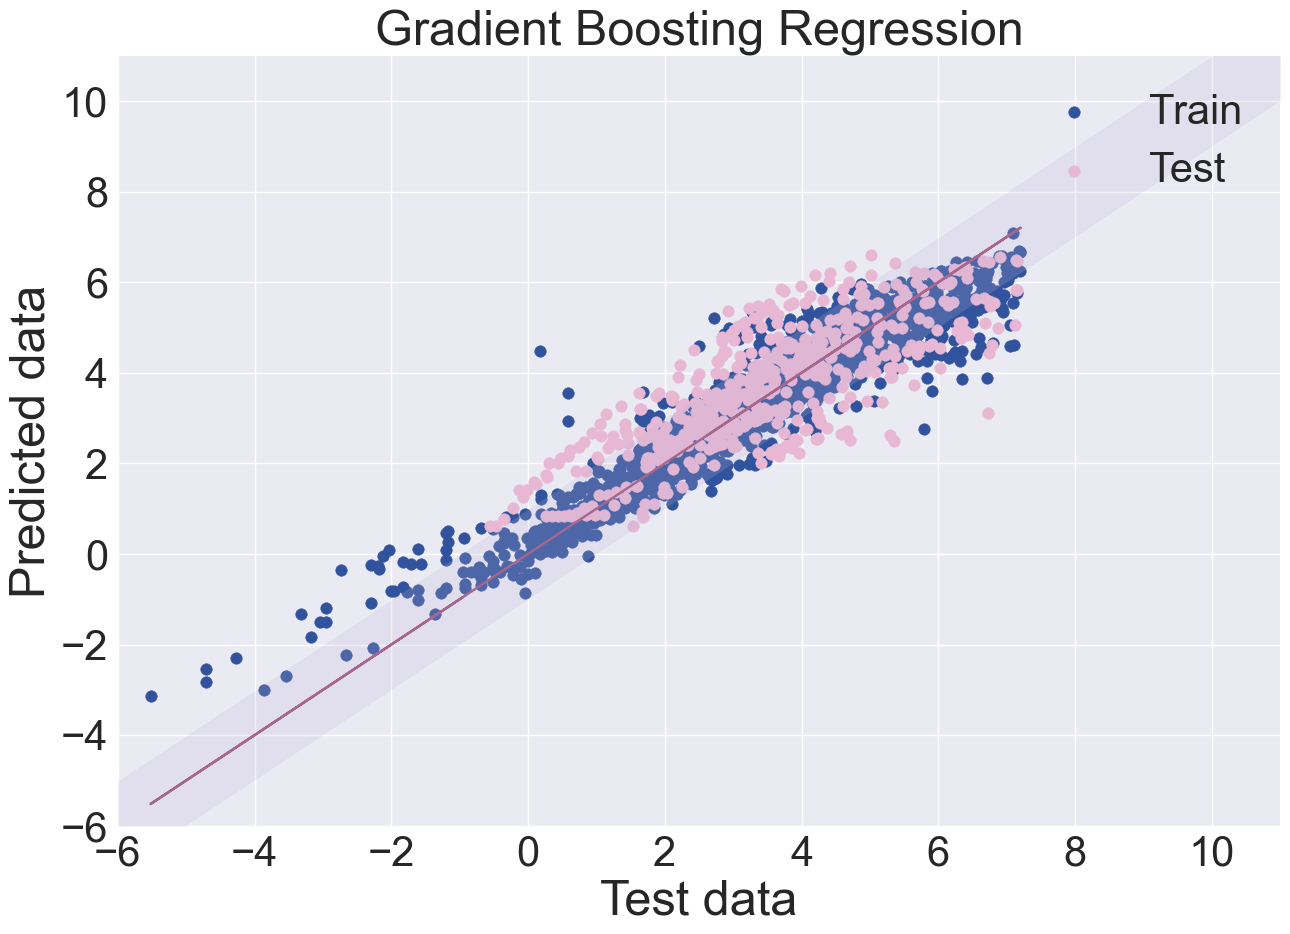

In [24]:
count = 0
#Creating a table to check accuracy on different DES classes
GBR_df = x_model[:]
GBR_df['Viscosity_lit'] = y_model

for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    
    #Scaling the data 
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #GBR
    regr_GBR = GradientBoostingRegressor(learning_rate = learning_rate, n_estimators = n_estimators, max_depth= max_depth, min_samples_leaf= min_samples_leaf, min_samples_split= min_samples_split)
    regr_GBR.fit(x_train_mod, y_train_mod, sample_weight=sample_w)
    y_pred = regr_GBR.predict(x_test_mod)
    y1_pred = regr_GBR.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    GBR_df['Viscosity_train' + str(count)] = None
    GBR_df['Viscosity_test' + str(count)] = None
    GBR_df['Viscosity_train' + str(count)].iloc[train_idx] = y1_pred
    GBR_df['Viscosity_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['Gradient Boosting Regression' + str(count)] = regr_metrics(regr_GBR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Gradient Boosting Regression', fontsize=35)
df_error_train

In [25]:
df_error_GBR = metrics_class(GBR_df, 'Gradient Boosting Regression')
df_error_GBR

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train    R2_test  \
0   Gradient Boosting Regression0         2     I  0.618580        NaN   
1   Gradient Boosting Regression0         2   III  0.854350    0.58555   
2   Gradient Boosting Regression0         2    IV  0.984637   0.863285   
3   Gradient Boosting Regression0         2     V  0.895310   0.758536   
4   Gradient Boosting Regression0         3  None  0.940175   0.412013   
5   Gradient Boosting Regression1         2     I  0.523251 -11.170412   
6   Gradient Boosting Regression1         2   III  0.840630   0.691931   
7   Gradient Boosting Regression1         2    IV  0.967928   0.114009   
8   Gradient Boosting Regression1         2     V  0.889421   0.594413   
9   Gradient Boosting Regression1         3  None  0.922300   0.056972   
10  Gradient Boosting Regression2         2     I  0.594466        NaN   
11  Gradient Boosting Regression2         2   III  0.840463    0.26841   
12  Gradient Boosting Regression2         2    IV  0.985390   0.383565   
13  Gradient Boosting Regression2         2     V  0.884974   0.545496   
14  Gradient Boosting Regression2         3  None  0.914429   0.231441   
15  Gradient Boosting Regression3         2     I -0.121027        NaN   
16  Gradient Boosting Regression3         2   III  0.865417   0.721345   
17  Gradient Boosting Regression3         2    IV  0.974469   0.407704   
18  Gradient Boosting Regression3         2     V  0.895131   0.389032   
19  Gradient Boosting Regression3         3  None  0.930879   0.416437   
20  Gradient Boosting Regression4         2     I  0.875925       None   
21  Gradient Boosting Regression4         2   III  0.827505   0.372802   
22  Gradient Boosting Regression4         2    IV  0.980709   0.282848   
23  Gradient Boosting Regression4         2     V  0.899585   0.658219   
24  Gradient Boosting Regression4         3  None  0.919374   0.531271   

    RMSE_train RMSE_test  
0     0.023581       NaN  
1     0.451365  0.830748  
2     0.116100  0.239489  
3     0.572816  0.836447  
4     0.453263  1.334685  
5     0.027043  0.122029  
6     0.499941  0.598658  
7     0.147735  0.606278  
8     0.628556  0.825304  
9     0.517045  1.281479  
10    0.021008  0.085385  
11    0.491583  1.053662  
12    0.117039  0.354343  
13    0.586384  1.223497  
14    0.543485  1.112448  
15    0.032066  0.076117  
16    0.439643  0.575528  
17    0.132594  0.516411  
18    0.556575  1.522102  
19    0.514367  1.116896  
20    0.013449      None  
21    0.500854  0.997663  
22    0.115258   0.56824  
23    0.572247  0.819123  
24    0.520742  1.273134

### 4.2. Car Boosting Regression
CatBoost is a gradient boosting library. She uses careless (oblivious) decision trees to grow a balanced tree. The same functions are used to create left and right splits at each level of the tree

In [27]:
#We optimize for CBR
regr_CBR = CatBoostRegressor()

search_space = {"iterations": Integer(100, 600), 
                "learning_rate": Real(0.05, 0.4),
                "depth": Integer(1, 6)}

#Scaling the data
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sample_weight = compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))

opt_CBR = BayesSearchCV(estimator = regr_CBR, search_spaces=search_space, cv=custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_CBR.fit(x_train01, y_model, sample_weight=sample_weight)

iterations = opt_CBR.best_params_['iterations']
learning_rate = opt_CBR.best_params_['learning_rate']
depth = opt_CBR.best_params_['depth']


print('iterations:', iterations,'learning_rate:', learning_rate, 'depth:', depth)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
0:	learn: 1.7054684	total: 148ms	remaining: 1m 28s
1:	learn: 1.6375003	total: 177ms	remaining: 52.9s
2:	learn: 1.5757084	total: 187ms	remaining: 37.3s
3:	learn: 1.5149387	total: 200ms	remaining: 29.7s
4:	learn: 1.4540080	total: 215ms	remaining: 25.6s
5:	learn: 1.3994044	total: 227ms	remaining: 22.5s
6:	learn: 1.3469483	total: 239ms	remaining: 20.2s
7:	learn: 1.3021371	total: 251ms	remaining: 18.6s
8:	learn: 1.2581690	total: 264ms	remaining: 17.3s
9:	learn: 1.2151769	total: 276ms	remaining: 16.3s
10:	learn: 1.1744608	total: 288ms	remaining: 15.4s
11:	learn: 1.1331875	total: 299ms	remaining: 14.7s
12:	learn: 1.1113747	total: 304ms	remaining: 13.7s
13:	learn: 1.0725162	total: 320ms	remaining: 13.4s
14:	learn: 1.0356101	total: 334ms	remaining: 13s
15:	learn: 1.0050881	total: 348ms	remaining: 12.7s
16:	learn: 0.9754908	total: 359ms	remaining: 12.3s
17:	learn: 0.9478881	total: 373ms	remaining: 12.1s
18:	learn: 0.9206272	total: 384ms	

0:	learn: 1.6504108	total: 13.9ms	remaining: 8.34s
1:	learn: 1.5874568	total: 24.3ms	remaining: 7.28s
2:	learn: 1.5269282	total: 37.6ms	remaining: 7.47s
3:	learn: 1.4680128	total: 48.4ms	remaining: 7.21s



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


4:	learn: 1.4284186	total: 64.2ms	remaining: 7.64s
5:	learn: 1.3753299	total: 73.9ms	remaining: 7.32s
6:	learn: 1.3242830	total: 84.5ms	remaining: 7.16s
7:	learn: 1.2821871	total: 93.8ms	remaining: 6.94s
8:	learn: 1.2406708	total: 109ms	remaining: 7.19s
9:	learn: 1.2090043	total: 125ms	remaining: 7.36s
10:	learn: 1.1707851	total: 135ms	remaining: 7.22s
11:	learn: 1.1306093	total: 155ms	remaining: 7.61s
12:	learn: 1.0889925	total: 172ms	remaining: 7.74s
13:	learn: 1.0522753	total: 198ms	remaining: 8.28s
14:	learn: 1.0205430	total: 209ms	remaining: 8.17s
15:	learn: 0.9894030	total: 219ms	remaining: 8s
16:	learn: 0.9567497	total: 228ms	remaining: 7.81s
17:	learn: 0.9256880	total: 270ms	remaining: 8.74s


18:	learn: 0.8963166	total: 281ms	remaining: 8.6s
19:	learn: 0.8689511	total: 308ms	remaining: 8.92s
20:	learn: 0.8427952	total: 314ms	remaining: 8.67s
21:	learn: 0.8181597	total: 319ms	remaining: 8.39s
22:	learn: 0.7965924	total: 325ms	remaining: 8.15s
23:	learn: 0.7739136	total: 330ms	remaining: 7.92s
24:	learn: 0.7537059	total: 336ms	remaining: 7.74s
25:	learn: 0.7368241	total: 343ms	remaining: 7.57s
26:	learn: 0.7185827	total: 350ms	remaining: 7.43s
27:	learn: 0.7039712	total: 355ms	remaining: 7.26s
28:	learn: 0.6877530	total: 361ms	remaining: 7.11s
29:	learn: 0.6780739	total: 367ms	remaining: 6.97s
30:	learn: 0.6655679	total: 372ms	remaining: 6.83s
31:	learn: 0.6541923	total: 396ms	remaining: 7.02s
32:	learn: 0.6463303	total: 402ms	remaining: 6.9s
33:	learn: 0.6375440	total: 407ms	remaining: 6.77s
34:	learn: 0.6259035	total: 412ms	remaining: 6.66s
35:	learn: 0.6141874	total: 420ms	remaining: 6.57s
36:	learn: 0.6038173	total: 425ms	remaining: 6.46s
37:	learn: 0.5943324	total: 431ms


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.6610134519779598
MAE_test: 0.6183212902453905
MSE_test: 0.7955353210545687
RMSE_test: 0.8919278676297588
r2_train: 0.9230104210197548
MAE_train: 0.30538922383280676
MSE_train: 0.21723903822032098
RMSE_train: 0.4660890882871224
0:	learn: 1.6149513	total: 8.63ms	remaining: 5.17s
1:	learn: 1.5536703	total: 13.7ms	remaining: 4.1s
2:	learn: 1.4933056	total: 21.4ms	remaining: 4.27s
3:	learn: 1.4373394	total: 27.7ms	remaining: 4.13s
4:	learn: 1.3836787	total: 32.4ms	remaining: 3.85s
5:	learn: 1.3335992	total: 37.9ms	remaining: 3.75s
6:	learn: 1.2869590	total: 43.3ms	remaining: 3.67s
7:	learn: 1.2383466	total: 49.1ms	remaining: 3.64s
8:	learn: 1.2109109	total: 55.3ms	remaining: 3.63s
9:	learn: 1.1711083	total: 59.7ms	remaining: 3.52s
10:	learn: 1.1326822	total: 65.8ms	remaining: 3.52s
11:	learn: 1.0939068	total: 70.7ms	remaining: 3.46s
12:	learn: 1.0669242	total: 75.3ms	remaining: 3.4s
13:	learn: 1.0389322	total: 79.9ms	remaining: 3.34s
14:	learn: 1.0089309	total: 90ms	remaining: 3.


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.6653376753339391
MAE_test: 0.522186069133046
MSE_test: 0.5004292573031692
RMSE_test: 0.7074102468180463
r2_train: 0.9318805192984844
MAE_train: 0.2953568421891603
MSE_train: 0.20775787273808555
RMSE_train: 0.4558046431730216
0:	learn: 1.5858941	total: 7.48ms	remaining: 4.48s
1:	learn: 1.5231670	total: 13.8ms	remaining: 4.11s
2:	learn: 1.4651445	total: 20.4ms	remaining: 4.06s
3:	learn: 1.4068980	total: 27.2ms	remaining: 4.05s
4:	learn: 1.3550296	total: 33.6ms	remaining: 4s
5:	learn: 1.3051298	total: 39.6ms	remaining: 3.92s
6:	learn: 1.2579561	total: 45.9ms	remaining: 3.89s
7:	learn: 1.2139009	total: 52.3ms	remaining: 3.87s
8:	learn: 1.1728369	total: 59.1ms	remaining: 3.88s
9:	learn: 1.1347830	total: 67.5ms	remaining: 3.98s
10:	learn: 1.0971456	total: 76.6ms	remaining: 4.1s
11:	learn: 1.0632360	total: 90.2ms	remaining: 4.42s
12:	learn: 1.0300797	total: 113ms	remaining: 5.11s
13:	learn: 1.0039902	total: 132ms	remaining: 5.54s
14:	learn: 0.9809915	total: 146ms	remaining: 5.68s
1


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.6474349295498147
MAE_test: 0.7089012343108236
MSE_test: 0.9960005126901602
RMSE_test: 0.9979982528492524
r2_train: 0.9182540981422037
MAE_train: 0.3068320398047309
MSE_train: 0.21760736548149767
RMSE_train: 0.46648404633116625
0:	learn: 1.5762381	total: 10.2ms	remaining: 6.12s
1:	learn: 1.5143567	total: 17.3ms	remaining: 5.18s
2:	learn: 1.4569144	total: 25.7ms	remaining: 5.11s
3:	learn: 1.4021140	total: 32.5ms	remaining: 4.84s
4:	learn: 1.3474844	total: 39.3ms	remaining: 4.68s
5:	learn: 1.3011738	total: 46ms	remaining: 4.55s
6:	learn: 1.2538490	total: 52.7ms	remaining: 4.46s
7:	learn: 1.2178502	total: 62ms	remaining: 4.59s
8:	learn: 1.1805270	total: 68.6ms	remaining: 4.5s
9:	learn: 1.1421202	total: 104ms	remaining: 6.15s
10:	learn: 1.1049130	total: 130ms	remaining: 6.96s
11:	learn: 1.0722667	total: 136ms	remaining: 6.67s
12:	learn: 1.0411844	total: 139ms	remaining: 6.29s
13:	learn: 1.0114993	total: 145ms	remaining: 6.08s
14:	learn: 0.9788775	total: 152ms	remaining: 5.91s
15:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.573505577873035
MAE_test: 0.6474379365203061
MSE_test: 0.8894052101761386
RMSE_test: 0.9430828225432476
r2_train: 0.928828849227565
MAE_train: 0.2940561677464873
MSE_train: 0.2022062180751773
RMSE_train: 0.4496734571610574
0:	learn: 1.8500876	total: 6.53ms	remaining: 3.91s
1:	learn: 1.7791317	total: 12.4ms	remaining: 3.72s
2:	learn: 1.7133013	total: 18.2ms	remaining: 3.62s
3:	learn: 1.6484482	total: 23.3ms	remaining: 3.48s
4:	learn: 1.5833600	total: 30.2ms	remaining: 3.59s
5:	learn: 1.5291676	total: 36ms	remaining: 3.56s
6:	learn: 1.4731274	total: 43ms	remaining: 3.64s
7:	learn: 1.4296970	total: 58.2ms	remaining: 4.31s
8:	learn: 1.3815855	total: 64.4ms	remaining: 4.23s
9:	learn: 1.3289432	total: 70.9ms	remaining: 4.18s
10:	learn: 1.2816090	total: 80.1ms	remaining: 4.29s
11:	learn: 1.2353103	total: 88.2ms	remaining: 4.32s
12:	learn: 1.1963710	total: 96ms	remaining: 4.33s
13:	learn: 1.1578870	total: 103ms	remaining: 4.32s
14:	learn: 1.1242231	total: 116ms	remaining: 4.52s
15:	


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.469935            0.539101            0.490642   
1            0.513731            0.073678            0.415830   
2            1.222975            1.185621            1.164436   
3            1.068260            1.176925            1.284635   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.490705            0.519521                   0.752420   
1            0.456478            0.300740                   0.366048   
2            1.202902            1.141472                   0.835816   
3            1.064638            1.332138                   1.219738   

   Decision Tree Regression1  Decision Tree Regression2  \
0                   0.762512                   0.747004   
1                  -0.277702                   0.246539   
2                   0.851067                   0.820655   
3                   1.382238                   1.458950   

   Decision Tree Regression3  Decision Tree Regression4  ...  \
0                   0.806815                   0.638935  ...   
1                   0.105039                   0.229417  ...   
2                   0.740852                   0.989510  ...   
3                   1.366140                   1.398425  ...   

   Gradient Boosting Regression0  Gradient Boosting Regression1  \
0                       0.912968                       0.903702   
1                       0.665048                       0.614216   
2                       0.495556                       0.541939   
3                       0.886605                       0.759521   

   Gradient Boosting Regression2  Gradient Boosting Regression3  \
0                       0.894534                       0.913099   
1                       0.566125                       0.514474   
2                       0.529859                       0.496887   
3                       1.107114                       1.006235   

   Gradient Boosting Regression4  Cat Boosting Regression0  \
0                       0.898968                  0.923010   
1                       0.622634                  0.661013   
2                       0.523429                  0.466089   
3                       0.978613                  0.891928   

   Cat Boosting Regression1  Cat Boosting Regression2  \
0                  0.931881                  0.918254   
1                  0.665338                  0.647435   
2                  0.455805                  0.466484   
3                  0.707410                  0.997998   

   Cat Boosting Regression3  Cat Boosting Regression4  
0                  0.928829                  0.935277  
1                  0.573506                  0.688812  
2                  0.449673                  0.418945  
3                  0.943083                  0.888671  

[4 rows x 25 columns]

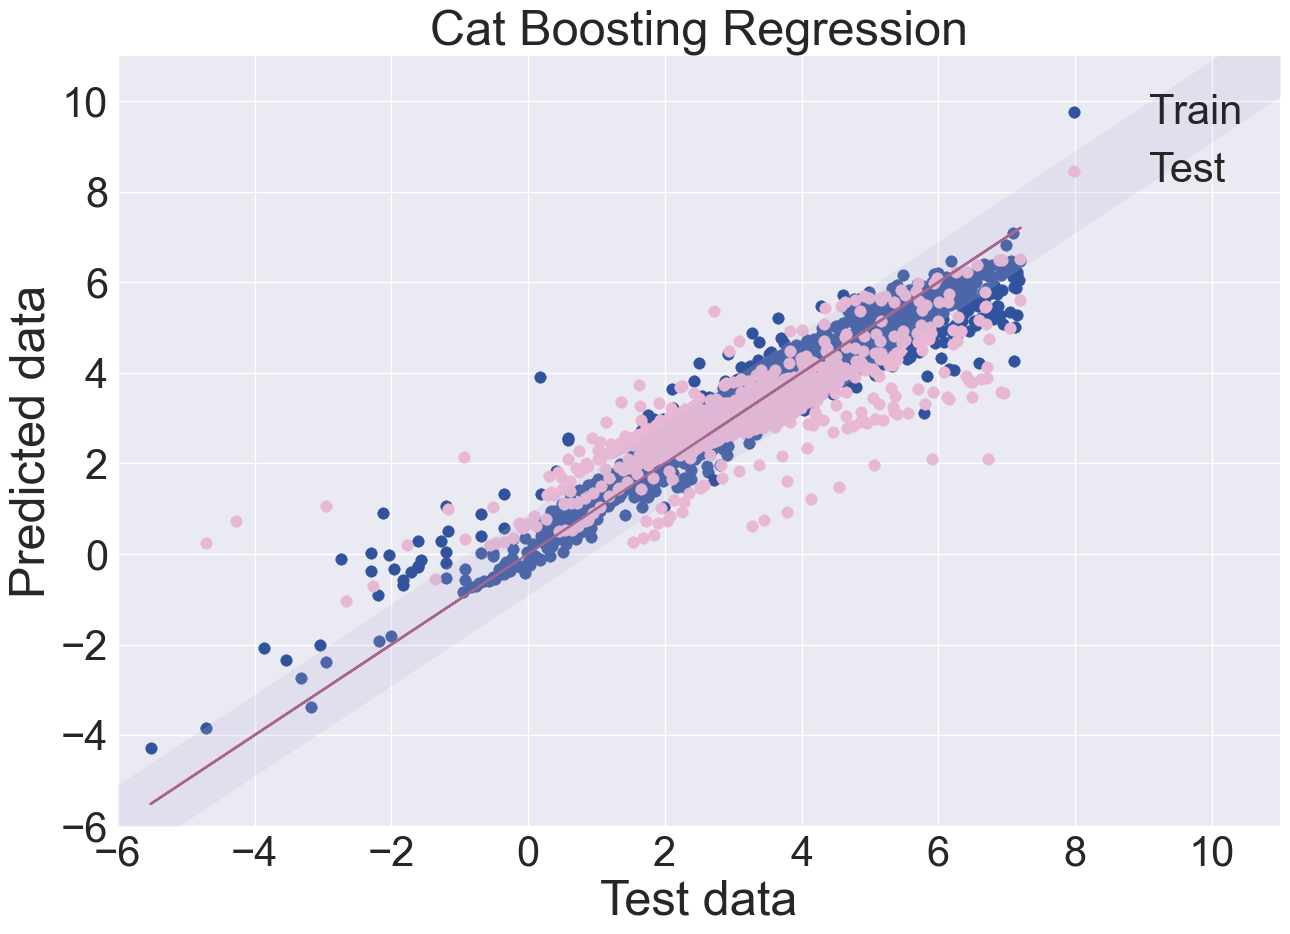

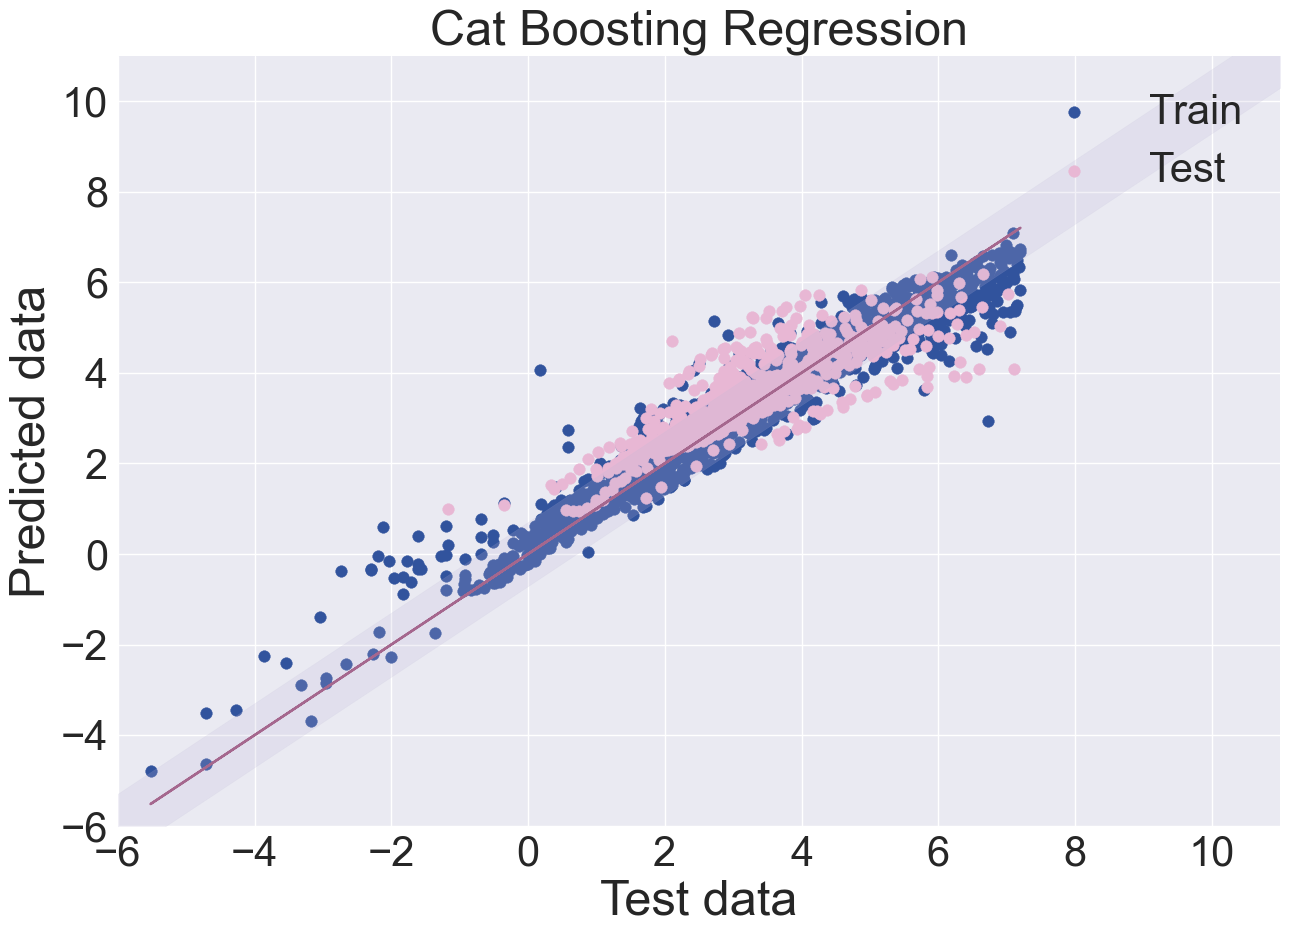

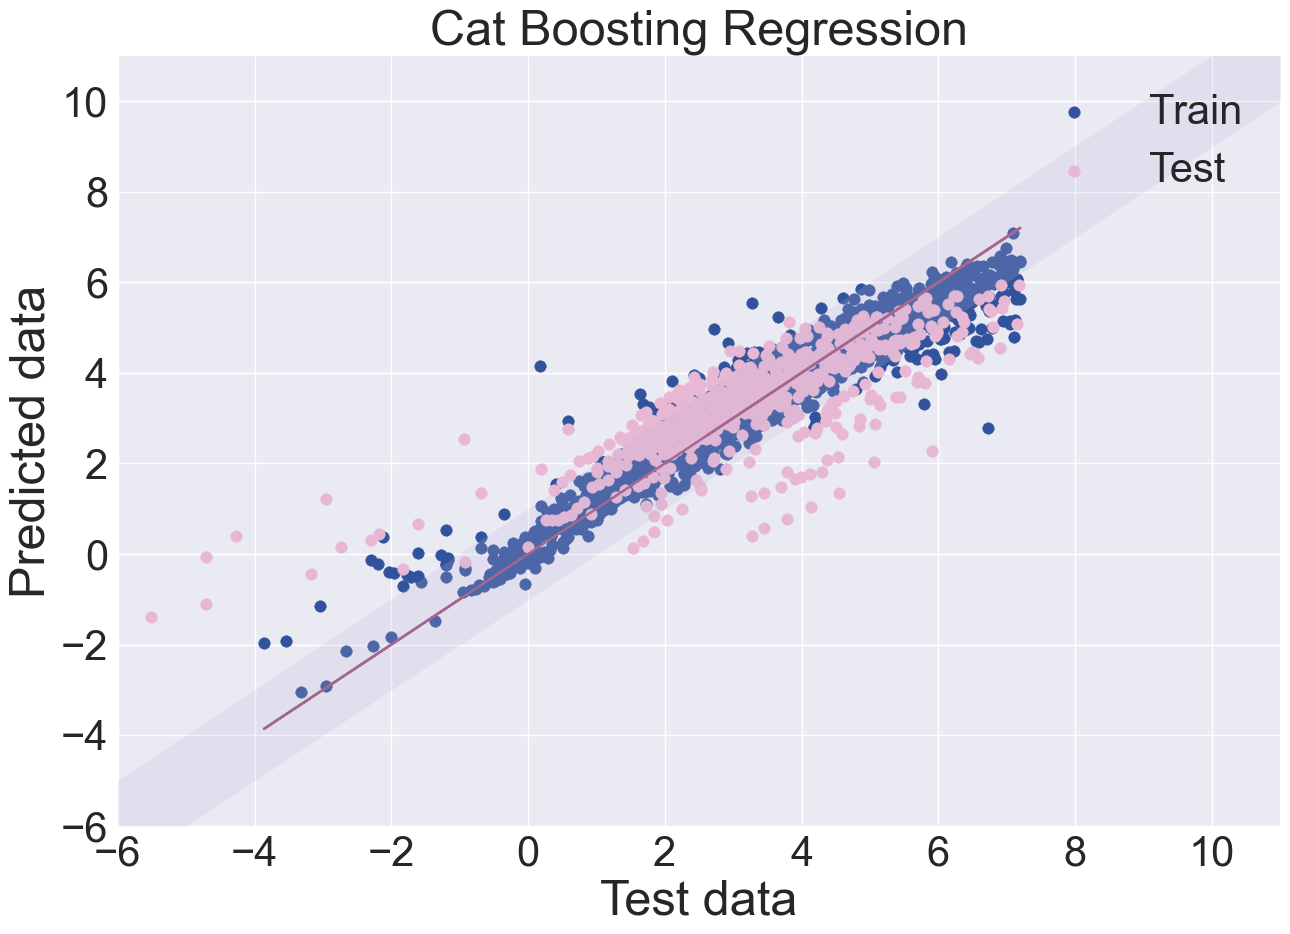

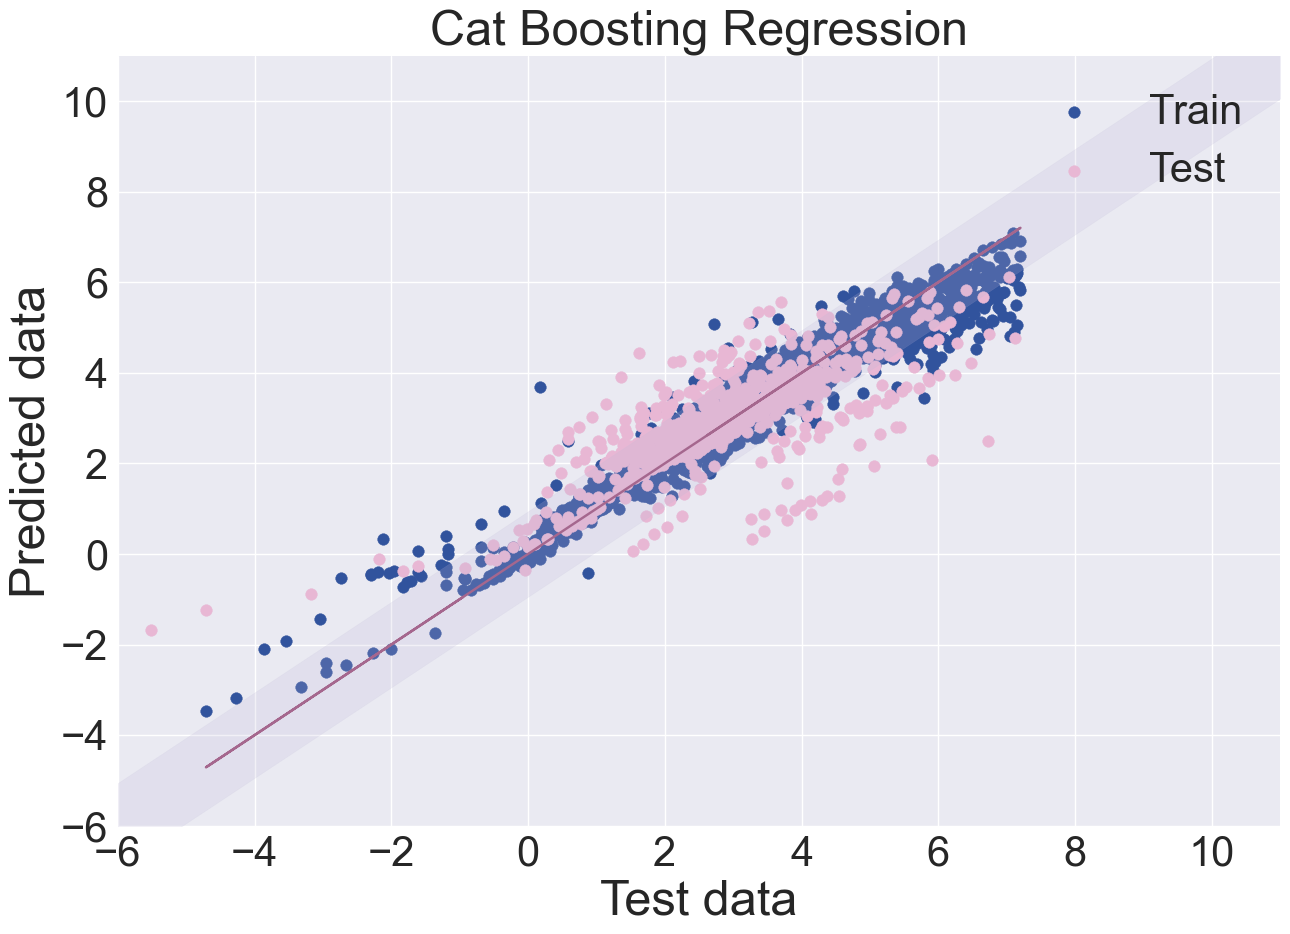

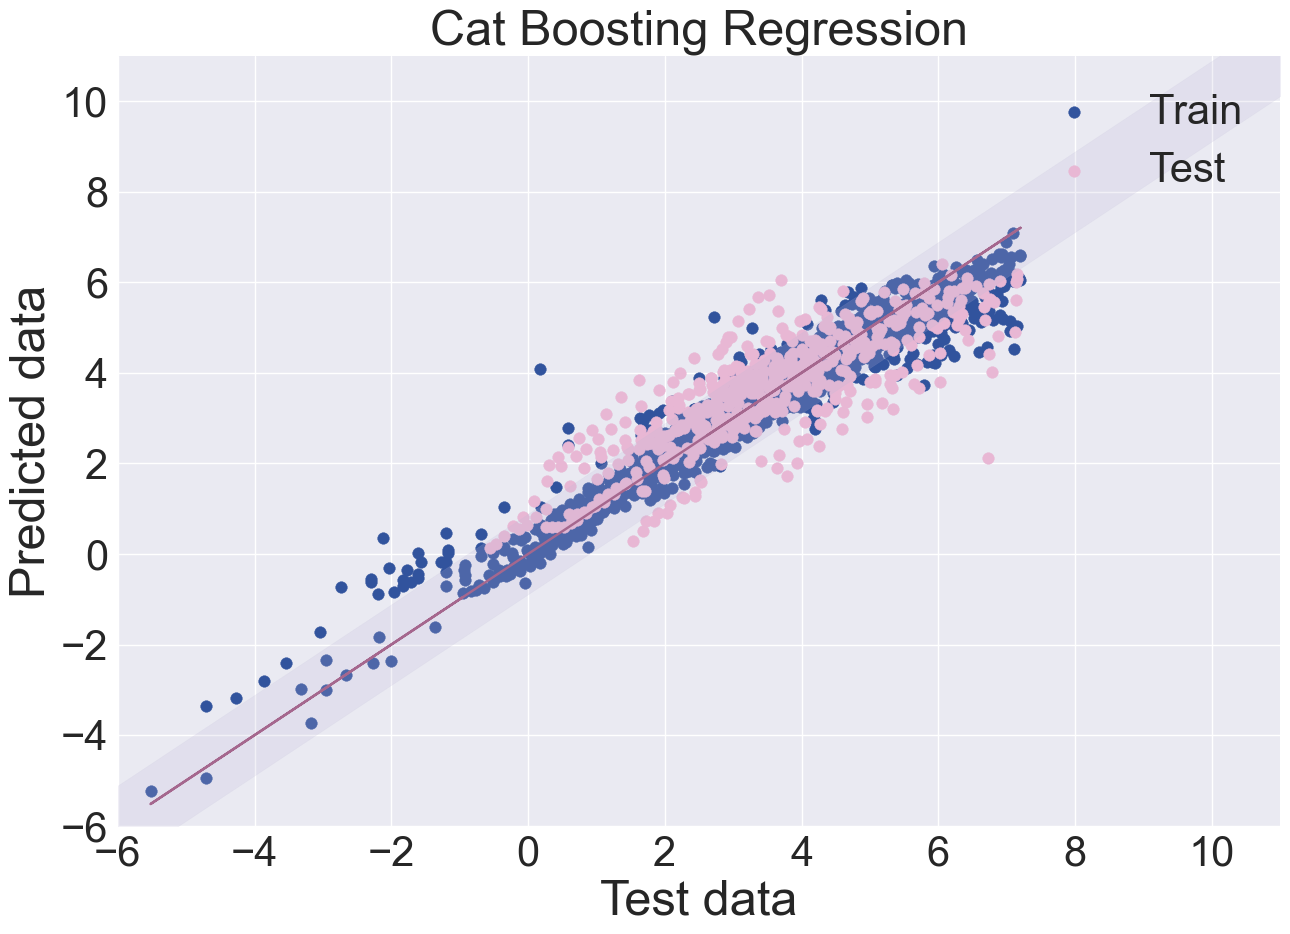

In [28]:
count = 0
#Creating a table to check accuracy on different DES classes
CBR_df = x_model[:]
CBR_df['Viscosity_lit'] = y_model
for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    
    #Scaling the data 
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #CBR
    regr_CBR = CatBoostRegressor(iterations = iterations, learning_rate = learning_rate, depth = depth)
    regr_CBR.fit(x_train_mod, y_train_mod, sample_weight=sample_w)
    y_pred = regr_CBR.predict(x_test_mod)
    y1_pred = regr_CBR.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    CBR_df['Viscosity_train' + str(count)] = None
    CBR_df['Viscosity_test' + str(count)] = None
    CBR_df['Viscosity_train' + str(count)].iloc[train_idx] = y1_pred
    CBR_df['Viscosity_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['Cat Boosting Regression' + str(count)] = regr_metrics(regr_CBR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Cat Boosting Regression', fontsize=35)
df_error_train

In [29]:
df_error_CBR = metrics_class(CBR_df, 'Cat Boosting Regression')
df_error_CBR

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train    R2_test  RMSE_train  \
0   Cat Boosting Regression0         2     I  0.904297        NaN    0.011812   
1   Cat Boosting Regression0         2   III  0.845511   0.623736    0.464858   
2   Cat Boosting Regression0         2    IV  0.991827   0.875589    0.084683   
3   Cat Boosting Regression0         2     V  0.916734   0.705816    0.510853   
4   Cat Boosting Regression0         3  None  0.948561   0.421327    0.420295   
5   Cat Boosting Regression1         2     I  0.857922 -82.924314    0.014763   
6   Cat Boosting Regression1         2   III  0.875705   0.601364    0.441511   
7   Cat Boosting Regression1         2    IV  0.988619   0.963392    0.088004   
8   Cat Boosting Regression1         2     V  0.925923   0.714301    0.514456   
9   Cat Boosting Regression1         3  None  0.946328   0.361532    0.429728   
10  Cat Boosting Regression2         2     I  0.839879        NaN    0.013201   
11  Cat Boosting Regression2         2   III  0.861213   0.527613    0.458501   
12  Cat Boosting Regression2         2    IV  0.991898   0.474784    0.087158   
13  Cat Boosting Regression2         2     V  0.917456   0.628224    0.496739   
14  Cat Boosting Regression2         3  None  0.937535    0.18899    0.464349   
15  Cat Boosting Regression3         2     I  0.525885        NaN    0.020853   
16  Cat Boosting Regression3         2   III  0.858157   0.779773    0.451344   
17  Cat Boosting Regression3         2    IV  0.985749   0.463239    0.099064   
18  Cat Boosting Regression3         2     V  0.920738   0.513624    0.483873   
19  Cat Boosting Regression3         3  None  0.955596   0.408599    0.412264   
20  Cat Boosting Regression4         2     I  0.918122       None    0.010926   
21  Cat Boosting Regression4         2   III  0.881683   0.529067    0.414807   
22  Cat Boosting Regression4         2    IV  0.988349   0.286482    0.089572   
23  Cat Boosting Regression4         2     V  0.936378    0.75159    0.455501   
24  Cat Boosting Regression4         3  None  0.953263   0.546479    0.396474   

   RMSE_test  
0        NaN  
1   0.791552  
2   0.228459  
3   0.923256  
4   1.324072  
5   0.320446  
6   0.680994  
7   0.123239  
8    0.69267  
9   1.054432  
10  0.499068  
11  0.846675  
12  0.327077  
13   1.10656  
14  1.142758  
15  0.126653  
16  0.511645  
17  0.491606  
18  1.358065  
19  1.124371  
20      None  
21  0.864492  
22  0.566799  
23  0.698329  
24  1.252309

### 4.3. Extreme Gradient Boosting (XGBoost)
The XGBoost library is a computationally efficient implementation of gradient boosting over decision trees. In addition to the optimized program code, the authors propose various improvements to the algorithm.

In [30]:
#We optimize for XGB
regr_XGB = XGBRegressor()

search_space = {"n_estimators": Integer(50, 350),
    "max_depth": Integer(2, 30),
    "subsample": Real(0.05, 1.0),
    "colsample_bytree": Real(0.05, 1.0)}

#Scaling the data
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sample_weight=compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))
opt_XGB = BayesSearchCV(estimator = regr_XGB, search_spaces=search_space, cv = custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_XGB.fit(x_train01, y_model, sample_weight=sample_weight)

n_estimators = opt_XGB.best_estimator_.n_estimators
max_depth = opt_XGB.best_estimator_.max_depth
subsample = opt_XGB.best_estimator_.subsample
colsample_bytree = opt_XGB.best_estimator_.colsample_bytree

print('n_estimators:', n_estimators,'max_depth:', max_depth, 'subsample:', subsample,'colsample_bytree:', colsample_bytree)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.6776938582291911
MAE_test: 0.6024112836490073
MSE_test: 0.7563896604971733
RMSE_test: 0.8697066519793748
r2_train: 0.998342420312274
MAE_train: 0.03930541386808755
MSE_train: 0.00467713971039551
RMSE_train: 0.06838961697798511



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.7224962757665225
MAE_test: 0.483315134583932
MSE_test: 0.4149585190253892
RMSE_test: 0.6441727400514471
r2_train: 0.9987179601357171
MAE_train: 0.03537655312263106
MSE_train: 0.0039100984362450955
RMSE_train: 0.06253077991073752



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.6379660860553684
MAE_test: 0.6394328292601239
MSE_test: 1.0227501080570784
RMSE_test: 1.0113110837210668
r2_train: 0.9980993373299346
MAE_train: 0.039431910889039766
MSE_train: 0.005059558790133046
RMSE_train: 0.07113057563476516



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.5796323625876387
MAE_test: 0.6495011480453794
MSE_test: 0.8766285032273808
RMSE_test: 0.9362844136411653
r2_train: 0.9984914419643042
MAE_train: 0.038600333229987335
MSE_train: 0.004286003694394521
RMSE_train: 0.0654675774287893
r2_test: 0.5770439419327733
MAE_test: 0.7733112336120475
MSE_test: 1.0733823688250281
RMSE_test: 1.0360416829573162
r2_train: 0.9982305418449027
MAE_train: 0.04104736738750119
MSE_train: 0.004798391094062083
RMSE_train: 0.06927042005114509



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.469935            0.539101            0.490642   
1            0.513731            0.073678            0.415830   
2            1.222975            1.185621            1.164436   
3            1.068260            1.176925            1.284635   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.490705            0.519521                   0.752420   
1            0.456478            0.300740                   0.366048   
2            1.202902            1.141472                   0.835816   
3            1.064638            1.332138                   1.219738   

   Decision Tree Regression1  Decision Tree Regression2  \
0                   0.762512                   0.747004   
1                  -0.277702                   0.246539   
2                   0.851067                   0.820655   
3                   1.382238                   1.458950   

   Decision Tree Regression3  Decision Tree Regression4  ...  \
0                   0.806815                   0.638935  ...   
1                   0.105039                   0.229417  ...   
2                   0.740852                   0.989510  ...   
3                   1.366140                   1.398425  ...   

   Cat Boosting Regression0  Cat Boosting Regression1  \
0                  0.923010                  0.931881   
1                  0.661013                  0.665338   
2                  0.466089                  0.455805   
3                  0.891928                  0.707410   

   Cat Boosting Regression2  Cat Boosting Regression3  \
0                  0.918254                  0.928829   
1                  0.647435                  0.573506   
2                  0.466484                  0.449673   
3                  0.997998                  0.943083   

   Cat Boosting Regression4  XGBoosting Regression0  XGBoosting Regression1  \
0                  0.935277                0.998342                0.998718   
1                  0.688812                0.677694                0.722496   
2                  0.418945                0.068390                0.062531   
3                  0.888671                0.869707                0.644173   

   XGBoosting Regression2  XGBoosting Regression3  XGBoosting Regression4  
0                0.998099                0.998491                0.998231  
1                0.637966                0.579632                0.577044  
2                0.071131                0.065468                0.069270  
3                1.011311                0.936284                1.036042  

[4 rows x 30 columns]

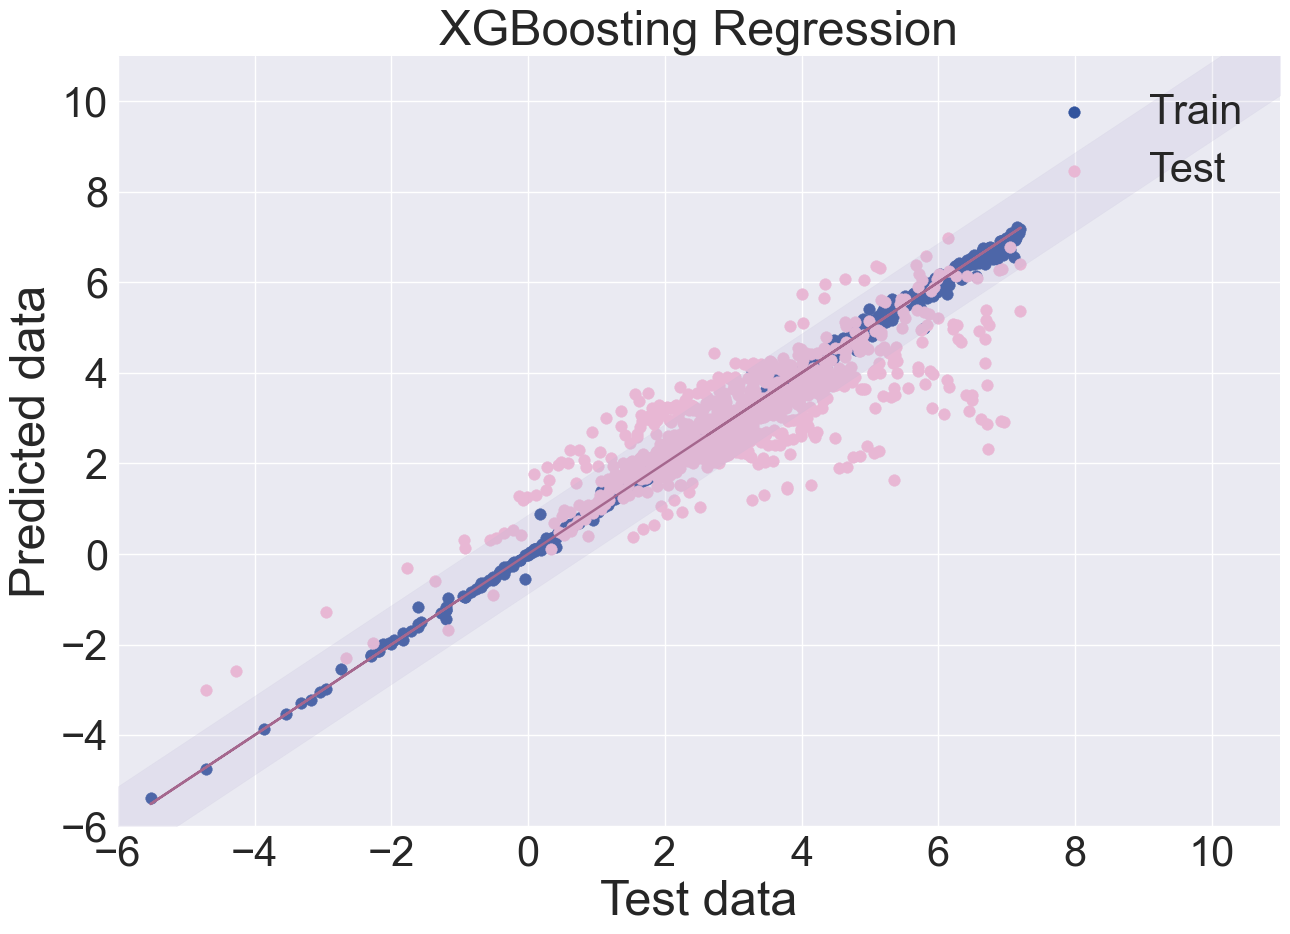

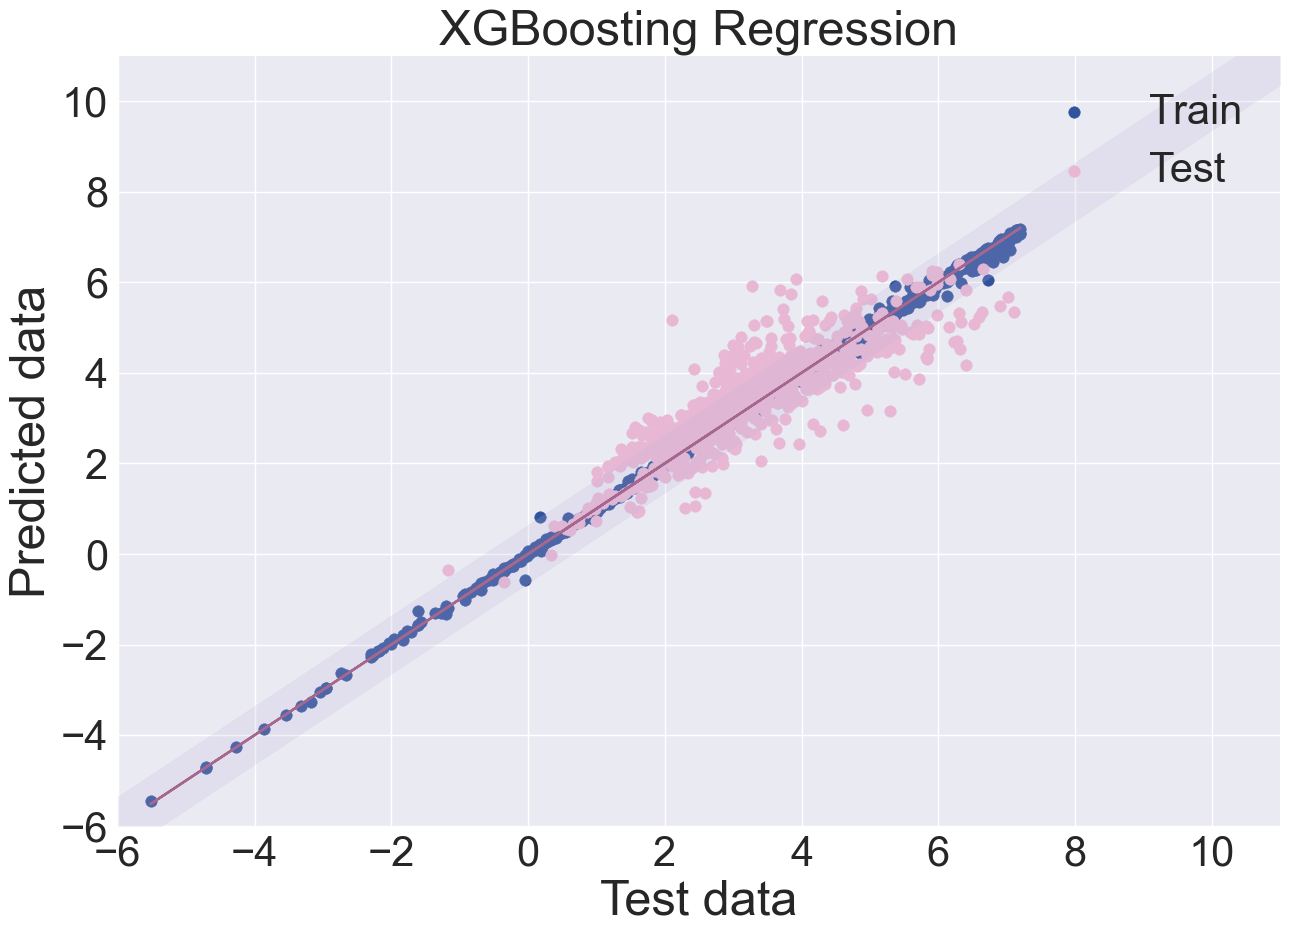

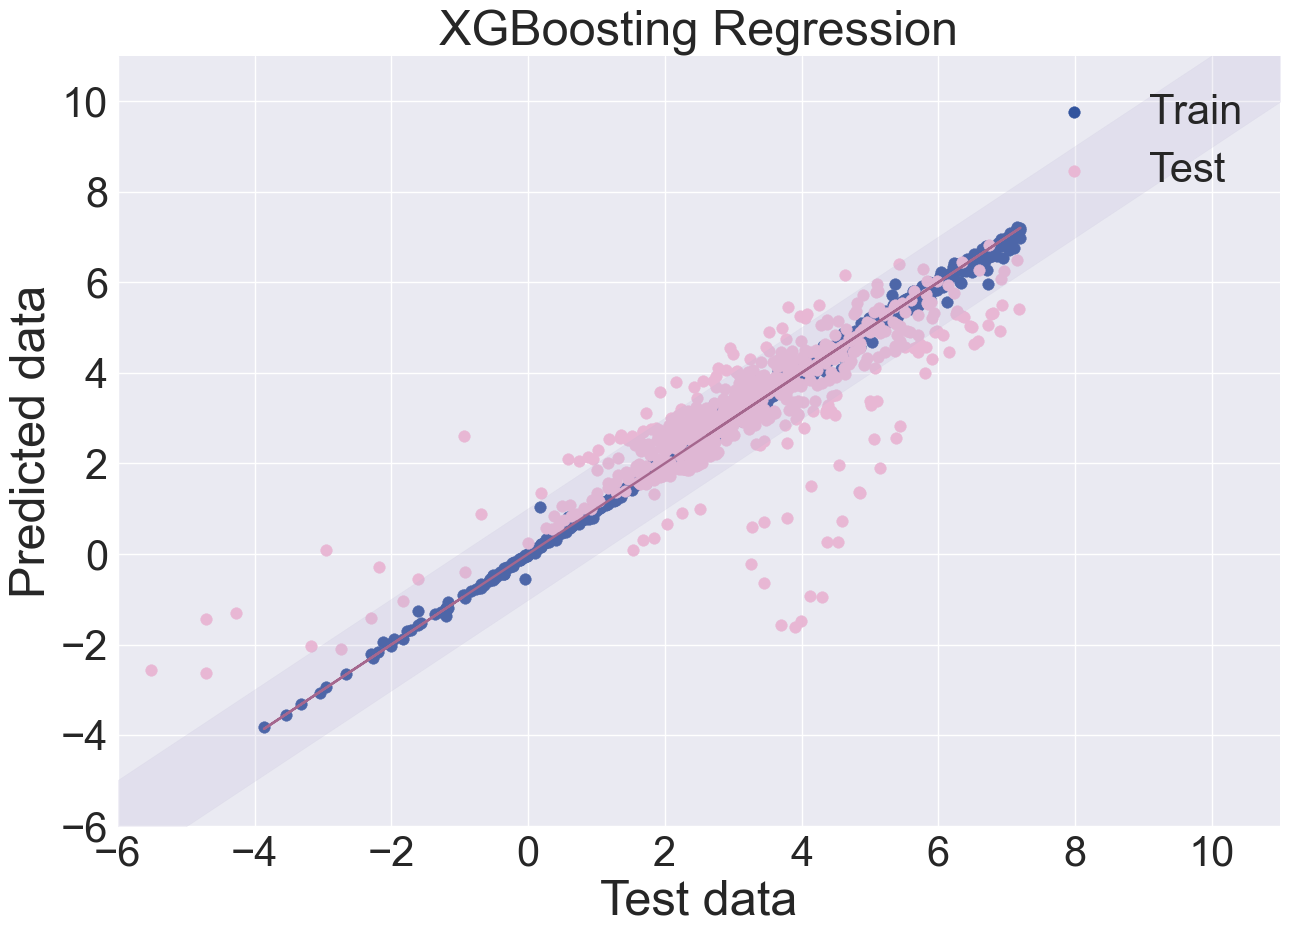

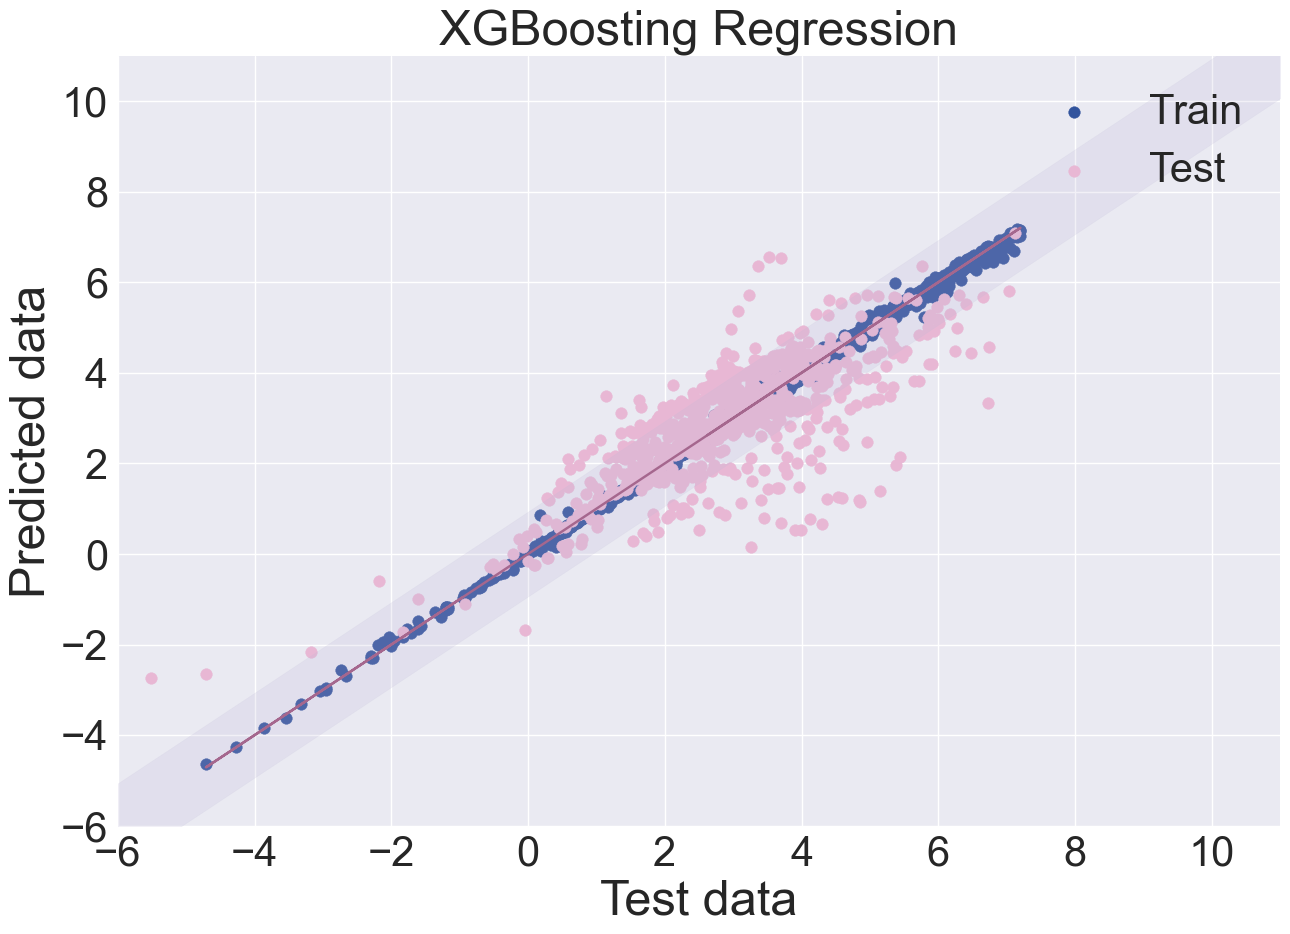

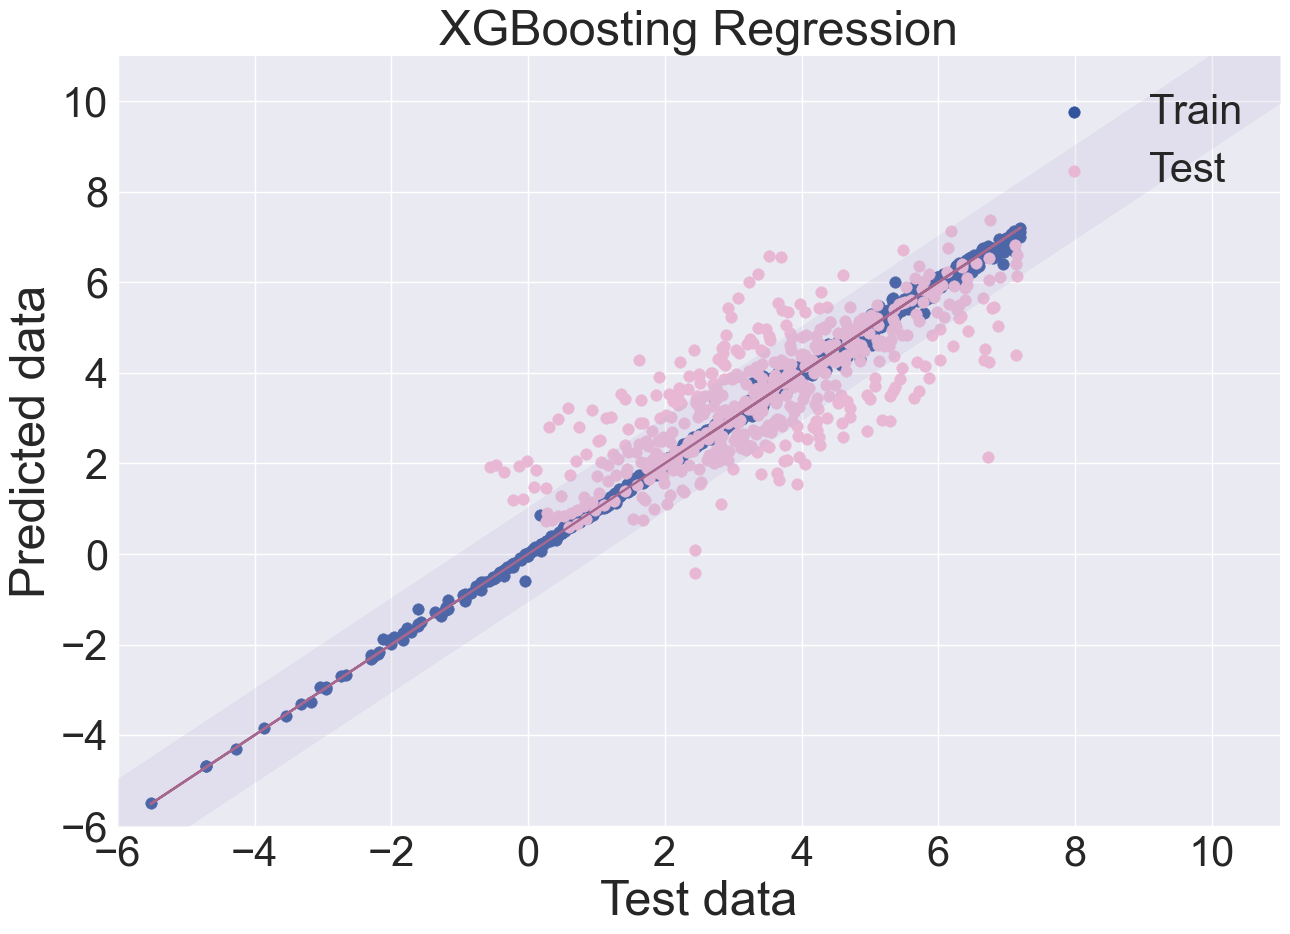

In [31]:
count = 0
#Creating a table to check accuracy on different DES classes
XGB_df = x_model[:]
XGB_df['Viscosity_lit'] = y_model

for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    
    #Scaling the data 
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #XGB
    regr_XGB = XGBRegressor(n_estimators = n_estimators, max_depth = max_depth, subsample = subsample, colsample_bytree = colsample_bytree)
    regr_XGB.fit(x_train_mod, y_train_mod, sample_weight=sample_w)
    y_pred = regr_XGB.predict(x_test_mod)
    y1_pred = regr_XGB.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    XGB_df['Viscosity_train' + str(count)] = None
    XGB_df['Viscosity_test' + str(count)] = None
    XGB_df['Viscosity_train' + str(count)].iloc[train_idx] = y1_pred
    XGB_df['Viscosity_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['XGBoosting Regression' + str(count)] = regr_metrics(regr_XGB, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('XGBoosting Regression', fontsize=35)
df_error_train

In [32]:
df_error_XGB = metrics_class(XGB_df, 'XGBoosting Regression')
df_error_XGB

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train    R2_test  RMSE_train  \
0   XGBoosting Regression0         2     I  0.999674        NaN    0.000690   
1   XGBoosting Regression0         2   III  0.997288   0.543617    0.061588   
2   XGBoosting Regression0         2    IV  0.999964  -0.056029    0.005616   
3   XGBoosting Regression0         2     V  0.998609   0.861848    0.066037   
4   XGBoosting Regression0         3  None  0.998001   0.423184    0.082852   
5   XGBoosting Regression1         2     I  0.999980 -35.482619    0.000176   
6   XGBoosting Regression1         2   III  0.996651   0.659953    0.072468   
7   XGBoosting Regression1         2    IV  0.999950   0.757296    0.005822   
8   XGBoosting Regression1         2     V  0.999170   0.796515    0.054444   
9   XGBoosting Regression1         3  None  0.998858   0.344965    0.062682   
10  XGBoosting Regression2         2     I  0.999940        NaN    0.000255   
11  XGBoosting Regression2         2   III  0.995791   0.604451    0.079846   
12  XGBoosting Regression2         2    IV  0.999984   0.188715    0.003915   
13  XGBoosting Regression2         2     V  0.999152   0.555814    0.050360   
14  XGBoosting Regression2         3  None  0.998034   0.446336    0.082371   
15  XGBoosting Regression3         2     I  0.999659        NaN    0.000559   
16  XGBoosting Regression3         2   III  0.996449   0.630476    0.071418   
17  XGBoosting Regression3         2    IV  0.999911    0.97376    0.007848   
18  XGBoosting Regression3         2     V  0.998907   0.489586    0.056818   
19  XGBoosting Regression3         3  None  0.998497   0.559769    0.075849   
20  XGBoosting Regression4         2     I  0.999988       None    0.000132   
21  XGBoosting Regression4         2   III  0.995355    0.44112    0.082191   
22  XGBoosting Regression4         2    IV  0.999976   0.964027    0.004091   
23  XGBoosting Regression4         2     V  0.999102   0.609154    0.054121   
24  XGBoosting Regression4         3  None  0.998504   0.330311    0.070926   

   RMSE_test  
0        NaN  
1   0.871762  
2   0.665605  
3    0.63269  
4   1.321946  
5   0.211278  
6   0.628962  
7   0.317318  
8   0.584573  
9   1.068025  
10  0.113864  
11  0.774761  
12  0.406507  
13  1.209529  
14    0.9442  
15  0.147368  
16  0.662758  
17  0.108695  
18   1.39122  
19  0.970083  
20      None  
21  0.941761  
22  0.127267  
23  0.875947  
24  1.521772

****Conclusion:** Boosters show the best results among all the models used by various metrics

## 5. Other models

### 5.1. Support Vector Machine
The main idea of the method is to translate the original vectors into a higher dimensional space and search for a separating hyperplane with the largest gap in this space. Two parallel hyperplanes are constructed on both sides of the hyperplane separating the classes. The separating hyperplane will be the hyperplane that creates the greatest distance to two parallel hyperplanes. The algorithm is based on the assumption that the greater the difference or distance between these parallel hyperplanes, the smaller the average classifier error will be.

In [33]:
#We optimize for SVM
regr_SVM = SVR()
#sc.inverse_transform()
search_space = {"kernel": Categorical(['linear', 'poly', 'rbf', 'sigmoid']),
    "gamma": Real(0.001, 1),
    "epsilon": Real(0.001, 0.2),
    "C": Real(2, 20)}

#Scaling the data 
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sc_y = MinMaxScaler(feature_range=(0, 1))
y_train01 = np.ravel(sc_y.fit_transform(np.array(y_model).reshape(-1, 1)))
sample_weight=compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))
opt_SVM = BayesSearchCV(estimator = regr_SVM, search_spaces=search_space, cv=custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_SVM.fit(x_train01, y_train01, sample_weight=sample_weight)

kernel = opt_SVM.best_estimator_.kernel
gamma = opt_SVM.best_estimator_.gamma
epsilon = opt_SVM.best_estimator_.epsilon
C = opt_SVM.best_estimator_.C

print('kernel:', kernel,'gamma:', gamma, 'epsilon:', epsilon, 'C:', C)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.5234956497542447
MAE_test: 0.7174702979842507
MSE_test: 1.118262784964579
RMSE_test: 1.0574794489561388
r2_train: 0.46053932590852575
MAE_train: 0.8578107732736917
MSE_train: 1.5221789695380494
RMSE_train: 1.2337661729590617



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.2753798581839344
MAE_test: 0.7905202506829215
MSE_test: 1.083543299227866
RMSE_test: 1.0409338591994526
r2_train: 0.5218244658769494
MAE_train: 0.8121311286263208
MSE_train: 1.4583894466270135
RMSE_train: 1.207637961736469



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.335445477161883
MAE_test: 0.8566019613687544
MSE_test: 1.87737442229363
RMSE_test: 1.3701731358823344
r2_train: 0.46810096890914477
MAE_train: 0.8331808053082647
MSE_train: 1.4159137550306855
RMSE_train: 1.1899217432380524



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.414195541604493
MAE_test: 0.7726383934061065
MSE_test: 1.2216280223385219
RMSE_test: 1.1052728271058336
r2_train: 0.4625550801448106
MAE_train: 0.8239689962944002
MSE_train: 1.5269488196855885
RMSE_train: 1.2356977056244738
r2_test: 0.4210649697246779
MAE_test: 0.9237484351238674
MSE_test: 1.46922745836151
RMSE_test: 1.2121169326271743
r2_train: 0.4970593137603697
MAE_train: 0.7762841489632865
MSE_train: 1.3638672961785585
RMSE_train: 1.167847291463468



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.469935            0.539101            0.490642   
1            0.513731            0.073678            0.415830   
2            1.222975            1.185621            1.164436   
3            1.068260            1.176925            1.284635   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.490705            0.519521                   0.752420   
1            0.456478            0.300740                   0.366048   
2            1.202902            1.141472                   0.835816   
3            1.064638            1.332138                   1.219738   

   Decision Tree Regression1  Decision Tree Regression2  \
0                   0.762512                   0.747004   
1                  -0.277702                   0.246539   
2                   0.851067                   0.820655   
3                   1.382238                   1.458950   

   Decision Tree Regression3  Decision Tree Regression4  ...  \
0                   0.806815                   0.638935  ...   
1                   0.105039                   0.229417  ...   
2                   0.740852                   0.989510  ...   
3                   1.366140                   1.398425  ...   

   XGBoosting Regression0  XGBoosting Regression1  XGBoosting Regression2  \
0                0.998342                0.998718                0.998099   
1                0.677694                0.722496                0.637966   
2                0.068390                0.062531                0.071131   
3                0.869707                0.644173                1.011311   

   XGBoosting Regression3  XGBoosting Regression4  Support Vector Machine0  \
0                0.998491                0.998231                 0.460539   
1                0.579632                0.577044                 0.523496   
2                0.065468                0.069270                 1.233766   
3                0.936284                1.036042                 1.057479   

   Support Vector Machine1  Support Vector Machine2  Support Vector Machine3  \
0                 0.521824                 0.468101                 0.462555   
1                 0.275380                 0.335445                 0.414196   
2                 1.207638                 1.189922                 1.235698   
3                 1.040934                 1.370173                 1.105273   

   Support Vector Machine4  
0                 0.497059  
1                 0.421065  
2                 1.167847  
3                 1.212117  

[4 rows x 35 columns]

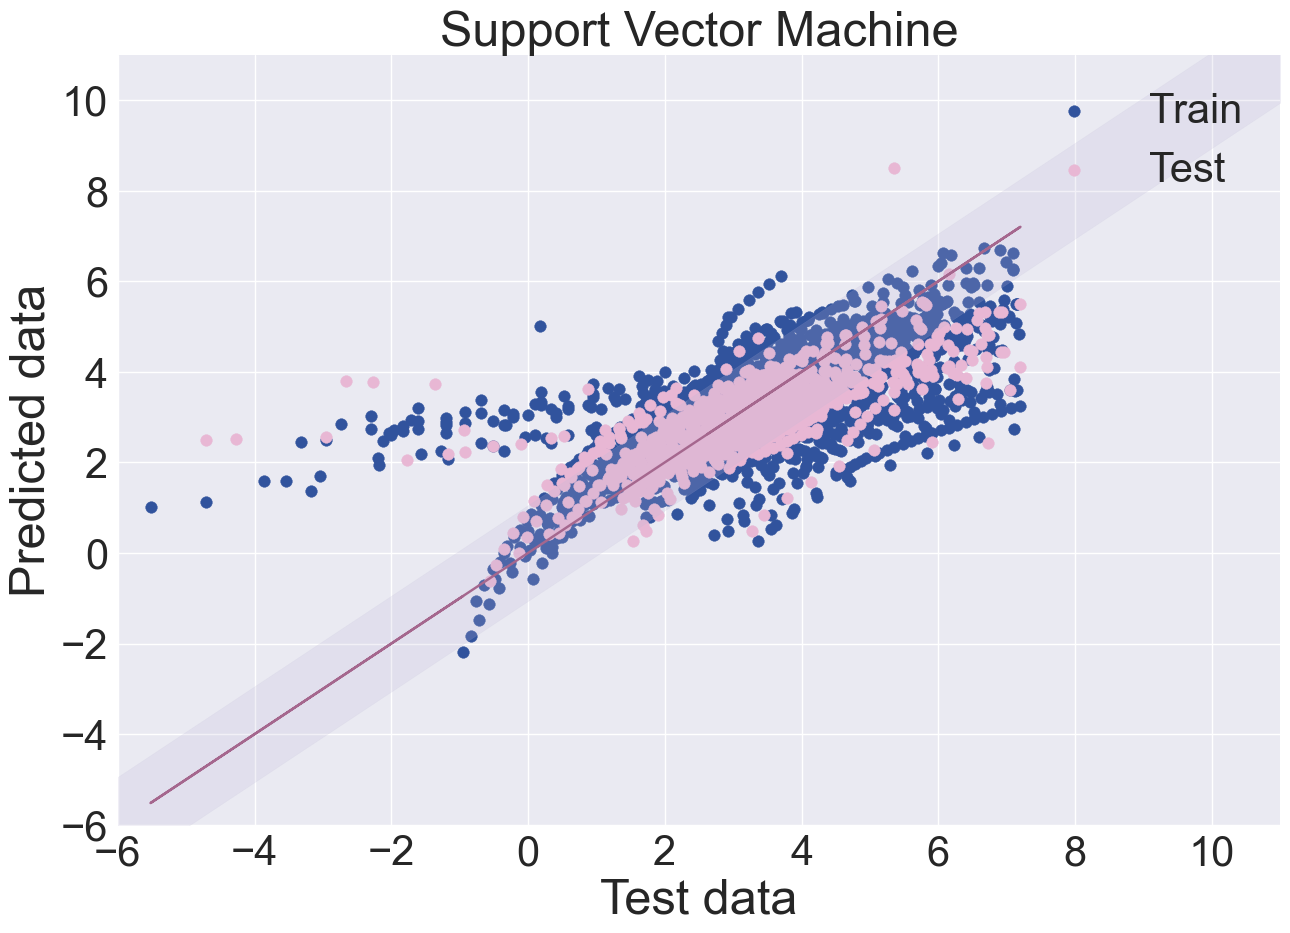

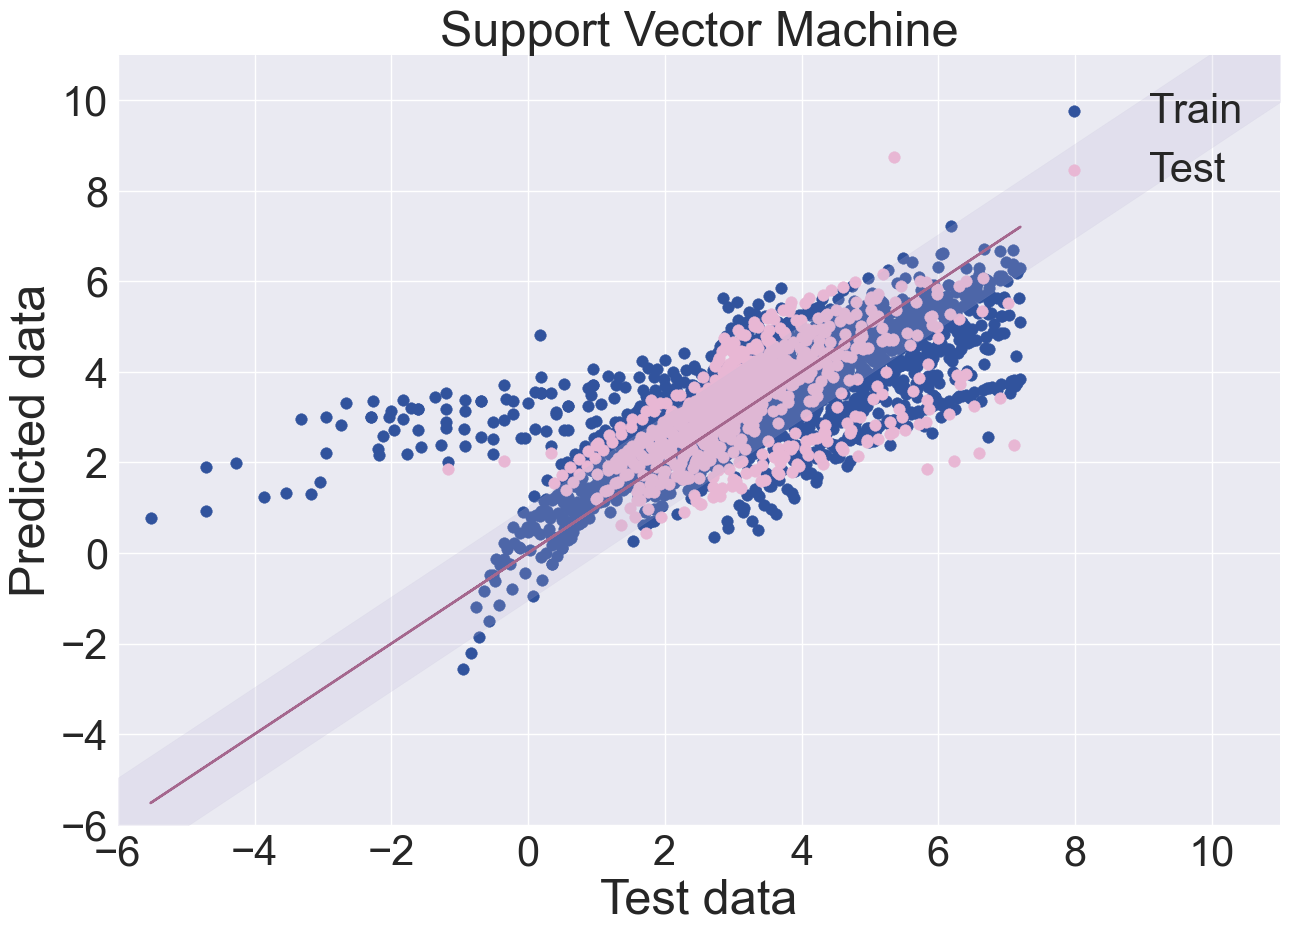

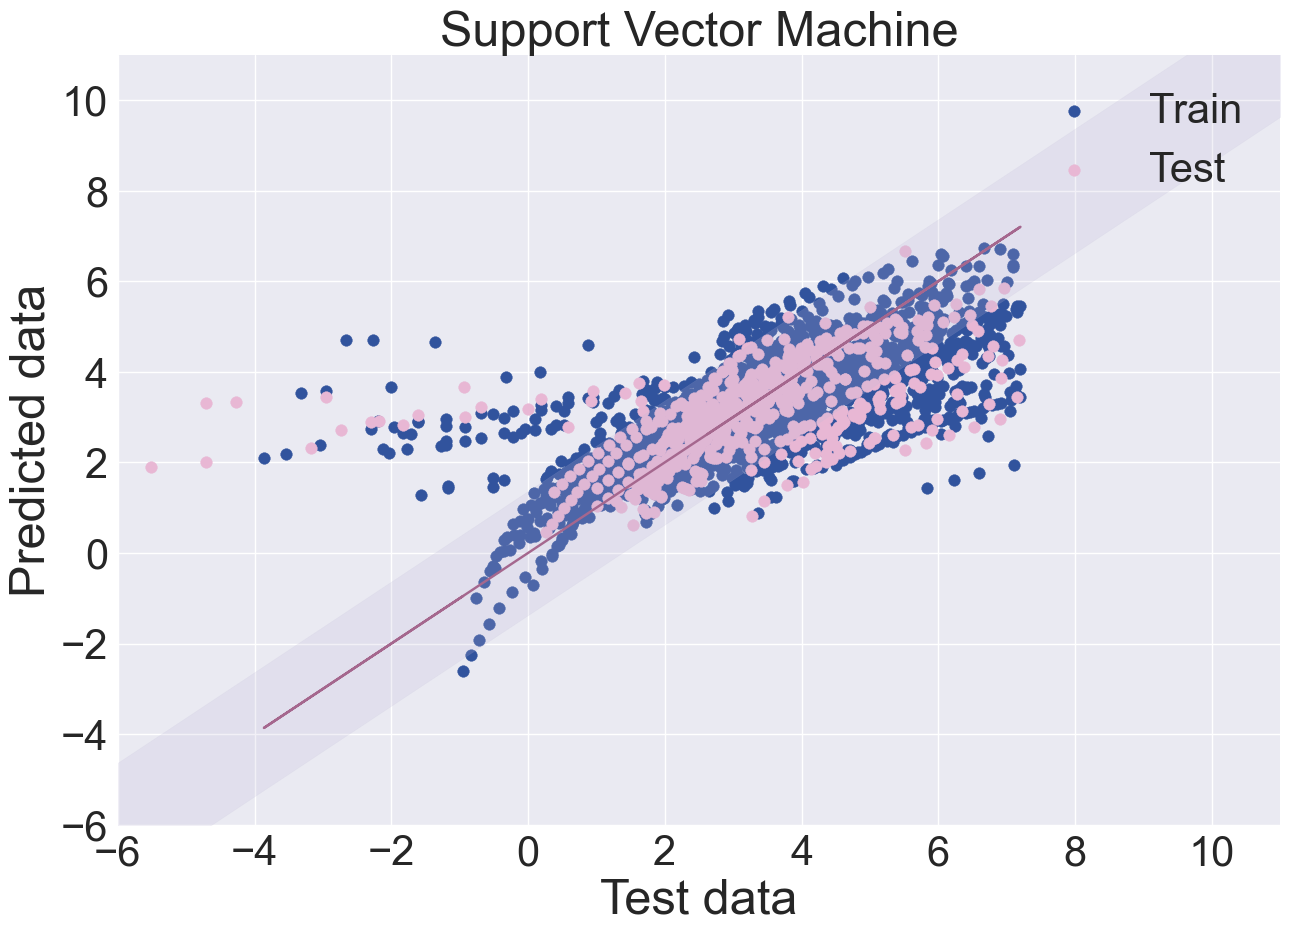

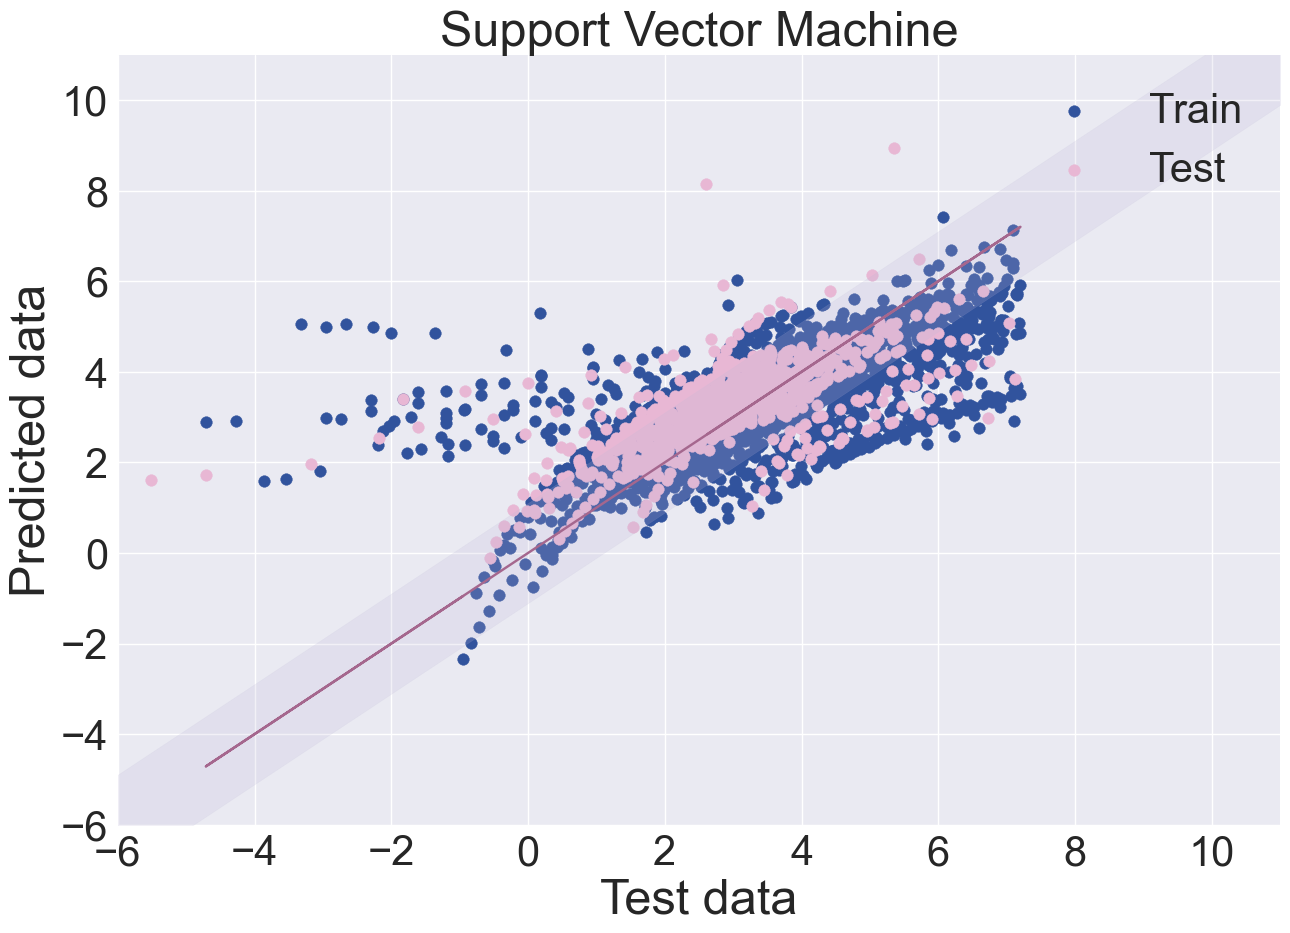

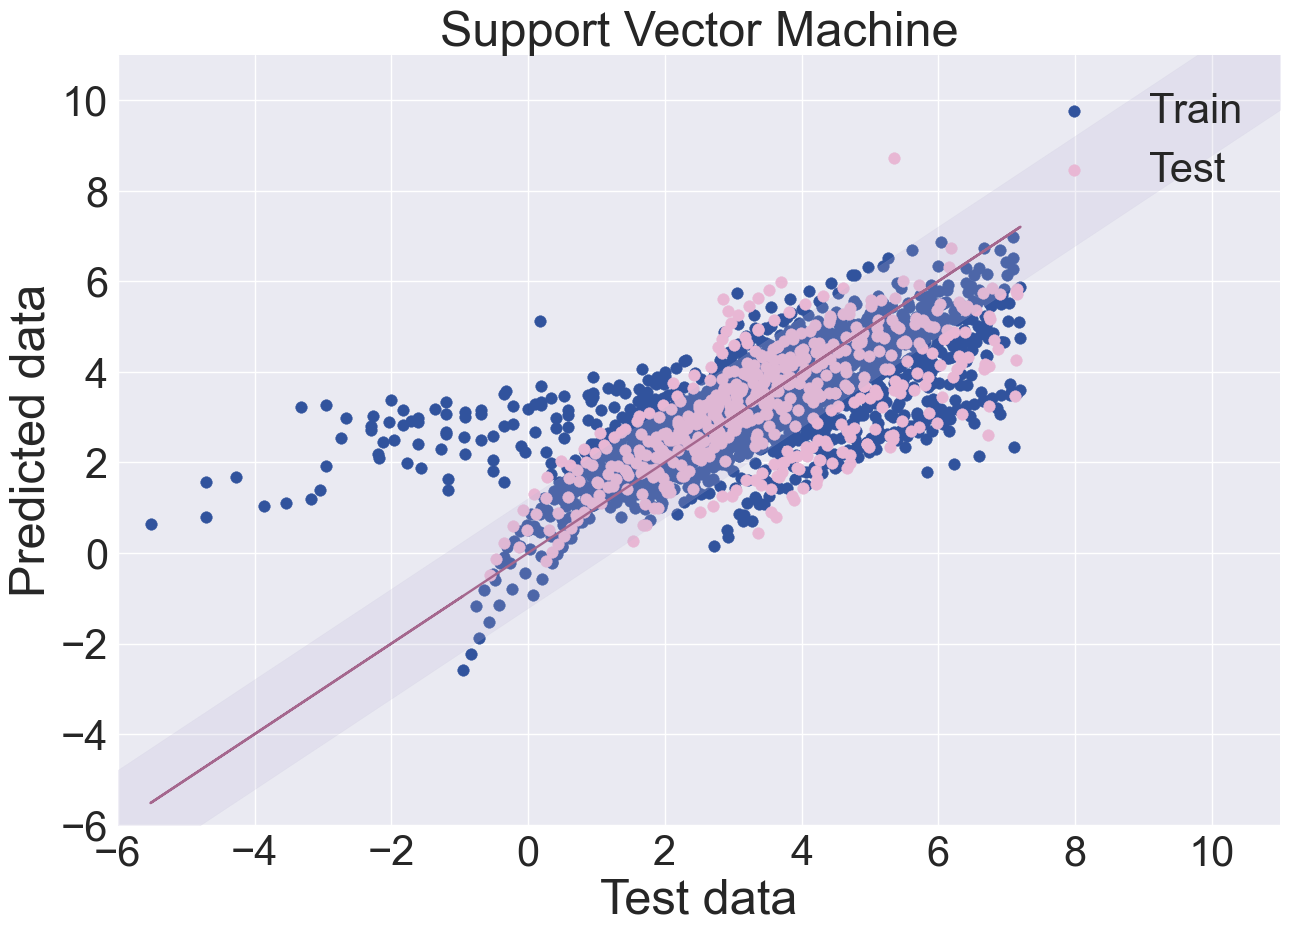

In [34]:
#SVM
count = 0
#Creating a table to check accuracy on different DES classes
SVM_df = x_model[:]
SVM_df['Viscosity_lit'] = y_model

for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))

    #Scaling the data
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    sc_y = MinMaxScaler(feature_range=(0, 1))
    y_train_mod = np.ravel(sc_y.fit_transform(np.array(y_train_mod).reshape(-1, 1)))
  
    #Support Vector Machine
    SVM_regr = SVR(kernel = kernel, gamma = gamma, epsilon = epsilon, C = C)
    SVM_regr.fit(x_train_mod, y_train_mod,sample_weight=sample_w)
    y_pred = SVM_regr.predict(x_test_mod)
    y1_pred = SVM_regr.predict(x_train_mod)
  
    #Rescaling the data
    y_train_mod = sc_y.inverse_transform(y_train_mod.reshape(-1, 1))
    y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))
    y1_pred = sc_y.inverse_transform(y1_pred.reshape(-1, 1))
    
    #Filling in the table in accordance with the metrics
    SVM_df['Viscosity_train' + str(count)] = None
    SVM_df['Viscosity_test' + str(count)] = None
    SVM_df['Viscosity_train' + str(count)].iloc[train_idx] = y1_pred[:, 0]
    SVM_df['Viscosity_test' + str(count)].iloc[val_idx] = y_pred[:, 0]

    #Calculating metrics
    df_error_train['Support Vector Machine' + str(count)] = regr_metrics(regr_RFR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Support Vector Machine', fontsize=35)
df_error_train

In [35]:
df_error_SVM = metrics_class(SVM_df, 'Support Vector Machine')
df_error_SVM

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type    R2_train    R2_test  \
0   Support Vector Machine0         2     I -212.480617        NaN   
1   Support Vector Machine0         2   III    0.502261    0.54709   
2   Support Vector Machine0         2    IV    0.853242   0.229743   
3   Support Vector Machine0         2     V    0.158989   0.355538   
4   Support Vector Machine0         3  None    0.665911   0.582166   
5   Support Vector Machine1         2     I -201.039521 -93.091298   
6   Support Vector Machine1         2   III    0.638033   0.449026   
7   Support Vector Machine1         2    IV    0.827263  -0.728298   
8   Support Vector Machine1         2     V    0.170806   0.130079   
9   Support Vector Machine1         3  None    0.722086  -0.274638   
10  Support Vector Machine2         2     I -208.667337        NaN   
11  Support Vector Machine2         2   III    0.500957   0.521062   
12  Support Vector Machine2         2    IV    0.840712   0.066607   
13  Support Vector Machine2         2     V    0.166171   0.144037   
14  Support Vector Machine2         3  None    0.634731  -0.208712   
15  Support Vector Machine3         2     I -266.390695        NaN   
16  Support Vector Machine3         2   III    0.584612   0.584128   
17  Support Vector Machine3         2    IV    0.834085    -0.2258   
18  Support Vector Machine3         2     V    0.099027   0.222792   
19  Support Vector Machine3         3  None    0.677498    0.48716   
20  Support Vector Machine4         2     I -198.592087       None   
21  Support Vector Machine4         2   III    0.632922   0.390773   
22  Support Vector Machine4         2    IV    0.822640  -0.261672   
23  Support Vector Machine4         2     V    0.201733  -0.086879   
24  Support Vector Machine4         3  None    0.682606    0.57333   

    RMSE_train RMSE_test  
0     0.557883       NaN  
1     0.834396  0.868439  
2     0.358842  0.568455  
3     1.623539  1.366504  
4     1.071121  1.125115  
5     0.556707  0.339301  
6     0.753441  0.800609  
7     0.342859  0.846772  
8     1.721213  1.208681  
9     0.977854   1.48985  
10    0.477681  0.013696  
11    0.869430  0.852526  
12    0.386453  0.436027  
13    1.578785  1.679042  
14    1.122875  1.395091  
15    0.495233  5.546151  
16    0.772380  0.703094  
17    0.338015   0.74291  
18    1.631383  1.716735  
19    1.111050  1.047032  
20    0.539431      None  
21    0.730639  0.983266  
22    0.349479  0.753702  
23    1.613461  1.460716  
24    1.033196  1.214673

### 5.2. K-nearest neighbors
K-nearest neighbors is a nonparametric method that intuitively approximates the relationship between independent variables and a continuous result by averaging observations in the same area.

In [36]:
#We optimize for KNN
regr_KNN = KNeighborsRegressor()

search_space = {"n_neighbors": Integer(5, 15),
    "leaf_size": Integer(2, 10),
    "p": Real(0.1, 3),
    "algorithm": Categorical(['auto', 'ball_tree', 'kd_tree', 'brute']),
    "metric": Categorical(['euclidean','manhattan'])}

#Scaling the data 
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sample_weight=compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))
opt_KNN = BayesSearchCV(estimator = regr_KNN, search_spaces=search_space, cv = custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_KNN.fit(x_train01, y_model)#, sample_weight=sample_weight)

n_neighbors = opt_KNN.best_estimator_.n_neighbors
weights = opt_KNN.best_estimator_.weights
leaf_size = opt_KNN.best_estimator_.leaf_size
p = opt_KNN.best_estimator_.p
algorithm = opt_KNN.best_estimator_.algorithm
metric = opt_KNN.best_estimator_.metric

print('n_neighbors:', n_neighbors,'leaf_size:', leaf_size, 'p:', p,'algorithm:', algorithm, 'metric:', metric)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
n_neighbors: 5 leaf_size: 10 p: 3.0 algorithm: kd_tree metric: manhattan



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.7092900745501207
MAE_test: 0.5973910142462541
MSE_test: 0.6822395024993226
RMSE_test: 0.8259779067864482
r2_train: 0.9348592803343198
MAE_train: 0.23964333126432963
MSE_train: 0.18380548999732757
RMSE_train: 0.4287254249485649



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.40106483929438397
MAE_test: 0.6535297858489213
MSE_test: 0.8956032859203459
RMSE_test: 0.946363189225123
r2_train: 0.9388376447289307
MAE_train: 0.23742536155603056
MSE_train: 0.18653930846078323
RMSE_train: 0.43190196626177013



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.5728026420403836
MAE_test: 0.7364468774416535
MSE_test: 1.2068376115772317
RMSE_test: 1.098561610278291
r2_train: 0.9303432763145628
MAE_train: 0.2318813997575842
MSE_train: 0.185426006500349
RMSE_train: 0.43061120108556045



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.5598497488840253
MAE_test: 0.685500476830484
MSE_test: 0.9178828755850521
RMSE_test: 0.958062041615809
r2_train: 0.9358029434844282
MAE_train: 0.24178937563738045
MSE_train: 0.18239193646142127
RMSE_train: 0.4270736897321366
r2_test: 0.5534853764186995
MAE_test: 0.749654263189725
MSE_test: 1.1331695461813973
RMSE_test: 1.0645043664454352
r2_train: 0.938605058356721
MAE_train: 0.21980873589115882
MSE_train: 0.16648991690078377
RMSE_train: 0.4080317596716998



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.469935            0.539101            0.490642   
1            0.513731            0.073678            0.415830   
2            1.222975            1.185621            1.164436   
3            1.068260            1.176925            1.284635   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.490705            0.519521                   0.752420   
1            0.456478            0.300740                   0.366048   
2            1.202902            1.141472                   0.835816   
3            1.064638            1.332138                   1.219738   

   Decision Tree Regression1  Decision Tree Regression2  \
0                   0.762512                   0.747004   
1                  -0.277702                   0.246539   
2                   0.851067                   0.820655   
3                   1.382238                   1.458950   

   Decision Tree Regression3  Decision Tree Regression4  ...  \
0                   0.806815                   0.638935  ...   
1                   0.105039                   0.229417  ...   
2                   0.740852                   0.989510  ...   
3                   1.366140                   1.398425  ...   

   Support Vector Machine0  Support Vector Machine1  Support Vector Machine2  \
0                 0.460539                 0.521824                 0.468101   
1                 0.523496                 0.275380                 0.335445   
2                 1.233766                 1.207638                 1.189922   
3                 1.057479                 1.040934                 1.370173   

   Support Vector Machine3  Support Vector Machine4  K-nearest neighbors0  \
0                 0.462555                 0.497059              0.934859   
1                 0.414196                 0.421065              0.709290   
2                 1.235698                 1.167847              0.428725   
3                 1.105273                 1.212117              0.825978   

   K-nearest neighbors1  K-nearest neighbors2  K-nearest neighbors3  \
0              0.938838              0.930343              0.935803   
1              0.401065              0.572803              0.559850   
2              0.431902              0.430611              0.427074   
3              0.946363              1.098562              0.958062   

   K-nearest neighbors4  
0              0.938605  
1              0.553485  
2              0.408032  
3              1.064504  

[4 rows x 40 columns]

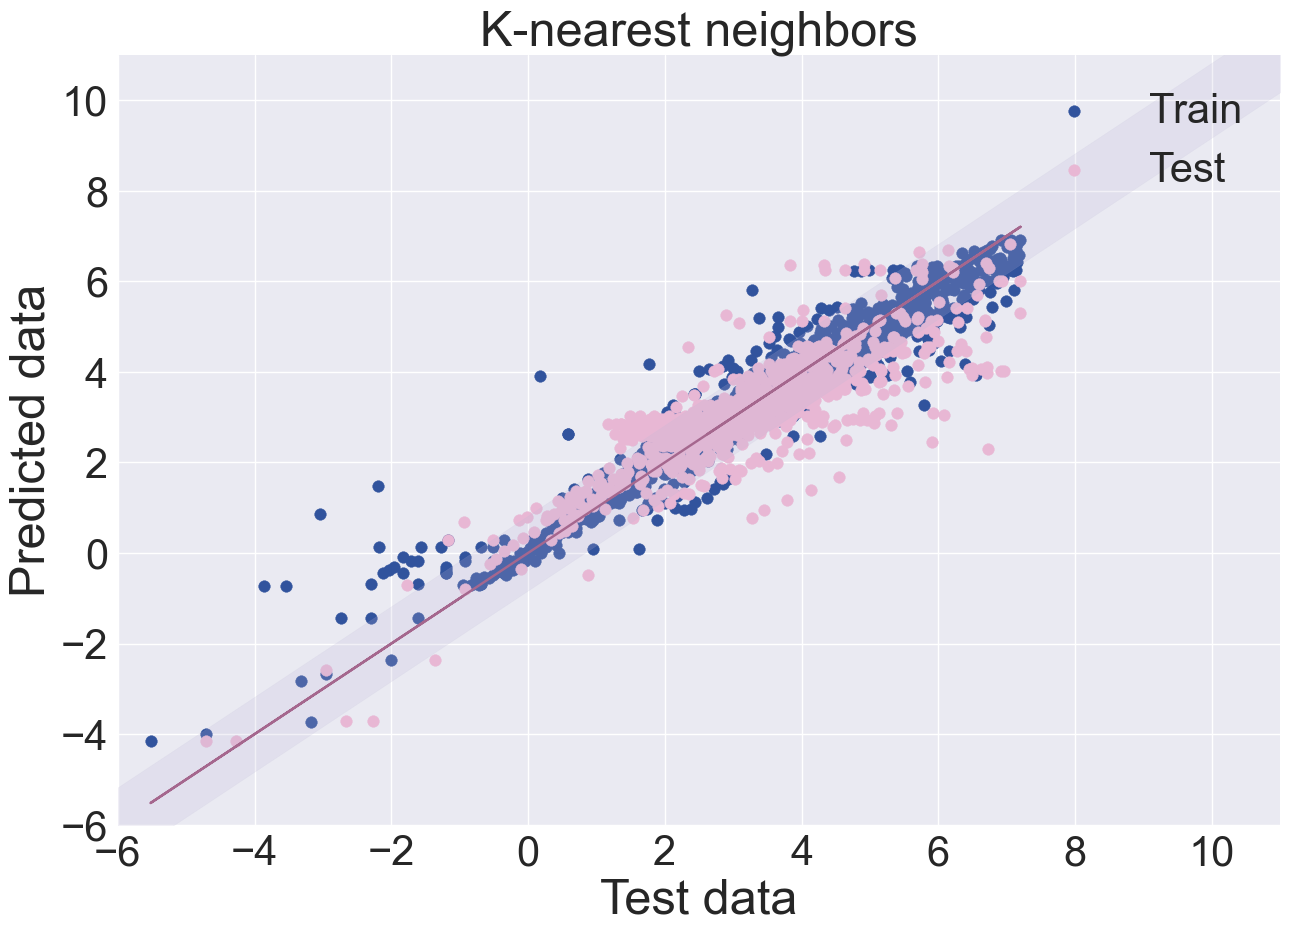

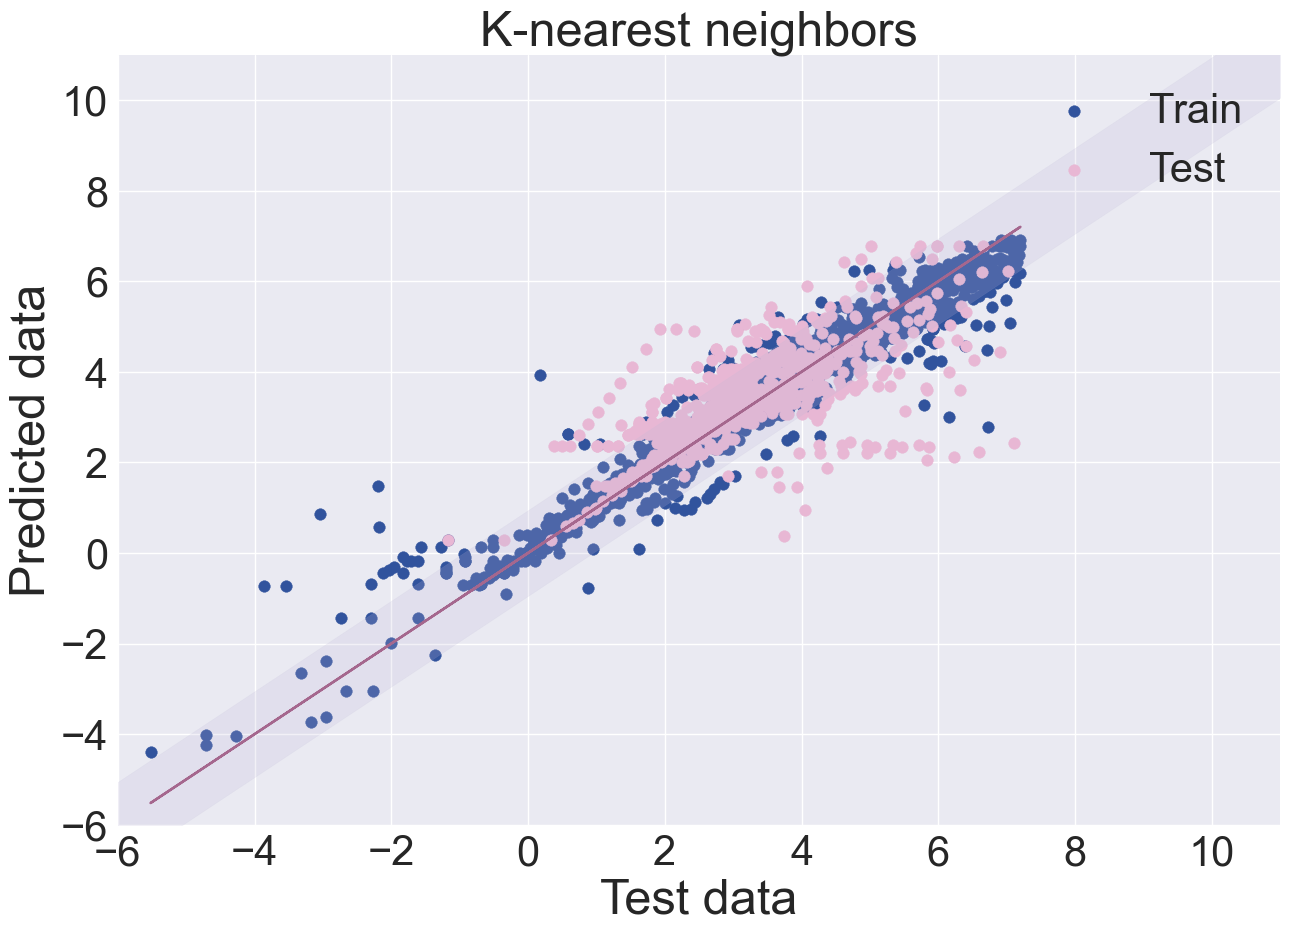

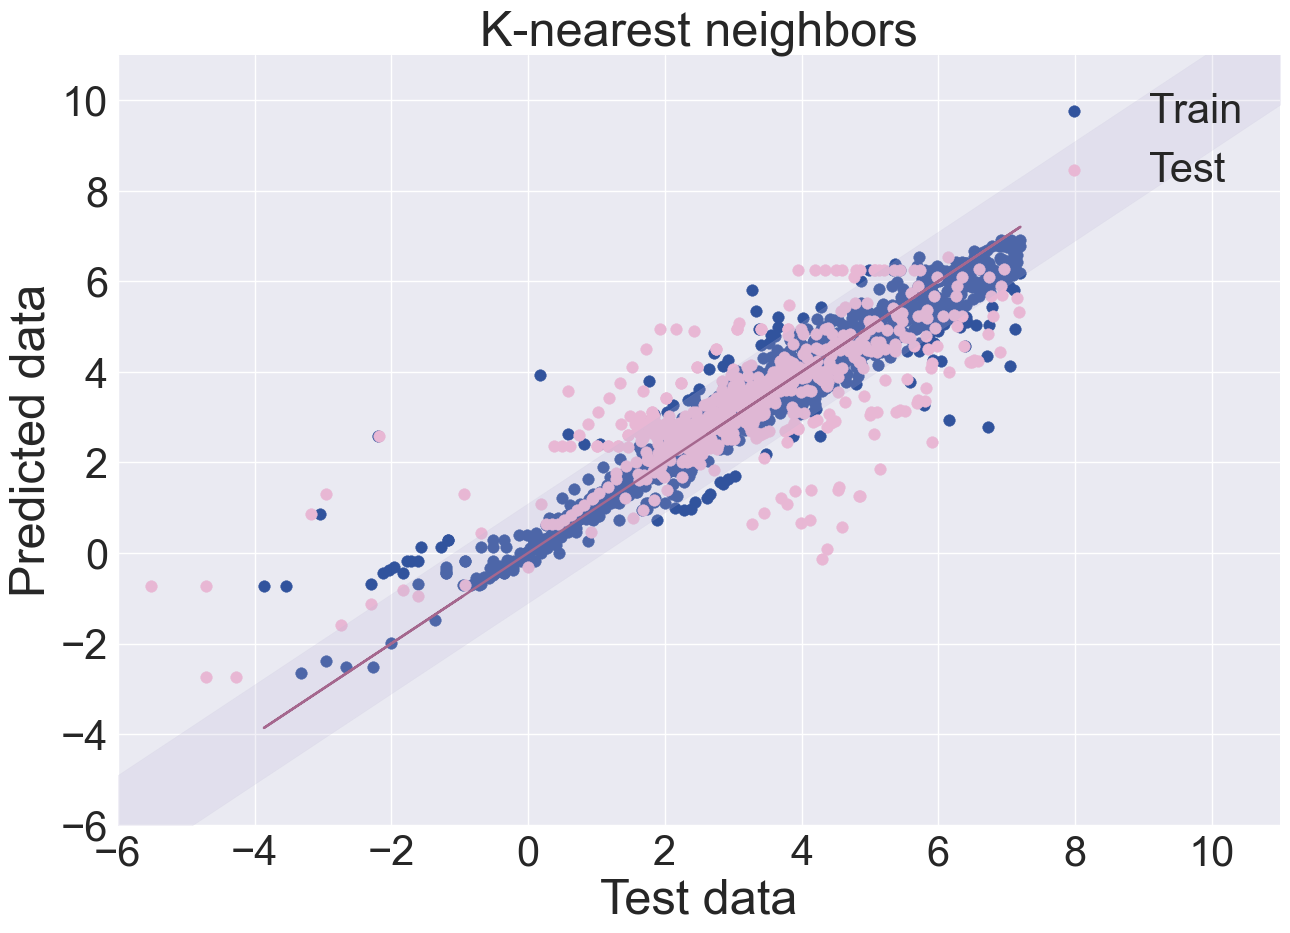

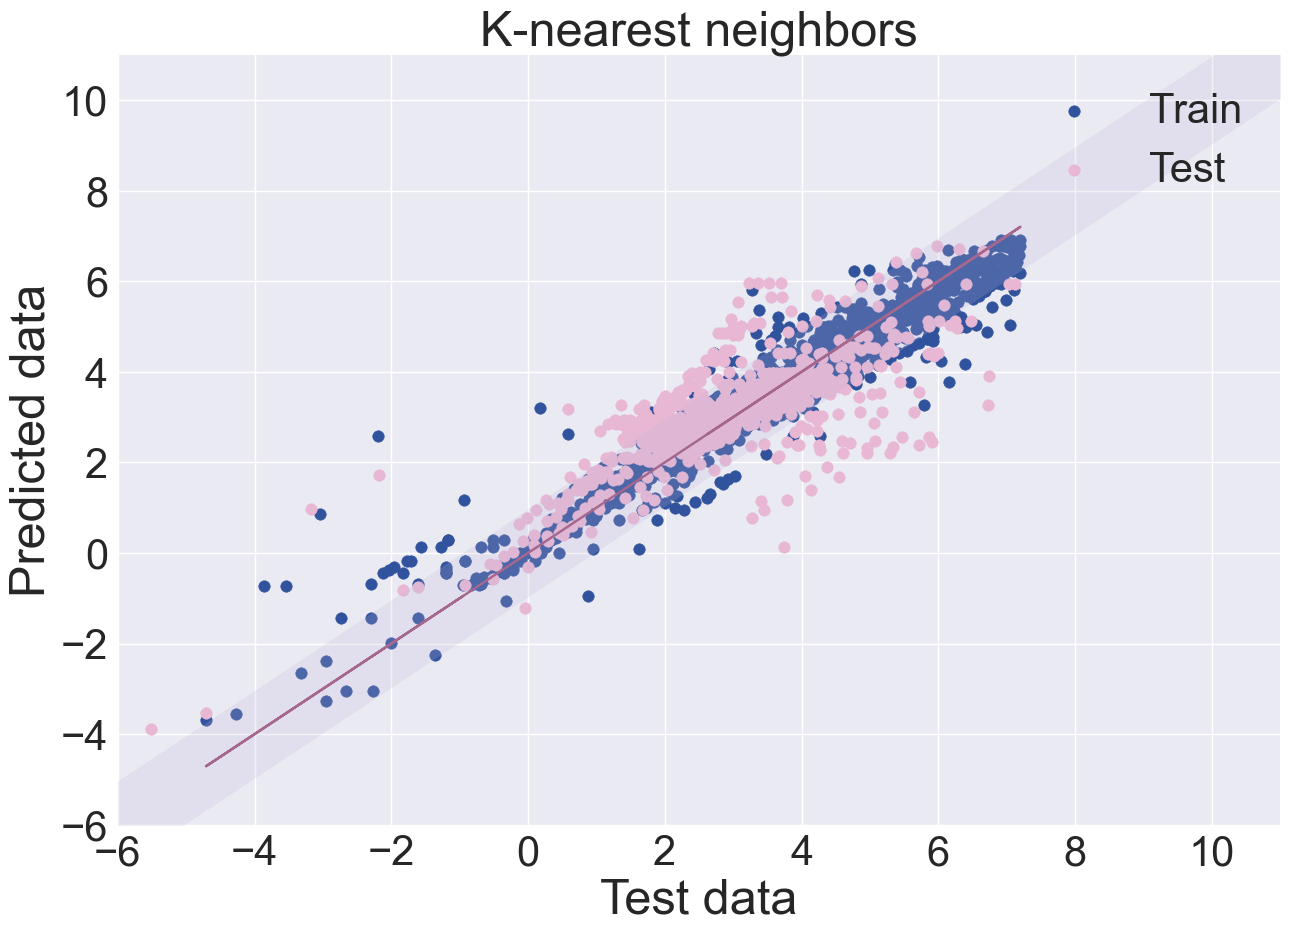

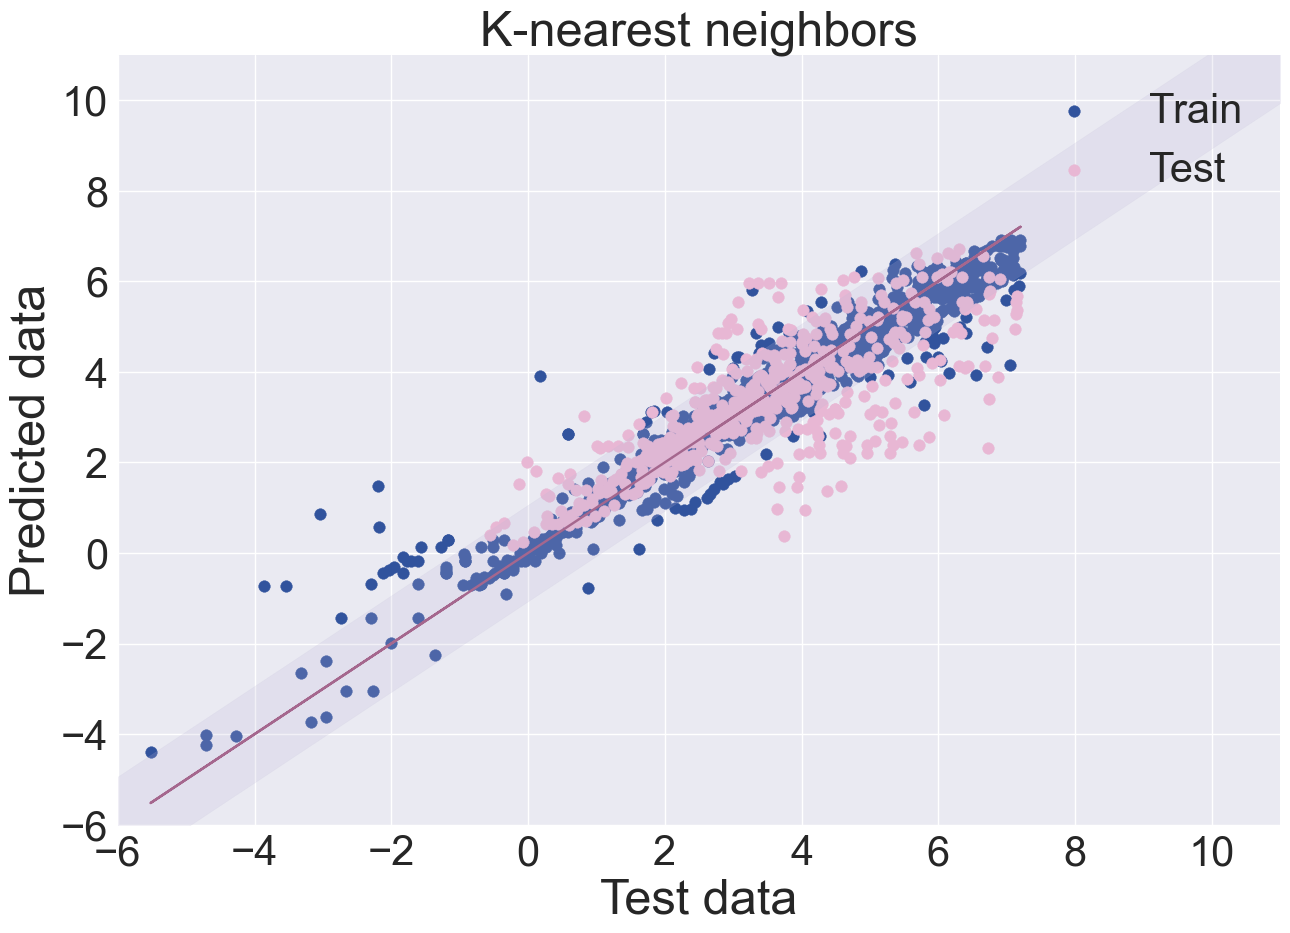

In [37]:
#KNN
count = 0
#Creating a table to check accuracy on different DES classes
KNN_df = x_model[:]
KNN_df['Viscosity_lit'] = y_model
for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    #Scaling the data
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #K-nearest neighbors
    KNN_regr = KNeighborsRegressor(n_neighbors = n_neighbors,leaf_size = leaf_size, p = p, algorithm = algorithm,metric=metric)
    KNN_regr.fit(x_train_mod, y_train_mod)#,sample_weight=sample_w)
    y_pred = KNN_regr.predict(x_test_mod)
    y1_pred = KNN_regr.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    KNN_df['Viscosity_train' + str(count)] = None
    KNN_df['Viscosity_test' + str(count)] = None
    KNN_df['Viscosity_train' + str(count)].iloc[train_idx] = y1_pred
    KNN_df['Viscosity_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['K-nearest neighbors' + str(count)] = regr_metrics(regr_RFR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('K-nearest neighbors', fontsize=35)
df_error_train

In [38]:
df_error_KNN = metrics_class(KNN_df, 'K-nearest neighbors')
df_error_KNN

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type    R2_train     R2_test  RMSE_train  \
0   K-nearest neighbors0         2     I  -16.229999         NaN    0.158492   
1   K-nearest neighbors0         2   III    0.892493    0.611958    0.387784   
2   K-nearest neighbors0         2    IV    0.905416    0.602301    0.288078   
3   K-nearest neighbors0         2     V    0.921556    0.816265    0.495840   
4   K-nearest neighbors0         3  None    0.956709    0.515642    0.385573   
5   K-nearest neighbors1         2     I -119.572972 -108.944308    0.430064   
6   K-nearest neighbors1         2   III    0.911302    0.580156    0.372968   
7   K-nearest neighbors1         2    IV    0.905398    0.670157    0.253731   
8   K-nearest neighbors1         2     V    0.923183    0.252778    0.523884   
9   K-nearest neighbors1         3  None    0.954174   -0.173972    0.397077   
10  K-nearest neighbors2         2     I  -72.952448         NaN    0.283693   
11  K-nearest neighbors2         2   III    0.922369    0.438789    0.342912   
12  K-nearest neighbors2         2    IV    0.945529    0.650426    0.225990   
13  K-nearest neighbors2         2     V    0.904938    0.504223    0.533076   
14  K-nearest neighbors2         3  None    0.946036    0.272995    0.431597   
15  K-nearest neighbors3         2     I  -86.598341         NaN    0.283455   
16  K-nearest neighbors3         2   III    0.905780    0.550259    0.367855   
17  K-nearest neighbors3         2    IV    0.923097    0.897805    0.230126   
18  K-nearest neighbors3         2     V    0.917701    0.625284    0.493057   
19  K-nearest neighbors3         3  None    0.955093    0.402833    0.414594   
20  K-nearest neighbors4         2     I  -17.258251        None    0.163152   
21  K-nearest neighbors4         2   III    0.926003    0.417769    0.328042   
22  K-nearest neighbors4         2    IV    0.922529     0.89569    0.230973   
23  K-nearest neighbors4         2     V    0.922171    0.335325    0.503795   
24  K-nearest neighbors4         3  None    0.955219    0.547618    0.388089   

   RMSE_test  
0        NaN  
1   0.803845  
2   0.408466  
3    0.72964  
4   1.211374  
5   0.366773  
6   0.698874  
7   0.369923  
8   1.120203  
9   1.429809  
10  0.162863  
11  0.922849  
12   0.26684  
13  1.277842  
14  1.081957  
15  0.273188  
16  0.731164  
17  0.214507  
18  1.192025  
19   1.12984  
20      None  
21  0.961234  
22  0.216715  
23    1.1423  
24  1.250737

### 5.3. Multilayer perceptron (MLP)

In [39]:
#We optimize for MLP
regr_MLP = MLPRegressor()

params_dict = [{'hidden_layer_sizes':  [(4,4,4,4),(4,4),(4,4,3,3),(4,3,4),(10,10,10,10,10), (3,), (6,6,6,6), (4,4), (10,5,5,10), (6,), (12,12,12), (3,3,3), (6,6,6), (3,3,3,3,3), (12, 12, 6, 6, 3, 3)],
                'activation': ['relu','identity','logistic','tanh'],
                'solver': ['adam', 'lbfgs'],
                'learning_rate':['constant','adaptive','invscaling'],
                'learning_rate_init': [0.1,0.01,0.5, 0.00001],
                'alpha': [0.01,0.1,0.001, 0.0001],
                'max_iter': [1000]}]

#Scaling the data
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sample_weight=compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))
opt_MLP = GridSearchCV(MLPRegressor(), params_dict, cv=custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_jobs=-1, scoring='r2', verbose=10)
opt_MLP.fit(x_train01, y_model)#, sample_weight=sample_weight)

hidden_layer_sizes = opt_MLP.best_estimator_.hidden_layer_sizes
activation = opt_MLP.best_estimator_.activation
solver = opt_MLP.best_estimator_.solver
learning_rate = opt_MLP.best_estimator_.learning_rate
learning_rate_init = opt_MLP.best_estimator_.learning_rate_init
alpha = opt_MLP.best_estimator_.alpha

print('hidden_layer_sizes:', hidden_layer_sizes,'activation:', activation, 'solver:', solver,'learning_rate:', learning_rate, 'learning_rate_init:', learning_rate_init, 'alpha:', alpha)

Fitting 5 folds for each of 5760 candidates, totalling 28800 fits


hidden_layer_sizes: (10, 5, 5, 10) activation: tanh solver: adam learning_rate: adaptive learning_rate_init: 0.01 alpha: 0.1



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



r2_test: 0.721110424185706
MAE_test: 0.5525606981164006
MSE_test: 0.6544994470393307
RMSE_test: 0.8090114010564565
r2_train: 0.8920730431640703
MAE_train: 0.3945924411519523
MSE_train: 0.30453405008357654
RMSE_train: 0.5518460383871362



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.24955243492225454
MAE_test: 0.7529177757567217
MSE_test: 1.1221637153556567
RMSE_test: 1.0593222905969915
r2_train: 0.8234247436694736
MAE_train: 0.48233416850437427
MSE_train: 0.5385375703927838
RMSE_train: 0.7338511909050661



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.6106918246465245
MAE_test: 0.7688594992795732
MSE_test: 1.0998002205704003
RMSE_test: 1.04871360273928
r2_train: 0.885940503268431
MAE_train: 0.35552965489618266
MSE_train: 0.3036260659901823
RMSE_train: 0.5510227454381373



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.41030802923743104
MAE_test: 0.8560120506452759
MSE_test: 1.2297349835893767
RMSE_test: 1.1089341655794436
r2_train: 0.878394862915344
MAE_train: 0.41366037410434514
MSE_train: 0.34549553578281306
RMSE_train: 0.5877886829318961
r2_test: 0.4822757551914375
MAE_test: 0.8614700839217052
MSE_test: 1.3138860779774795
RMSE_test: 1.1462486981355657
r2_train: 0.8610709157382176
MAE_train: 0.4173247780494354
MSE_train: 0.3767458861389482
RMSE_train: 0.6137962904245579



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.469935            0.539101            0.490642   
1            0.513731            0.073678            0.415830   
2            1.222975            1.185621            1.164436   
3            1.068260            1.176925            1.284635   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.490705            0.519521                   0.752420   
1            0.456478            0.300740                   0.366048   
2            1.202902            1.141472                   0.835816   
3            1.064638            1.332138                   1.219738   

   Decision Tree Regression1  Decision Tree Regression2  \
0                   0.762512                   0.747004   
1                  -0.277702                   0.246539   
2                   0.851067                   0.820655   
3                   1.382238                   1.458950   

   Decision Tree Regression3  Decision Tree Regression4  ...  \
0                   0.806815                   0.638935  ...   
1                   0.105039                   0.229417  ...   
2                   0.740852                   0.989510  ...   
3                   1.366140                   1.398425  ...   

   K-nearest neighbors0  K-nearest neighbors1  K-nearest neighbors2  \
0              0.934859              0.938838              0.930343   
1              0.709290              0.401065              0.572803   
2              0.428725              0.431902              0.430611   
3              0.825978              0.946363              1.098562   

   K-nearest neighbors3  K-nearest neighbors4  Multilayer perceptron (MLP)0  \
0              0.935803              0.938605                      0.892073   
1              0.559850              0.553485                      0.721110   
2              0.427074              0.408032                      0.551846   
3              0.958062              1.064504                      0.809011   

   Multilayer perceptron (MLP)1  Multilayer perceptron (MLP)2  \
0                      0.823425                      0.885941   
1                      0.249552                      0.610692   
2                      0.733851                      0.551023   
3                      1.059322                      1.048714   

   Multilayer perceptron (MLP)3  Multilayer perceptron (MLP)4  
0                      0.878395                      0.861071  
1                      0.410308                      0.482276  
2                      0.587789                      0.613796  
3                      1.108934                      1.146249  

[4 rows x 45 columns]

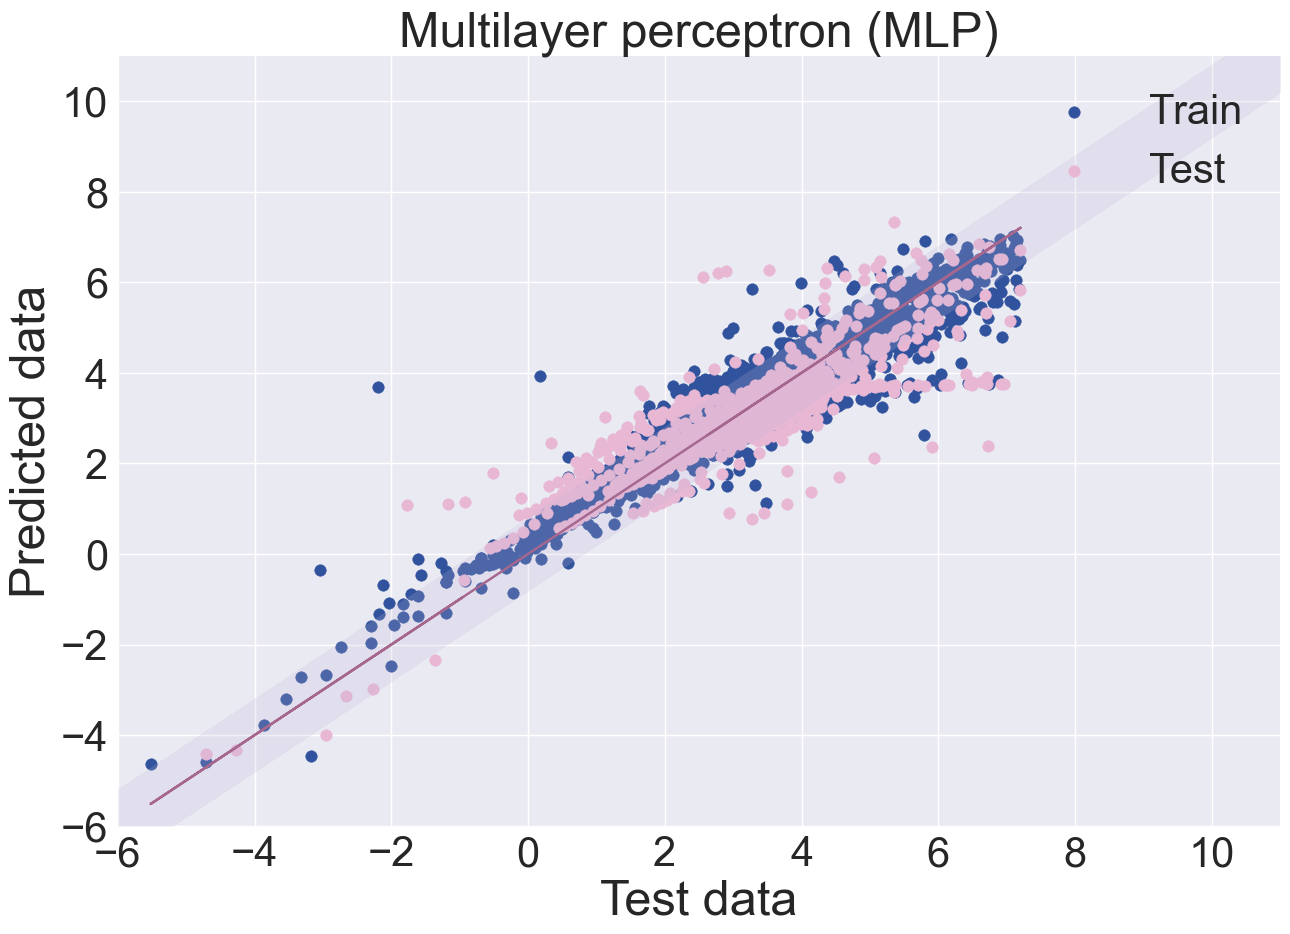

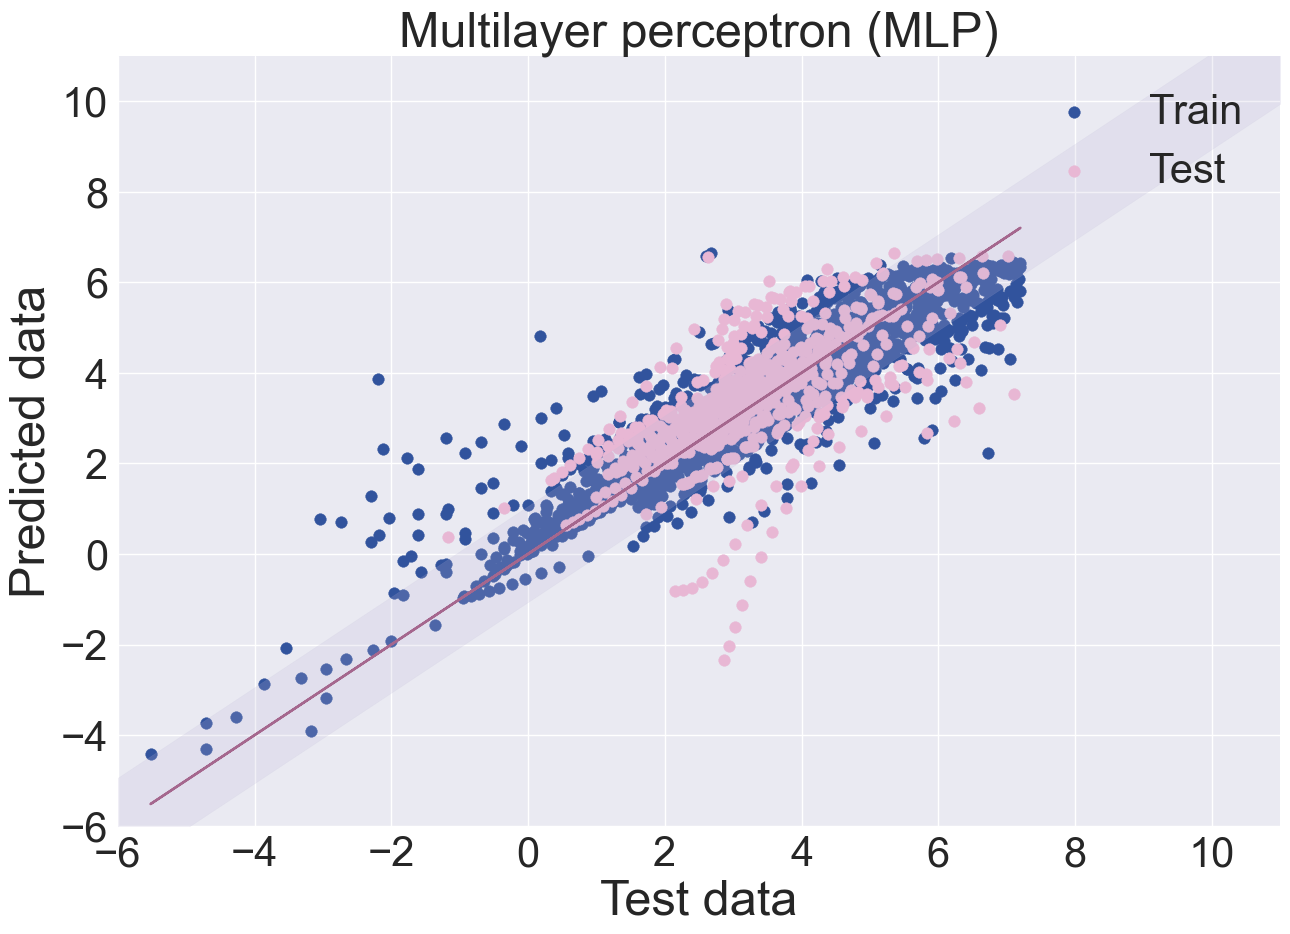

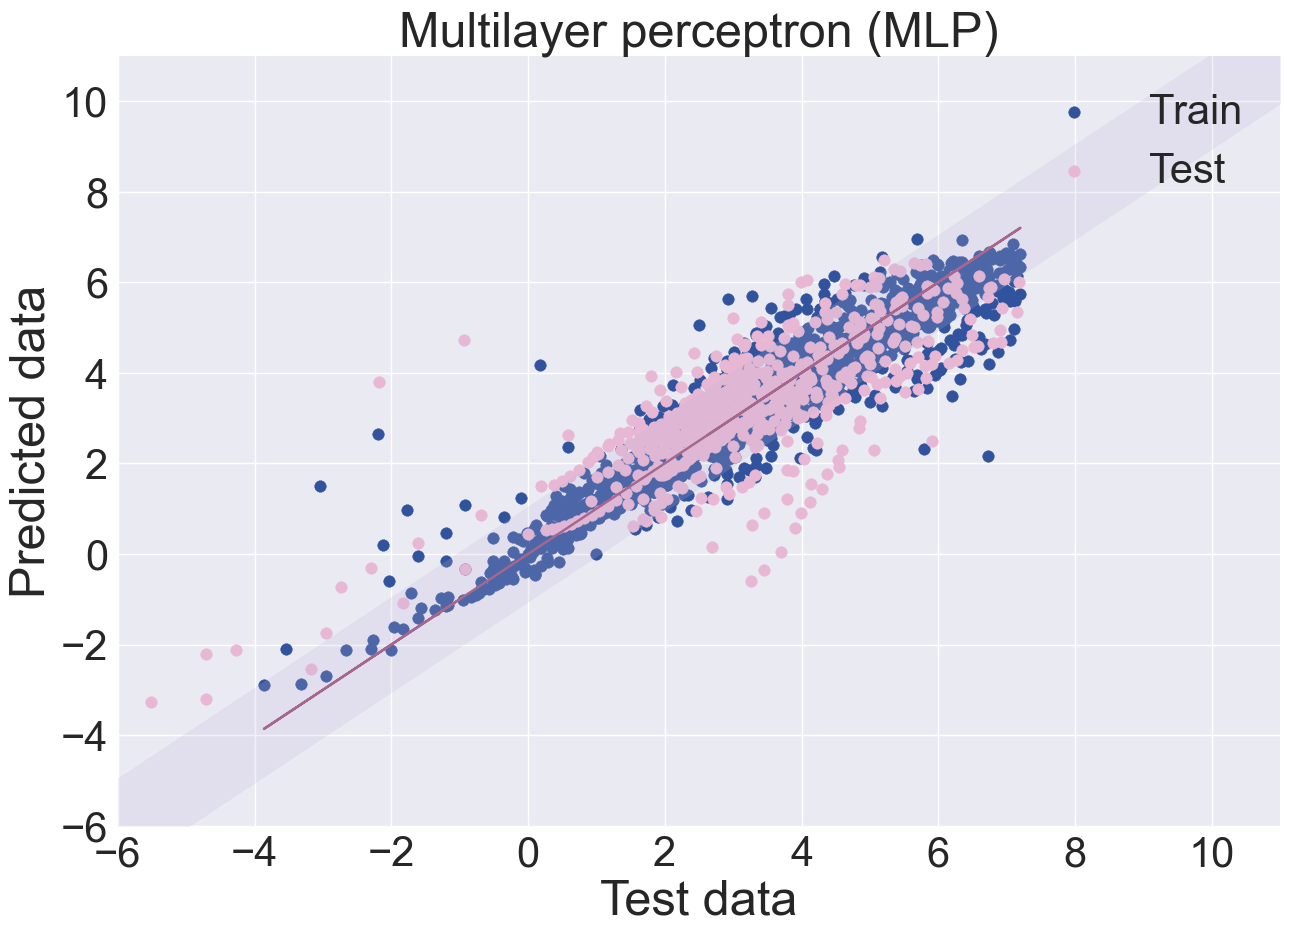

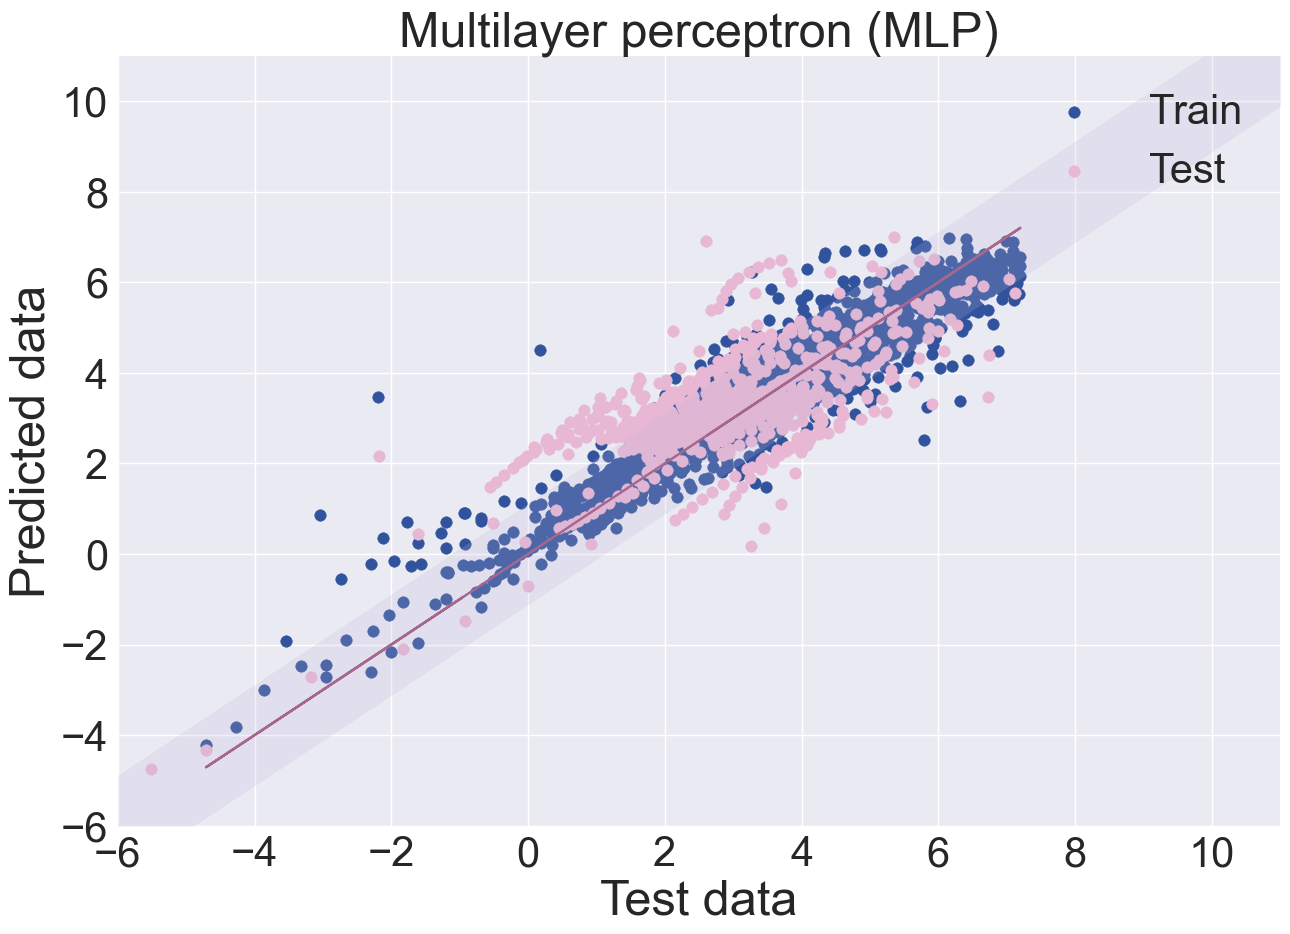

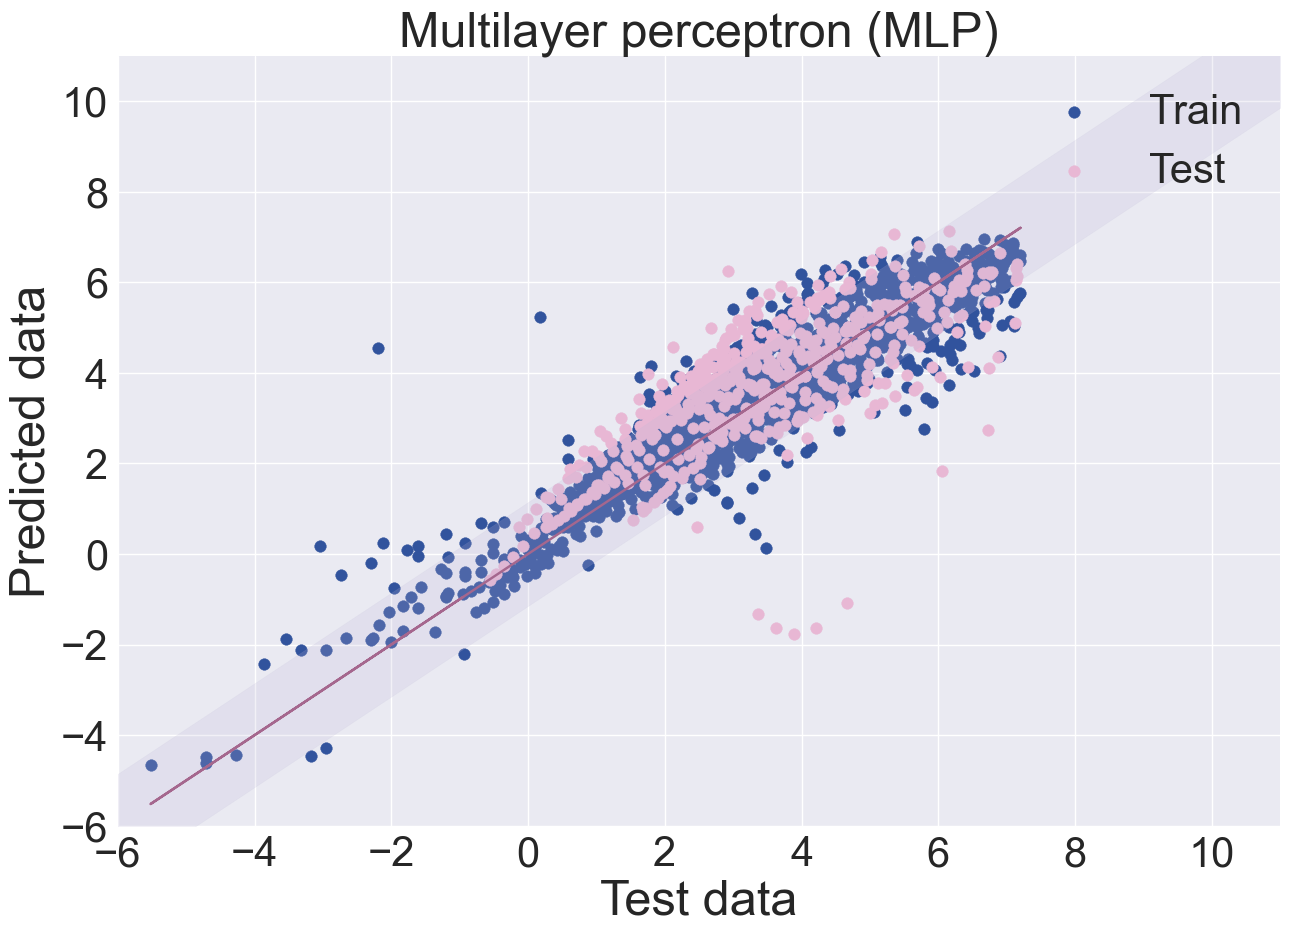

In [40]:
#MLP
count = 0
#Creating a table to check accuracy on different DES classes
MLP_df = x_model[:]
MLP_df['Viscosity_lit'] = y_model
for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    
    #Scaling the data
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #K-nearest neighbors
    MLP_regr = MLPRegressor(max_iter = 500, hidden_layer_sizes= hidden_layer_sizes, activation=activation, solver=solver, learning_rate= learning_rate, learning_rate_init=learning_rate_init, alpha=alpha)
    MLP_regr.fit(x_train_mod, y_train_mod)#,sample_weight=sample_w)
    y_pred = MLP_regr.predict(x_test_mod)
    y1_pred = MLP_regr.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    MLP_df['Viscosity_train' + str(count)] = None
    MLP_df['Viscosity_test' + str(count)] = None
    MLP_df['Viscosity_train' + str(count)].iloc[train_idx] = y1_pred
    MLP_df['Viscosity_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['Multilayer perceptron (MLP)' + str(count)] = regr_metrics(regr_RFR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Multilayer perceptron (MLP)', fontsize=35)
df_error_train

In [41]:
df_error_MLP = metrics_class(MLP_df, 'Multilayer perceptron (MLP)')
df_error_MLP

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type      R2_train      R2_test  \
0   Multilayer perceptron (MLP)0         2     I   -207.516366          NaN   
1   Multilayer perceptron (MLP)0         2   III      0.731939     0.711896   
2   Multilayer perceptron (MLP)0         2    IV      0.973586     0.653214   
3   Multilayer perceptron (MLP)0         2     V      0.904550     0.770795   
4   Multilayer perceptron (MLP)0         3  None      0.928751     0.468928   
5   Multilayer perceptron (MLP)1         2     I -10227.710342 -6404.016186   
6   Multilayer perceptron (MLP)1         2   III      0.727899     0.518167   
7   Multilayer perceptron (MLP)1         2    IV      0.905241    -0.672578   
8   Multilayer perceptron (MLP)1         2     V      0.794374      0.51425   
9   Multilayer perceptron (MLP)1         3  None      0.864404    -2.964401   
10  Multilayer perceptron (MLP)2         2     I    -78.218660          NaN   
11  Multilayer perceptron (MLP)2         2   III      0.805461     0.530692   
12  Multilayer perceptron (MLP)2         2    IV      0.942937    -1.898728   
13  Multilayer perceptron (MLP)2         2     V      0.890199     0.578753   
14  Multilayer perceptron (MLP)2         3  None      0.908674     0.306204   
15  Multilayer perceptron (MLP)3         2     I   -200.755337          NaN   
16  Multilayer perceptron (MLP)3         2   III      0.772080     0.437253   
17  Multilayer perceptron (MLP)3         2    IV      0.939382    -0.545367   
18  Multilayer perceptron (MLP)3         2     V      0.863235      0.75136   
19  Multilayer perceptron (MLP)3         3  None      0.917271    -0.047964   
20  Multilayer perceptron (MLP)4         2     I    -97.828424         None   
21  Multilayer perceptron (MLP)4         2   III      0.804820     0.348599   
22  Multilayer perceptron (MLP)4         2    IV      0.889151    -3.397001   
23  Multilayer perceptron (MLP)4         2     V      0.833844     0.285366   
24  Multilayer perceptron (MLP)4         3  None      0.902890     0.585905   

    RMSE_train RMSE_test  
0     0.551359       NaN  
1     0.612334  0.692641  
2     0.152237  0.381425  
3     0.546954  0.814937  
4     0.494649  1.268444  
5     3.961127   2.79944  
6     0.653250  0.748692  
7     0.253941   0.83301  
8     0.857127  0.903188  
9     0.683035  2.627471  
10    0.293620  2.539013  
11    0.542837  0.843911  
12    0.231304  0.768395  
13    0.572912  1.177884  
14    0.561463  1.056957  
15    0.430179   4.31038  
16    0.572132  0.817881  
17    0.204311  0.834147  
18    0.635606  0.971002  
19    0.562725  1.496725  
20    0.379581      None  
21    0.532771  1.016731  
22    0.276286  1.407035  
23    0.736109  1.184451  
24    0.571500  1.196639

**Output:** The algorithms given in this chapter have shown good results, on par with boosting

## 6. General graphs
For a visual comparison of all algorithms, graphs were constructed showing the dependence of R2 and RMSE from algorithm to algorithm

### 6.1. Graphs for various ML algorithms

In [42]:
#General table obtained after cross-validation
df_error_train.index = ['R2_train', 'R2_test', 'RMSE_train', 'RMSE_test']
df_error_train

Linear Regression0  Linear Regression1  Linear Regression2  \
R2_train              0.469935            0.539101            0.490642   
R2_test               0.513731            0.073678            0.415830   
RMSE_train            1.222975            1.185621            1.164436   
RMSE_test             1.068260            1.176925            1.284635   

            Linear Regression3  Linear Regression4  Decision Tree Regression0  \
R2_train              0.490705            0.519521                   0.752420   
R2_test               0.456478            0.300740                   0.366048   
RMSE_train            1.202902            1.141472                   0.835816   
RMSE_test             1.064638            1.332138                   1.219738   

            Decision Tree Regression1  Decision Tree Regression2  \
R2_train                     0.762512                   0.747004   
R2_test                     -0.277702                   0.246539   
RMSE_train                   0.851067                   0.820655   
RMSE_test                    1.382238                   1.458950   

            Decision Tree Regression3  Decision Tree Regression4  ...  \
R2_train                     0.806815                   0.638935  ...   
R2_test                      0.105039                   0.229417  ...   
RMSE_train                   0.740852                   0.989510  ...   
RMSE_test                    1.366140                   1.398425  ...   

            K-nearest neighbors0  K-nearest neighbors1  K-nearest neighbors2  \
R2_train                0.934859              0.938838              0.930343   
R2_test                 0.709290              0.401065              0.572803   
RMSE_train              0.428725              0.431902              0.430611   
RMSE_test               0.825978              0.946363              1.098562   

            K-nearest neighbors3  K-nearest neighbors4  \
R2_train                0.935803              0.938605   
R2_test                 0.559850              0.553485   
RMSE_train              0.427074              0.408032   
RMSE_test               0.958062              1.064504   

            Multilayer perceptron (MLP)0  Multilayer perceptron (MLP)1  \
R2_train                        0.892073                      0.823425   
R2_test                         0.721110                      0.249552   
RMSE_train                      0.551846                      0.733851   
RMSE_test                       0.809011                      1.059322   

            Multilayer perceptron (MLP)2  Multilayer perceptron (MLP)3  \
R2_train                        0.885941                      0.878395   
R2_test                         0.610692                      0.410308   
RMSE_train                      0.551023                      0.587789   
RMSE_test                       1.048714                      1.108934   

            Multilayer perceptron (MLP)4  
R2_train                        0.861071  
R2_test                         0.482276  
RMSE_train                      0.613796  
RMSE_test                       1.146249  

[4 rows x 45 columns]

In [43]:
#Table with averages and deviations for metrics
df_error_train_1 = df_error_train.transpose()
f_get_name = lambda x: x[:-1]
df_error_train_1['Regr'] = df_error_train_1.index
df_error_train_1['Regr'] = df_error_train_1['Regr'].apply(f_get_name)
df_error_train_1 = df_error_train_1.groupby('Regr').agg(['mean', 'std'])
df_error_train_1.columns = ['_'.join(col).rstrip('_') for col in df_error_train_1.columns.values] #Названия для новых столбцов
df_error_train_1

R2_train_mean  R2_train_std  R2_test_mean  \
Regr                                                                      
Cat Boosting Regression            0.927450      0.006839      0.647221   
Decision Tree Regression           0.741537      0.062001      0.133868   
Gradient Boosting Regression       0.904654      0.008308      0.596499   
K-nearest neighbors                0.935690      0.003453      0.559299   
Linear Regression                  0.501981      0.027241      0.352091   
Multilayer perceptron (MLP)        0.868181      0.027587      0.494788   
Random Forest Regression           0.752914      0.011363      0.494239   
Support Vector Machine             0.482016      0.026667      0.393916   
XGBoosting Regression              0.998376      0.000239      0.638967   

                              R2_test_std  RMSE_train_mean  RMSE_train_std  \
Regr                                                                         
Cat Boosting Regression          0.043824         0.451399        0.019487   
Decision Tree Regression         0.247968         0.847580        0.090014   
Gradient Boosting Regression     0.057763         0.517534        0.020565   
K-nearest neighbors              0.109261         0.425269        0.009809   
Linear Regression                0.174096         1.183481        0.031895   
Multilayer perceptron (MLP)      0.181721         0.607661        0.075299   
Random Forest Regression         0.065440         0.833849        0.025882   
Support Vector Machine           0.094086         1.206974        0.029004   
XGBoosting Regression            0.062915         0.067358        0.003385   

                              RMSE_test_mean  RMSE_test_std  
Regr                                                         
Cat Boosting Regression             0.885818       0.109246  
Decision Tree Regression            1.365098       0.088520  
Gradient Boosting Regression        0.947618       0.131281  
K-nearest neighbors                 0.978694       0.107848  
Linear Regression                   1.185319       0.122226  
Multilayer perceptron (MLP)         1.034446       0.131996  
Random Forest Regression            1.061157       0.142870  
Support Vector Machine              1.157195       0.136503  
XGBoosting Regression               0.899503       0.156986

In [44]:
df_error_train_1 = df_error_train_1.drop(index= 'Linear Regression')

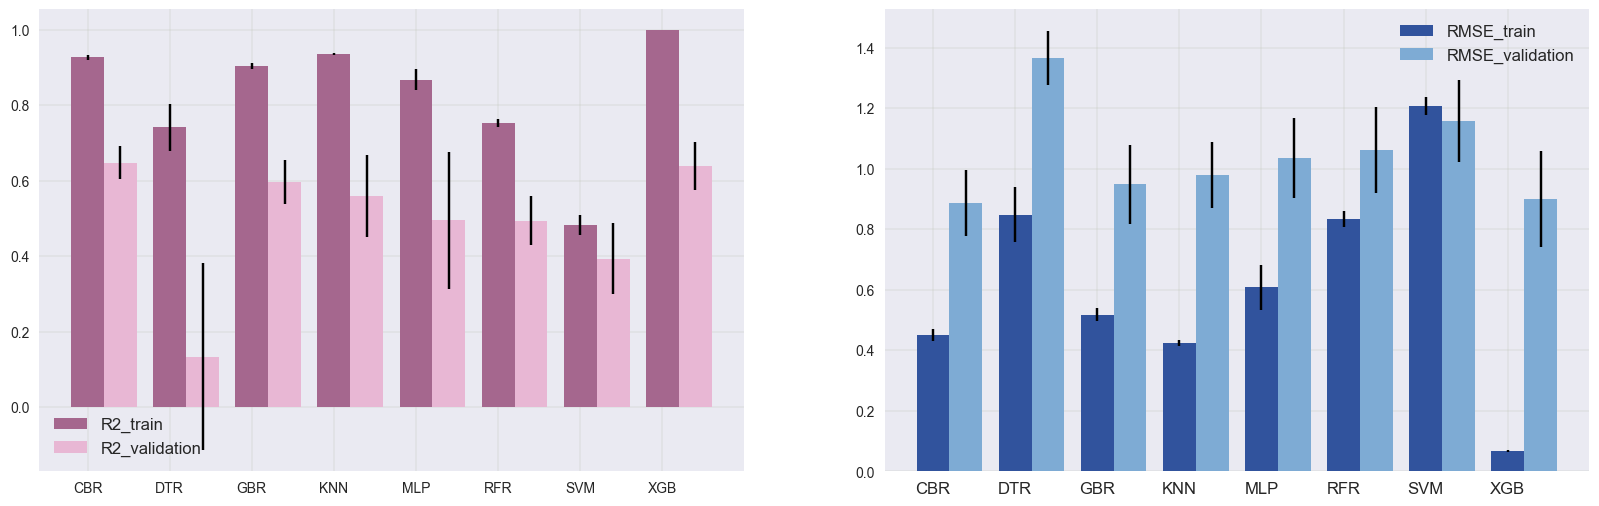

In [45]:
import matplotlib.patches as mpatches
#Let's build a graph that will help compare the methods by the main metrics

barWidth = 0.4

br1 = np.arange(8)
br2 = [x + barWidth for x in br1]
br3 =  np.arange(8)
br4 = [x + barWidth for x in br3]

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(20, 6))

ax1.bar(br1, df_error_train_1['R2_train_mean'], color =colors[0], width = barWidth, label ='R2_train', yerr = df_error_train_1['R2_train_std'])
ax1.bar(br2, df_error_train_1['R2_test_mean'], color =colors[1], width = barWidth, label ='R2_validation', yerr = df_error_train_1['R2_test_std'])

ax2.bar(br3, df_error_train_1['RMSE_train_mean'], color =colors[4], width = barWidth, label ='RMSE_train', yerr = df_error_train_1['RMSE_train_std'])
ax2.bar(br4, df_error_train_1['RMSE_test_mean'], color =colors[3], width = barWidth, label ='RMSE_validation', yerr = df_error_train_1['RMSE_test_std'])

plt.xticks(br1, ['CBR','DTR','GBR','KNN','MLP','RFR','SVM', 'XGB'], fontsize = 12)
        
ax1.grid(color='#C3C6BA', linewidth=0.3)
ax2.grid(color='#C3C6BA', linewidth=0.3)


ax1.legend(fontsize = 12)
ax2.legend(fontsize = 12)


### 6.2. Graphs for different types of DES
Also, to understand how well the models predict values for different types of DES, we will build graphs that will help you see this

In [46]:
# Let's put all the tables into one
df_error_types = df_error_CBR.append((df_error_DTR, df_error_GBR, df_error_KNN, df_error_MLP, df_error_RFR, df_error_SVM, df_error_XGB))
df_error_types['Type'] = df_error_types['Type'].fillna(0)
df_error_types

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Algorithm MO  Num_comp Type  R2_train   R2_test  RMSE_train  \
0   Cat Boosting Regression0         2    I  0.904297       NaN    0.011812   
1   Cat Boosting Regression0         2  III  0.845511  0.623736    0.464858   
2   Cat Boosting Regression0         2   IV  0.991827  0.875589    0.084683   
3   Cat Boosting Regression0         2    V  0.916734  0.705816    0.510853   
4   Cat Boosting Regression0         3    0  0.948561  0.421327    0.420295   
..                       ...       ...  ...       ...       ...         ...   
20    XGBoosting Regression4         2    I  0.999988      None    0.000132   
21    XGBoosting Regression4         2  III  0.995355   0.44112    0.082191   
22    XGBoosting Regression4         2   IV  0.999976  0.964027    0.004091   
23    XGBoosting Regression4         2    V  0.999102  0.609154    0.054121   
24    XGBoosting Regression4         3    0  0.998504  0.330311    0.070926   

   RMSE_test  
0        NaN  
1   0.791552  
2   0.228459  
3   0.923256  
4   1.324072  
..       ...  
20      None  
21  0.941761  
22  0.127267  
23  0.875947  
24  1.521772  

[200 rows x 7 columns]

In [47]:
#Table with averages and deviations for metrics
f_get_name = lambda x: x[:-1]

df_error_types['Algorithm MO'] = df_error_types['Algorithm MO'].apply(f_get_name)
df_error_types = df_error_types.groupby(['Algorithm MO','Num_comp', 'Type']).agg(['mean', 'std'])
df_error_types.columns = ['_'.join(col).rstrip('_') for col in df_error_types.columns.values] #Names for new columns
df_error_types = df_error_types.reset_index()
df_error_types

Algorithm MO  Num_comp Type  R2_train_mean  R2_train_std  \
0        Cat Boosting Regression         2    I       0.809221      0.161624   
1        Cat Boosting Regression         2  III       0.864454      0.014426   
2        Cat Boosting Regression         2   IV       0.989288      0.002603   
3        Cat Boosting Regression         2    V       0.923446      0.008088   
4        Cat Boosting Regression         3    0       0.948256      0.007030   
5        Decision Tree Regressor         2    I      -0.015256      0.013917   
6        Decision Tree Regressor         2  III       0.679030      0.099270   
7        Decision Tree Regressor         2   IV       0.777842      0.047187   
8        Decision Tree Regressor         2    V       0.639567      0.069667   
9        Decision Tree Regressor         3    0       0.832667      0.049140   
10  Gradient Boosting Regression         2    I       0.498239      0.370980   
11  Gradient Boosting Regression         2  III       0.845673      0.014558   
12  Gradient Boosting Regression         2   IV       0.978627      0.007382   
13  Gradient Boosting Regression         2    V       0.892884      0.005710   
14  Gradient Boosting Regression         3    0       0.925431      0.010181   
15           K-nearest neighbors         2    I     -62.522402     45.097212   
16           K-nearest neighbors         2  III       0.911589      0.013439   
17           K-nearest neighbors         2   IV       0.920394      0.016529   
18           K-nearest neighbors         2    V       0.917910      0.007543   
19           K-nearest neighbors         3    0       0.953446      0.004241   
20   Multilayer perceptron (MLP)         2    I   -2162.405826   4509.022022   
21   Multilayer perceptron (MLP)         2  III       0.768440      0.037693   
22   Multilayer perceptron (MLP)         2   IV       0.930059      0.033304   
23   Multilayer perceptron (MLP)         2    V       0.857240      0.044328   
24   Multilayer perceptron (MLP)         3    0       0.904398      0.024387   
25      Random Forest Regression         2    I     -61.203694     62.668556   
26      Random Forest Regression         2  III       0.713881      0.021133   
27      Random Forest Regression         2   IV       0.695111      0.031690   
28      Random Forest Regression         2    V       0.641508      0.018461   
29      Random Forest Regression         3    0       0.847735      0.013739   
30        Support Vector Machine         2    I    -217.434051     27.937184   
31        Support Vector Machine         2  III       0.571757      0.067344   
32        Support Vector Machine         2   IV       0.835588      0.012012   
33        Support Vector Machine         2    V       0.159345      0.037460   
34        Support Vector Machine         3    0       0.676566      0.031516   
35         XGBoosting Regression         2    I       0.999848      0.000167   
36         XGBoosting Regression         2  III       0.996307      0.000754   
37         XGBoosting Regression         2   IV       0.999957      0.000029   
38         XGBoosting Regression         2    V       0.998988      0.000236   
39         XGBoosting Regression         3    0       0.998379      0.000361   

    R2_test_mean  R2_test_std  RMSE_train_mean  RMSE_train_std  \
0     -82.924314          NaN         0.014311        0.003935   
1       0.612311     0.102953         0.446204        0.019579   
2       0.612697     0.291493         0.089696        0.005527   
3       0.662711     0.094651         0.492285        0.023875   
4       0.385386     0.129346         0.424622        0.025338   
5      -0.200210          NaN         0.036025        0.003867   
6       0.072230     0.279063         0.681190        0.093759   
7      -1.239625     2.140389         0.414512        0.076252   
8       0.035582     0.404737         1.067426        0.128212   
9      -0.054126     0.403627         0.758328        0.094952   
10    -11.170

invalid value encountered in reduce
invalid value encountered in reduce


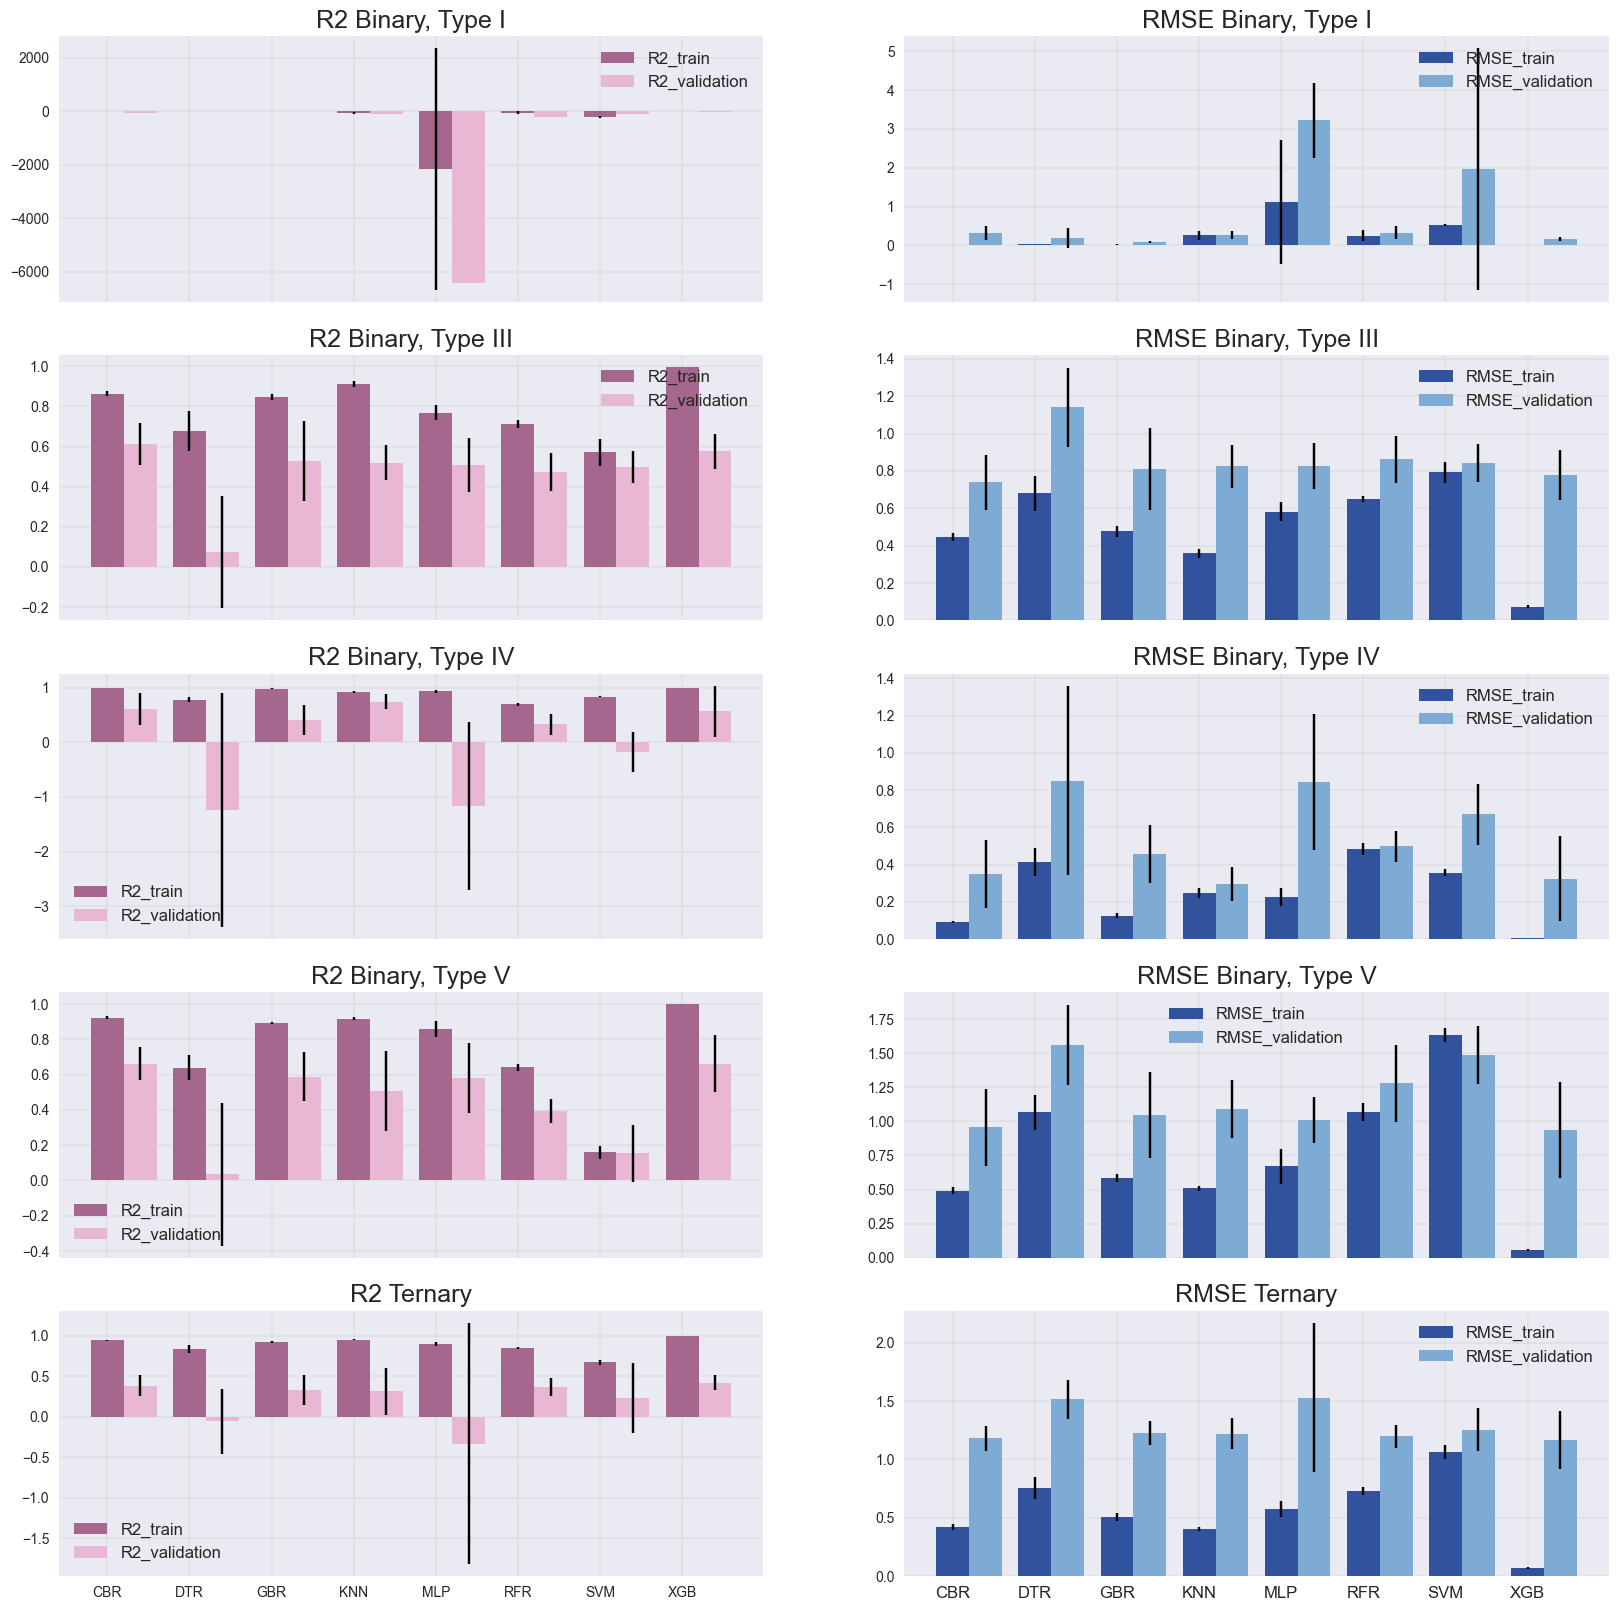

In [48]:
#Let's build a graph that will help compare the methods by the main metrics

barWidth = 0.4

br1 = np.arange(8)
br2 = [x + barWidth for x in br1]
br3 =  np.arange(8)
br4 = [x + barWidth for x in br3]

fig, ax = plt.subplots(nrows=5, ncols=2, sharex=True, figsize=(20, 20))

count = 0
conditions = [df_error_types['Type'] == 'I', df_error_types['Type'] == 'III', df_error_types['Type'] == 'IV', df_error_types['Type'] == 'V', df_error_types['Num_comp'] == 3]
Names = ['Binary, Type I', 'Binary, Type III', 'Binary, Type IV', 'Binary, Type V', 'Ternary']
for i in range(5):
  ax[i][0].bar(br1, df_error_types[conditions[count]]['R2_train_mean'], color =colors[0], width = barWidth, label ='R2_train', yerr = df_error_types[conditions[count]]['R2_train_std'])
  ax[i][0].bar(br2, df_error_types[conditions[count]]['R2_test_mean'], color =colors[1], width = barWidth, label ='R2_validation', yerr = df_error_types[conditions[count]]['R2_test_std'])
  ax[i][0].set_title('R2' + ' ' + Names[count], fontsize = 18)
  plt.xticks(br1, ['CBR','DTR','GBR','KNN','MLP','RFR','SVM', 'XGB'], fontsize = 12)

  ax[i][1].bar(br3, df_error_types[conditions[count]]['RMSE_train_mean'], color =colors[4], width = barWidth, label ='RMSE_train', yerr = df_error_types[conditions[count]]['RMSE_train_std'])
  ax[i][1].bar(br4, df_error_types[conditions[count]]['RMSE_test_mean'], color =colors[3], width = barWidth, label ='RMSE_validation', yerr = df_error_types[conditions[count]]['RMSE_test_std'])
  ax[i][1].set_title(('RMSE' + ' ' + Names[count]), fontsize = 18)
  plt.xticks(br3, ['CBR','DTR','GBR','KNN','MLP','RFR','SVM', 'XGB'], fontsize = 12)
  
          
  ax[i][0].grid(color='#C3C6BA', linewidth=0.3)
  ax[i][1].grid(color='#C3C6BA', linewidth=0.3)


  ax[i][0].legend(fontsize = 12)
  ax[i][1].legend(fontsize = 12)
  count += 1

## General conclusions:
The highest results were shown by Car Boosting XGBoosting, on the validation sample these models have R2 = , and RMSE equal to . The XGBoosting model also shows good results for predicting the density of all types of DES
